# ***Cardiac Arrhythmia***

![h1](heart_cycle.gif)
![h2](heart_pump.gif)

### ***Import Required Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

%matplotlib inline

### ***Setting columns and rows***

In [2]:
pd.set_option('display.max_columns',280)

In [3]:
pd.set_option('display.max_rows',280)

### ***Import the dataset***

In [4]:
cad_arrhythmia = pd.read_csv('arrhythmia.data',header=None)

In [5]:
cad_arrhythmia.head()

0    1    2    3    4    5    6    7    8    9   10   11  12  13  14   15   \
0   75    0  190   80   91  193  371  174  121  -16  13   64  -2   ?  63    0   
1   56    1  165   64   81  174  401  149   39   25  37  -17  31   ?  53    0   
2   54    0  172   95  138  163  386  185  102   96  34   70  66  23  75    0   
3   55    0  175   94  100  202  380  179  143   28  11   -5  20   ?  71    0   
4   75    0  190   80   88  181  360  177  103  -16  13   61   3   ?   ?    0   

   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   \
0   52   44    0    0   32    0    0    0    0    0    0    0   44   20   36   
1   48    0    0    0   24    0    0    0    0    0    0    0   64    0    0   
2   40   80    0    0   24    0    0    0    0    0    0   20   56   52    0   
3   72   20    0    0   48    0    0    0    0    0    0    0   64   36    0   
4   48   40    0    0   28    0    0    0    0    0    0    0   40   24    0   

   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   \
0    0   28    0    0    0    0    0    0   52   40    0    0    0   60    0   
1    0   24    0    0    0    0    0    0   32   24    0    0    0   40    0   
2    0   40    0    0    0    0    0    0   28  116    0    0    0   52    0   
3    0   36    0    0    0    0    0    0   20   52   48    0    0   56    0   
4    0   24    0    0    0    0    0    0   52   36    0    0    0   60    0   

   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   \
0    0    0    0    0    0   52    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0   48    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0   52   64    0    0    0   88    0    0    0    0   
3    0    0    0    0    0   64   32    0    0    0   72    0    0    0    0   
4    0    0    0    0    0   48   28    0    0    0   56    0    0    0    0   

   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   \
0    0    0    0   56   36    0    0   32    0    0    0    0    0    0   48   
1    0    0    0   44   20    0    0   24    0    0    0    0    0    0    0   
2    0    0    0   36   92    0    0   24    0    0    0    0    0    0    0   
3    0    0    0   60   12    0    0   44    0    0    0    0    0    0    0   
4    0    0    0   48   36    0    0   28    0    0    0    0    0    0   44   

   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   \
0   32    0    0    0   56    0    0    0    0    0    0   80    0    0    0   
1   60    0    0    0   20    0    0    0    0    0    0    0   24   52    0   
2  128    0    0    0   24    0    1    0    0    0    0    0   24   36   76   
3   60   44    0    0   32    0    0    0    0    0    0   56    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0   88    0    0    0   

   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  \
0    0    0    0    0    0    0    0    0    0   40   52    0    0   28    0   
1    0   16    0    0    0    0    0    0    0   32   52    0    0   20    0   
2    0  100    0    0    0    0    0    0    0   40   28   60    0   96    0   
3    0    0    0    0    0    0    0    0    0   40   44    0    0   20    0   
4    0    0    0    0    0    0    0    0    0   40   52    0    0   28    0   

   106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  \
0    0    0    0    0    0    0   48   48    0    0   32    0    0    0    0   
1    0    0    0    0    0    0   44   48    0    0   32    0    0    0    0   
2    0    0    0    0    0    0   48   20   56   24   32    0    0    0    0   
3    0    0    0    0    0    0   52   40    0    0   32    0    0    0    0   
4    0    0    0    0    0    0   48   48    0    0   32    0    0    0    0   

   121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  \
0    0    0    0   52   52    0    0   36    0    0    0    0    0   

### ***Defining feature names***

In [6]:
cad_arrhythmia.columns = ['Age','Gender','Height','Weight','QRS_duration','P_R_interval','Q_T_interval','T_interval','P_interval','QRS_Vector_angle','T_Vector_angle','P_Vector_angle',
                         'QRST_Vector_angle','J_Vector_angle','Heart_rate',
                          'DI_Q_wave_width','DI_R_wave_width','DI_S_wave_width','DI_R1_wave_width','DI_S1_wave_width','DI_Intrinsic_deflections','DI_Ragged_R_wave',
                          'DI_R_wave_diphasic_derivation','DI_Ragged_P_wave','DI_P_Wave_diphasic_derivation','DI_Ragged_T_wave','DI_T_wave_diphasic_derivation',
                          'DII_Q_wave_width','DII_R_wave_width','DII_S_wave_width','DII_R1_wave_width','DII_S1_wave_width','DII_Intrinsic_deflections',
                          'DII_Ragged_R_wave','DII_R_wave_diphasic_derivation','DII_Ragged_P_wave','DII_P_Wave_diphasic_derivation','DII_Ragged_T_wave','DII_T_wave_diphasic_derivation',
                          'DIII_Q_wave_width','DIII_R_wave_width','DIII_S_wave_width','DIII_R1_wave_width','DIII_S1_wave_width','DIII_Intrinsic_deflections',
                          'DIII_Ragged_R_wave','DIII_R_wave_diphasic_derivation','DIII_Ragged_P_wave','DIII_P_Wave_diphasic_derivation','DIII_Ragged_T_wave','DIII_T_wave_diphasic_derivation',
                          'AVR_Q_wave_width','AVR_R_wave_width','AVR_S_wave_width','AVR_R1_wave_width','AVR_S1_wave_width','AVR_Intrinsic_deflections',
                          'AVR_Ragged_R_wave','AVR_R_wave_diphasic_derivation','AVR_Ragged_P_wave','AVR_P_Wave_diphasic_derivation','AVR_Ragged_T_wave','AVR_T_wave_diphasic_derivation',
                          'AVL_Q_wave_width','AVL_R_wave_width','AVL_S_wave_width','AVL_R1_wave_width','AVL_S1_wave_width','AVL_Intrinsic_deflections',
                          'AVL_Ragged_R_wave','AVL_R_wave_diphasic_derivation','AVL_Ragged_P_wave','AVL_P_Wave_diphasic_derivation','AVL_Ragged_T_wave','AVL_T_wave_diphasic_derivation',
                          'AVF_Q_wave_width','AVF_R_wave_width','AVF_S_wave_width','AVF_R1_wave_width','AVF_S1_wave_width','AVF_Intrinsic_deflections',
                          'AVF_Ragged_R_wave','AVF_R_wave_diphasic_derivation','AVF_Ragged_P_wave','AVF_P_Wave_diphasic_derivation','AVF_Ragged_T_wave','AVF_T_wave_diphasic_derivation',
                          'V1_Q_wave_width','V1_R_wave_width','V1_S_wave_width','V1_R1_wave_width','V1_S1_wave_width','V1_Intrinsic_deflections',
                          'V1_Ragged_R_wave','V1_R_wave_diphasic_derivation','V1_Ragged_P_wave','V1_P_Wave_diphasic_derivation','V1_Ragged_T_wave','V1_T_wave_diphasic_derivation',
                          'V2_Q_wave_width','V2_R_wave_width','V2_S_wave_width','V2_R1_wave_width','V2_S1_wave_width','V2_Intrinsic_deflections',
                          'V2_Ragged_R_wave','V2_R_wave_diphasic_derivation','V2_Ragged_P_wave','V2_P_Wave_diphasic_derivation','V2_Ragged_T_wave','V2_T_wave_diphasic_derivation',
                          'V3_Q_wave_width','V3_R_wave_width','V3_S_wave_width','V3_R1_wave_width','V3_S1_wave_width','V3_Intrinsic_deflections',
                          'V3_Ragged_R_wave','V3_R_wave_diphasic_derivation','V3_Ragged_P_wave','V3_P_Wave_diphasic_derivation','V3_Ragged_T_wave','V3_T_wave_diphasic_derivation',
                          'V4_Q_wave_width','V4_R_wave_width','V4_S_wave_width','V4_R1_wave_width','V4_S1_wave_width','V4_Intrinsic_deflections',
                          'V4_Ragged_R_wave','V4_R_wave_diphasic_derivation','V4_Ragged_P_wave','V4_P_Wave_diphasic_derivation','V4_Ragged_T_wave','V4_T_wave_diphasic_derivation',
                          'V5_Q_wave_width','V5_R_wave_width','V5_S_wave_width','V5_R1_wave_width','V5_S1_wave_width','V5_Intrinsic_deflections',
                          'V5_Ragged_R_wave','V5_R_wave_diphasic_derivation','V5_Ragged_P_wave','V5_P_Wave_diphasic_derivation','V5_Ragged_T_wave','V5_T_wave_diphasic_derivation',
                          'V6_Q_wave_width','V6_R_wave_width','V6_S_wave_width','V6_R1_wave_width','V6_S1_wave_width','V6_Intrinsic_deflections',
                          'V6_Ragged_R_wave','V6_R_wave_diphasic_derivation','V6_Ragged_P_wave','V6_P_Wave_diphasic_derivation','V6_Ragged_T_wave','V6_T_wave_diphasic_derivation',
                         'DI_Amplitude_JJ_Wave','DI_Amplitude_Q_wave','DI_Amplitude_R_wave','DI_Amplitude_S_wave','DI_Amplitude_R1_wave','DI_Amplitude_S1_wave','DI_Amplitude_P_wave',
                          'DI_Amplitude_T_wave','DI_QRSA','DI_QRSTA',
                         'DII_Amplitude_JJ_Wave','DII_Amplitude_Q_wave','DII_Amplitude_R_wave','DII_Amplitude_S_wave','DII_Amplitude_R1_wave','DII_Amplitude_S1_wave',
                          'DII_Amplitude_P_wave','DII_Amplitude_T_wave','DII_QRSA','DII_QRSTA',
                         'DIII_Amplitude_JJ_Wave','DIII_Amplitude_Q_wave','DIII_Amplitude_R_wave','DIII_Amplitude_S_wave','DIII_Amplitude_R1_wave','DIII_Amplitude_S1_wave',
                          'DIII_Amplitude_P_wave','DIII_Amplitude_T_wave','DIII_QRSA','DIII_QRSTA',
                         'AVR_Amplitude_JJ_Wave','AVR_Amplitude_Q_wave','AVR_Amplitude_R_wave','AVR_Amplitude_S_wave','AVR_Amplitude_R1_wave','AVR_Amplitude_S1_wave',
                          'AVR_Amplitude_P_wave','AVR_Amplitude_T_wave','AVR_QRSA','AVR_QRSTA',
                         'AVL_Amplitude_JJ_Wave','AVL_Amplitude_Q_wave','AVL_Amplitude_R_wave','AVL_Amplitude_S_wave','AVL_Amplitude_R1_wave','AVL_Amplitude_S1_wave',
                          'AVL_Amplitude_P_wave','AVL_Amplitude_T_wave','AVL_QRSA','AVL_QRSTA',
                         'AVF_Amplitude_JJ_Wave','AVF_Amplitude_Q_wave','AVF_Amplitude_R_wave','AVF_Amplitude_S_wave','AVF_Amplitude_R1_wave','AVF_Amplitude_S1_wave',
                          'AVF_Amplitude_P_wave','AVF_Amplitude_T_wave','AVF_QRSA','AVF_QRSTA',
                         'V1_Amplitude_JJ_Wave','V1_Amplitude_Q_wave','V1_Amplitude_R_wave','V1_Amplitude_S_wave','V1_Amplitude_R1_wave','V1_Amplitude_S1_wave',
                          'V1_Amplitude_P_wave','V1_Amplitude_T_wave','V1_QRSA','V1_QRSTA',
                         'V2_Amplitude_JJ_Wave','V2_Amplitude_Q_wave','V2_Amplitude_R_wave','V2_Amplitude_S_wave','V2_Amplitude_R1_wave','V2_Amplitude_S1_wave',
                          'V2_Amplitude_P_wave','V2_Amplitude_T_wave','V2_QRSA','V2_QRSTA',
                         'V3_Amplitude_JJ_Wave','V3_Amplitude_Q_wave','V3_Amplitude_R_wave','V3_Amplitude_S_wave','V3_Amplitude_R1_wave','V3_Amplitude_S1_wave',
                          'V3_Amplitude_P_wave','V3_Amplitude_T_wave','V3_QRSA','V3_QRSTA',
                         'V4_Amplitude_JJ_Wave','V4_Amplitude_Q_wave','V4_Amplitude_R_wave','V4_Amplitude_S_wave','V4_Amplitude_R1_wave','V4_Amplitude_S1_wave',
                          'V4_Amplitude_P_wave','V4_Amplitude_T_wave','V4_QRSA','V4_QRSTA',
                         'V5_Amplitude_JJ_Wave','V5_Amplitude_Q_wave','V5_Amplitude_R_wave','V5_Amplitude_S_wave','V5_Amplitude_R1_wave','V5_Amplitude_S1_wave',
                          'V5_Amplitude_P_wave','V5_Amplitude_T_wave','V5_QRSA','V5_QRSTA',
                         'V6_Amplitude_JJ_Wave','V6_Amplitude_Q_wave','V6_Amplitude_R_wave','V6_Amplitude_S_wave','V6_Amplitude_R1_wave','V6_Amplitude_S1_wave',
                          'V6_Amplitude_P_wave','V6_Amplitude_T_wave','V6_QRSA','V6_QRSTA','Arrhythmia_Class']

In [7]:
cad_arrhythmia.head()

Age  Gender  Height  Weight  QRS_duration  P_R_interval  Q_T_interval  \
0   75       0     190      80            91           193           371   
1   56       1     165      64            81           174           401   
2   54       0     172      95           138           163           386   
3   55       0     175      94           100           202           380   
4   75       0     190      80            88           181           360   

   T_interval  P_interval  QRS_Vector_angle T_Vector_angle P_Vector_angle  \
0         174         121               -16             13             64   
1         149          39                25             37            -17   
2         185         102                96             34             70   
3         179         143                28             11             -5   
4         177         103               -16             13             61   

  QRST_Vector_angle J_Vector_angle Heart_rate  DI_Q_wave_width  \
0                -2              ?         63                0   
1                31              ?         53                0   
2                66             23         75                0   
3                20              ?         71                0   
4                 3              ?          ?                0   

   DI_R_wave_width  DI_S_wave_width  DI_R1_wave_width  DI_S1_wave_width  \
0               52               44                 0                 0   
1               48                0                 0                 0   
2               40               80                 0                 0   
3               72               20                 0                 0   
4               48               40                 0                 0   

   DI_Intrinsic_deflections  DI_Ragged_R_wave  DI_R_wave_diphasic_derivation  \
0                        32                 0                              0   
1                        24                 0                              0   
2                        24                 0                              0   
3                        48                 0                              0   
4                        28                 0                              0   

   DI_Ragged_P_wave  DI_P_Wave_diphasic_derivation  DI_Ragged_T_wave  \
0                 0                              0                 0   
1                 0                              0                 0   
2                 0                              0                 0   
3                 0                              0                 0   
4                 0                              0                 0   

   DI_T_wave_diphasic_derivation  DII_Q_wave_width  DII_R_wave_width  \
0                              0                 0                44   
1                              0                 0                64   
2                              0                20                56   
3                              0                 0                64   
4                              0                 0                40   

   DII_S_wave_width  DII_R1_wave_width  DII_S1_wave_width  \
0                20                 36                  0   
1                 0                  0                  0   
2                52                  0                  0   
3                36                  0                  0   
4                24                  0                  0   

   DII_Intrinsic_deflections  DII_Ragged_R_wave  \
0                         28                  0   
1                         24                  0   
2                         40                  0   
3                         36                  0   
4                         24                  0   

   DII_R_wave_diphasic_derivation  DII_Ragged_P_wave  \
0                               0                  0   
1                               0                  0   
2                               0             

## ***Data Pre-processing***

### **Feature datatypes**

In [8]:
cad_arrhythmia.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 280 columns):
Age                                int64
Gender                             int64
Height                             int64
Weight                             int64
QRS_duration                       int64
P_R_interval                       int64
Q_T_interval                       int64
T_interval                         int64
P_interval                         int64
QRS_Vector_angle                   int64
T_Vector_angle                     object
P_Vector_angle                     object
QRST_Vector_angle                  object
J_Vector_angle                     object
Heart_rate                         object
DI_Q_wave_width                    int64
DI_R_wave_width                    int64
DI_S_wave_width                    int64
DI_R1_wave_width                   int64
DI_S1_wave_width                   int64
DI_Intrinsic_deflections           int64
DI_Ragged_R_wave            

### **Finding the Missing values in Object type features**

In [9]:
cad_arrhythmia[['T_Vector_angle',
'P_Vector_angle',
'QRST_Vector_angle',
'J_Vector_angle',
'Heart_rate']].isin(['?']).sum()

T_Vector_angle         8
P_Vector_angle        22
QRST_Vector_angle      1
J_Vector_angle       376
Heart_rate             1
dtype: int64

##### ***Replacing the missing values of these columns via None.***

### **Replacing Missing values in Object type columns**

In [10]:
def replace_missing_vals(df_name):
    """
    Description: This function is created for replacing the missing value by np.NaN
    
    Input parameter: It accepts only one input parameter:
        1. df_name: Dataframe in which missing values to be removed
    
    Return: Modified dataframe with no missing values '?'
    """
    cols = df_name.columns
    for col in cols:
        if df_name[col].dtype == 'O':
            df_name[col] = df_name[col].apply(lambda val: np.NaN if val == '?' else val)
        else:
            None
    return df_name  

In [11]:
cad_df = replace_missing_vals(cad_arrhythmia)

In [12]:
cad_df.head()

Age  Gender  Height  Weight  QRS_duration  P_R_interval  Q_T_interval  \
0   75       0     190      80            91           193           371   
1   56       1     165      64            81           174           401   
2   54       0     172      95           138           163           386   
3   55       0     175      94           100           202           380   
4   75       0     190      80            88           181           360   

   T_interval  P_interval  QRS_Vector_angle T_Vector_angle P_Vector_angle  \
0         174         121               -16             13             64   
1         149          39                25             37            -17   
2         185         102                96             34             70   
3         179         143                28             11             -5   
4         177         103               -16             13             61   

  QRST_Vector_angle J_Vector_angle Heart_rate  DI_Q_wave_width  \
0                -2            NaN         63                0   
1                31            NaN         53                0   
2                66             23         75                0   
3                20            NaN         71                0   
4                 3            NaN        NaN                0   

   DI_R_wave_width  DI_S_wave_width  DI_R1_wave_width  DI_S1_wave_width  \
0               52               44                 0                 0   
1               48                0                 0                 0   
2               40               80                 0                 0   
3               72               20                 0                 0   
4               48               40                 0                 0   

   DI_Intrinsic_deflections  DI_Ragged_R_wave  DI_R_wave_diphasic_derivation  \
0                        32                 0                              0   
1                        24                 0                              0   
2                        24                 0                              0   
3                        48                 0                              0   
4                        28                 0                              0   

   DI_Ragged_P_wave  DI_P_Wave_diphasic_derivation  DI_Ragged_T_wave  \
0                 0                              0                 0   
1                 0                              0                 0   
2                 0                              0                 0   
3                 0                              0                 0   
4                 0                              0                 0   

   DI_T_wave_diphasic_derivation  DII_Q_wave_width  DII_R_wave_width  \
0                              0                 0                44   
1                              0                 0                64   
2                              0                20                56   
3                              0                 0                64   
4                              0                 0                40   

   DII_S_wave_width  DII_R1_wave_width  DII_S1_wave_width  \
0                20                 36                  0   
1                 0                  0                  0   
2                52                  0                  0   
3                36                  0                  0   
4                24                  0                  0   

   DII_Intrinsic_deflections  DII_Ragged_R_wave  \
0                         28                  0   
1                         24                  0   
2                         40                  0   
3                         36                  0   
4                         24                  0   

   DII_R_wave_diphasic_derivation  DII_Ragged_P_wave  \
0                               0                  0   
1                               0                  0   
2                               0             

### **NaN values in the DataFrame**

In [13]:
nan_vals = pd.DataFrame(cad_df.isin([np.NaN]).sum())
nan_vals[nan_vals[0] >= 1]

0
T_Vector_angle       8
P_Vector_angle      22
QRST_Vector_angle    1
J_Vector_angle     376
Heart_rate           1

#### **Shape of Dataset**

In [14]:
cad_df.shape

(452, 280)

### **CAD Classes**

In [15]:
cad_classes = pd.DataFrame(cad_df['Arrhythmia_Class'].value_counts())

In [16]:
cad_classes.reset_index(inplace=True)

In [17]:
cad_classes.columns = ['Class_count','Arrthymia_class']

In [18]:
cad_classes.sort_values('Class_count',ascending=True,inplace=True)

In [19]:
cad_classes.reset_index(drop=True,inplace=True)

In [20]:
cad_classes

Class_count  Arrthymia_class
0             1              245
1             2               44
2             3               15
3             4               15
4             5               13
5             6               25
6             7                3
7             8                2
8             9                9
9            10               50
10           14                4
11           15                5
12           16               22

## ***Feature Standardizing and Transformation***

### Aiming to build a function that can perform below tasks:
    1. Plot the Feature Distribution
    2. Descriptive statistics of a Feature
    3. Apply the different SCALERS on feature
    4. PLOT the Distribution of each Scaler on Feature
    5. Descriptive statistics of a Scaled Feature

In [21]:
def box_plot(df,col):
    """
    Description: This function is created for plotting the Box or Whisker plot for visualizing the outliers in any variable.
    
    Input Parameters: It accepts two input parameters:
        1. df: DataFrame
        2. col: Feature name
    
    Return/Output: Plots the feature whisker plot
    """
    font = {'color': 'Blue',
            'family': 'Arial',
            'size': 16}
    
    plt.figure(figsize=(9,7))
    plt.boxplot(df[col])
    plt.minorticks_on()
    plt.grid(which='major',linestyle="--",color='gray')
    plt.xlabel('Feature : '+col,fontdict=font)
    plt.title('Visualizing the outliers in '+col+' variable',fontdict=font)
    plt.show()
    print('\n')
    
def val_iqr_limits(df_name,col_name,w_width=None):
    """
    Description: This function is created for calculating the upper and lower limits using Tuky's IQR method.
    
    Input parameters: It accepts below two input parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. w_width: Whisker width
        
    Return: It returns the median, upper and lower limits of the feature based on Tuky's IQR method.
    """
    if w_width == None:
        w_width = 1.5
    else:
        w_width = w_width
        
    val_median = df_name[col_name].median()
    q1 = df_name[col_name].quantile(0.25)
    q3 = df_name[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (w_width*iqr)
    upper_limit = q3 + (w_width*iqr)
    print(val_median,q1,q3,iqr,lower_limit,upper_limit)
    return val_median, upper_limit, lower_limit

def fix_outliers(df_name,col_name,whis_width=None):
    """
    Description: This function is created for applyng the Tuky's IQR method on variable.
    
    Input parameters: It accepts the below two parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
    
    Return: It returns the modified feature with the removed outliers.
    """
    feature_scale_desc_stats(df_name,col_name,[None])
    box_plot(df_name,col_name)
    
    print("######## Applied Tuky IQR Method-I ########\n")
    v_median, upr_limit , low_limit = val_iqr_limits(df_name,col_name,whis_width)
    new_col = 'Fixed_Outliers_'+col_name
    df_name[new_col] = df_name[col_name].apply(lambda val: (v_median + np.sqrt(val)) if val > upr_limit else (v_median - np.sqrt(np.sqrt(np.square(val)))) if val < low_limit else val)
    feature_scale_desc_stats(df_name,new_col,[None])
    box_plot(df_name,new_col)
    
    print("######## Applied Tuky IQR Method-II ########\n")
    v1_median, upr_limit1, low_limit1 = val_iqr_limits(df_name,new_col,whis_width)
    df_name[new_col] = df_name[new_col].apply(lambda val: upr_limit1 if val > upr_limit1 else low_limit1 if val < low_limit1 else val)
    feature_scale_desc_stats(df_name,new_col,[None])
    box_plot(df_name,new_col)
    
    print("$$$$$$$$ Removed Outliers from",col_name,"and created its new variable",new_col, '$$$$$$$$\n')    

In [22]:
def feature_scale_desc_stats(df, col, scaler=None, scale_col=False, scaler_to_use=False):
    """
    Description: This function will perform below tasks:
        1. Plot the Feature Distribution
        2. Descriptive statistics of a Feature
        3. Apply the different SCALERS on feature
        4. PLOT the Distribution of each Scaler on Feature
        5. Descriptive statistics of a Scaled Feature
    
    Input Parameters: It accepts two input parameters:
        1. df: DataFrame of imported dataset
        2. col: Feature name which needs to be examined
        3. scaler: Different scalers whose change we want to visualize
        4. scale_col: Flag by which we identifies whether scaler to be applied
        5. scaler_to_use: Scaler to be used for scaling the variable
    
    Return/Output: It plots the feature distribution and provides it descriptive stats
    """
    def select_transformer(trans_flag):
        """
        Description: This function is created for identifying the kind of transformation to be applied.
        
        Input parameters: It accepts only one parameter:
        1. trans_flag: Flag for identifying the transformer    
        
        Return/Output: Transformer object
        """
        if str(trans_flag).lower() == 'ss':
            from sklearn.preprocessing import StandardScaler as SS
            ss = SS()
            return ss
        elif str(trans_flag).lower() == 'rs':
            from sklearn.preprocessing import RobustScaler as RS
            rs = RS()
            return rs
        elif str(trans_flag).lower() == 'mms':
            from sklearn.preprocessing import MinMaxScaler as MMS
            mms = MMS()
            return mms
        elif trans_flag == None:
            return None
        
    def hist_plt(df_name,col_name,dist_form):
        """
        Description: This function is created for plotting the feature distribution
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. dist_form: Kind of the operation applied on the feature
    
        Return/Output: It plots the feature distribution
        """
        font = {'color': 'blue',
            'family':'arial',
            'size':16}
    
        plt.figure(figsize=(9,7))
        plt.hist(df_name[col_name],color='orange')
        plt.minorticks_on()
        plt.grid(which='major',linestyle='--',color='gray')
        plt.xlabel('Feature name is '+ col_name, fontdict=font)
        plt.title(dist_form +' Form -- Distribution plot of '+ col_name, fontdict=font)
        plt.show()
        
    def plot_org_and_scaled_dist(df_name,col_name,scaler):
        """
        Description: This function is created for providing the descriptive statistics, applying the transformation on feature and plotting feature distribution using another function.
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. scaler: Scaler object
    
        Return/Output: It plots the feature distribution using another function and prints the descriptive stats
        """
        if scaler == None:
            dist_form = 'Original'
            print('\nDescriptive Statistics of Feature {} in {} Form.'.format(col_name,dist_form))
            print(df_name[col_name].describe(),'\n')
            hist_plt(df_name,col_name,dist_form)
        else:
            scaled_df = pd.DataFrame(scaler.fit_transform(df_name[[col_name]]))
            scaled_df.columns = [col_name]
            dist_form = str(scaler).split("(")
            print('\nDescriptive Statistics of Feature {} in {} Form.'.format(col_name,dist_form[0]))
            print(scaled_df[col_name].describe(),'\n')
            hist_plt(scaled_df,col_name,dist_form[0])
            
    def apply_scaler(df_name,col_name,scaler):
        """
        Description: This function is created for applying the scaler on variable.
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. scaler: Scaler object
    
        Return/Output: Creates new column with scaled values of the variable.
        """
        print('\nDescriptive Statistics of Feature {}.'.format(col_name))
        print(df_name[col_name].describe(),'\n')
        hist_plt(df_name,col_name,'')
        box_plot(df_name,col_name)
                
        scaled_col_name = col_name + '_Scaled'
        df_name[scaled_col_name] = scaler.fit_transform(df_name[[col_name]])
        dist_form = str(scaler).split("(")
        print('Descriptive Statistics of Feature {}.'.format(scaled_col_name))
        print(df_name[scaled_col_name].describe(),'\n')
        hist_plt(df_name,scaled_col_name,dist_form[0])
        box_plot(df_name,scaled_col_name)
        print('##### Scaled variable {} added in the DataFrame #####\n'.format(scaled_col_name))
            
    if scale_col == False:
        for val in scaler:
            plot_org_and_scaled_dist(df,col,select_transformer(val))
    elif scale_col == True:
        scaler = scaler_to_use
        apply_scaler(df,col,select_transformer(scaler))

## **Visualizing AGE Feature *(Measurement Unit :: Years)***


Descriptive Statistics of Feature Age in Original Form.
count    452.000000
mean      46.471239
std       16.466631
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: Age, dtype: float64 



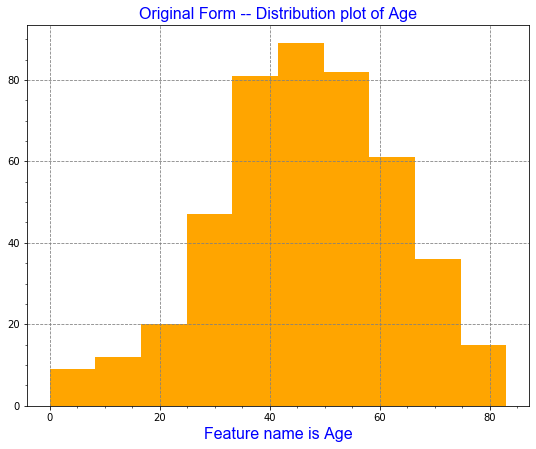


Descriptive Statistics of Feature Age in StandardScaler Form.
count    4.520000e+02
mean    -3.929993e-17
std      1.001108e+00
min     -2.825273e+00
25%     -6.366112e-01
50%      3.214664e-02
75%      7.009045e-01
max      2.220809e+00
Name: Age, dtype: float64 



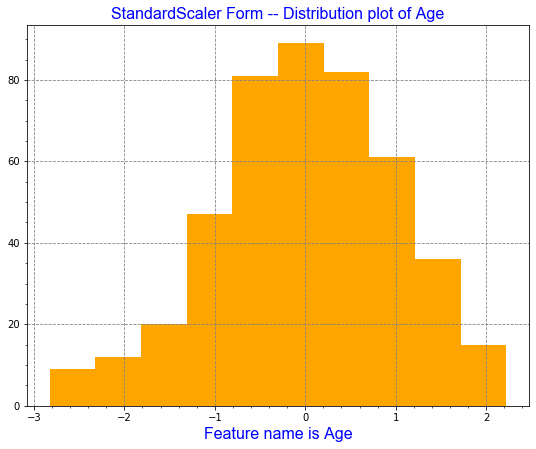


Descriptive Statistics of Feature Age in RobustScaler Form.
count    452.000000
mean      -0.024035
std        0.748483
min       -2.136364
25%       -0.500000
50%        0.000000
75%        0.500000
max        1.636364
Name: Age, dtype: float64 



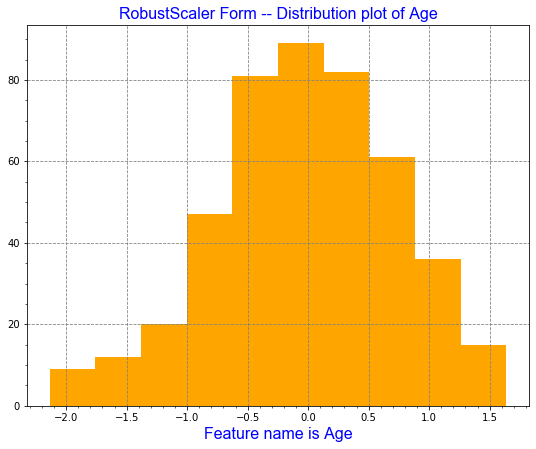


Descriptive Statistics of Feature Age in MinMaxScaler Form.
count    452.000000
mean       0.559894
std        0.198393
min        0.000000
25%        0.433735
50%        0.566265
75%        0.698795
max        1.000000
Name: Age, dtype: float64 



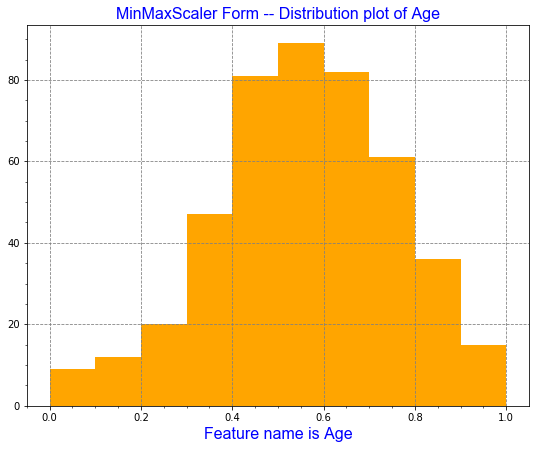

In [23]:
feature_scale_desc_stats(cad_df,'Age',[None,'ss','rs','mms'])

### ***Discrepancies found in AGE Variable***

In [24]:
pd.DataFrame(cad_df['Age'].sort_values(ascending=True)).head(5)

Age
316    0
60     1
141    1
320    3
297    7

In [25]:
cad_df[cad_df['Age'].isin(['0','1','1','3'])]

Age  Gender  Height  Weight  QRS_duration  P_R_interval  Q_T_interval  \
60     1       0     110      10            80           121           287   
141    1       1     780       6            85           165           237   
316    0       0     608      10            83           126           232   
320    3       0     105      12            69           155           240   

     T_interval  P_interval  QRS_Vector_angle T_Vector_angle P_Vector_angle  \
60          156          67               126             25             60   
141         150         106                88             30             30   
316         128          60               125             21            -50   
320         133          64                93             95             54   

    QRST_Vector_angle J_Vector_angle Heart_rate  DI_Q_wave_width  \
60                104            NaN        104                0   
141                52            NaN        138                0   
316               102            NaN        163                0   
320                92            NaN        124                0   

     DI_R_wave_width  DI_S_wave_width  DI_R1_wave_width  DI_S1_wave_width  \
60                28               56                 0                 0   
141               28               28                 0                 0   
316               20               48                 0                 0   
320               28               24                 0                 0   

     DI_Intrinsic_deflections  DI_Ragged_R_wave  \
60                         16                 0   
141                        16                 0   
316                        12                 0   
320                        16                 0   

     DI_R_wave_diphasic_derivation  DI_Ragged_P_wave  \
60                               0                 0   
141                              0                 0   
316                              0                 0   
320                              0                 0   

     DI_P_Wave_diphasic_derivation  DI_Ragged_T_wave  \
60                               0                 0   
141                              0                 0   
316                              0                 0   
320                              0                 0   

     DI_T_wave_diphasic_derivation  DII_Q_wave_width  DII_R_wave_width  \
60                               0                12                28   
141                              0                 0                32   
316                              0                 0                40   
320                              0                 0                28   

     DII_S_wave_width  DII_R1_wave_width  DII_S1_wave_width  \
60                 28                 20                  0   
141                12                 20                 12   
316                28                  0                  0   
320                24                  0                  0   

     DII_Intrinsic_deflections  DII_Ragged_R_wave  \
60                          24                  0   
141                         20                  0   
316                         20                  0   
320                         16                  0   

     DII_R_wave_diphasic_derivation  DII_Ragged_P_wave  \
60                                0                  0   
141                               0                  0   
316                               0                  0   
320                               0                  0   

     DII_P_Wave_diphasic_derivation  DII_Ragged_T_wave  \
60                                0                  0   
141                               0                  0   
316                               0                  0   
320                               0                  0   

     DII_T_wave_diphasic_derivation  DIII_Q_wave_width  DIII_R_wave_width  \
60                                0                 24       

#### ***Questions related to AGE***
#### _1. How can a 0 year old baby as tall as 608 cm?_
#### _2. How can a 1 year old baby as tall as 110 or 780 cm?_
#### _3. How can a height of 1 year old baby is greater than 3 year old baby?_

## **Visualizing HEIGHT Feature *(Measurement Unit :: Centimeters)***

In [26]:
pd.DataFrame(cad_df['Height'].sort_values(ascending=False)).head()

Height
141     780
316     608
0       190
448     190
4       190


Descriptive Statistics of Feature Height in Original Form.
count    452.000000
mean     166.188053
std       37.170340
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: Height, dtype: float64 



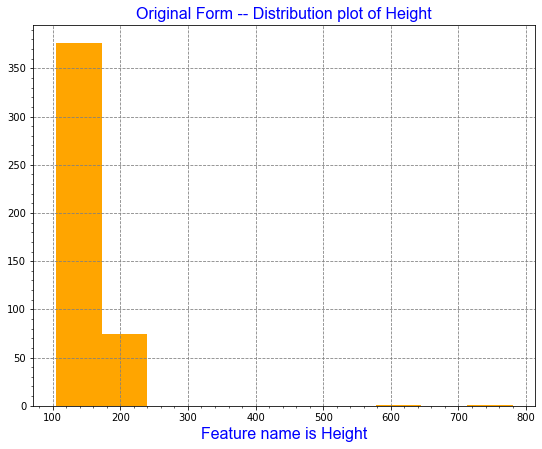


Descriptive Statistics of Feature Height in StandardScaler Form.
count    4.520000e+02
mean     3.812093e-16
std      1.001108e+00
min     -1.647977e+00
25%     -1.666627e-01
50%     -5.893079e-02
75%      1.026671e-01
max      1.653179e+01
Name: Height, dtype: float64 



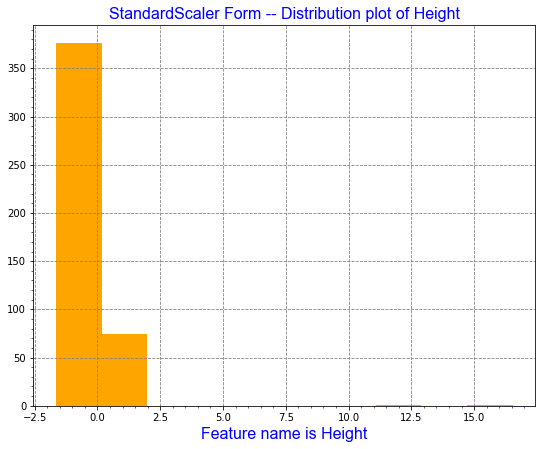


Descriptive Statistics of Feature Height in RobustScaler Form.
count    452.000000
mean       0.218805
std        3.717034
min       -5.900000
25%       -0.400000
50%        0.000000
75%        0.600000
max       61.600000
Name: Height, dtype: float64 



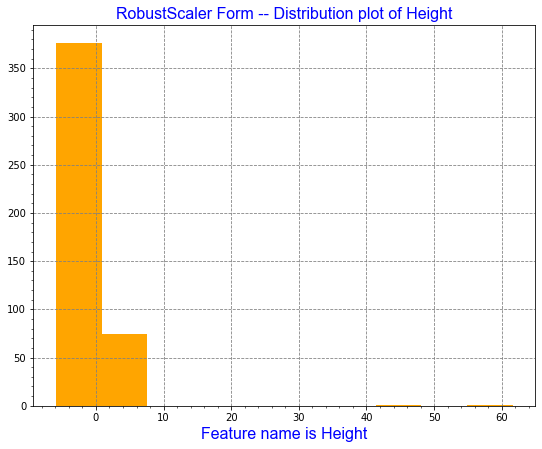


Descriptive Statistics of Feature Height in MinMaxScaler Form.
count    452.000000
mean       0.090649
std        0.055067
min        0.000000
25%        0.081481
50%        0.087407
75%        0.096296
max        1.000000
Name: Height, dtype: float64 



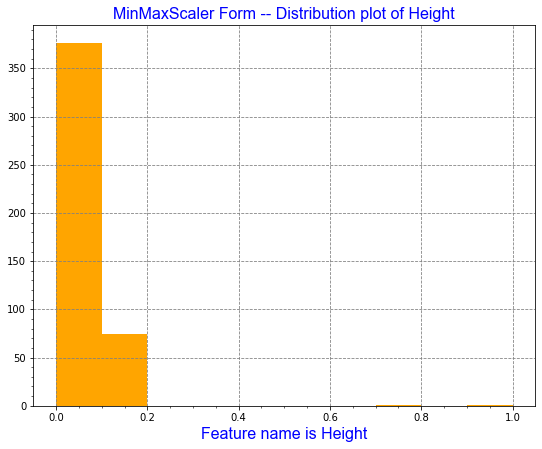

In [27]:
feature_scale_desc_stats(cad_df,'Height',[None,'ss','rs','mms'])

### So, its evident that **Height** has some **Outliers**.

## **Visualizing Weight Feature *(Measurement Unit :: Kilograms)***

In [28]:
pd.DataFrame(cad_df['Weight'].sort_values(ascending=False)).head(10)

Weight
213     176
254     124
308     110
269     106
95      105
204     105
90      104
98      104
73      100
239      98


Descriptive Statistics of Feature Weight in Original Form.
count    452.000000
mean      68.170354
std       16.590803
min        6.000000
25%       59.000000
50%       68.000000
75%       79.000000
max      176.000000
Name: Weight, dtype: float64 



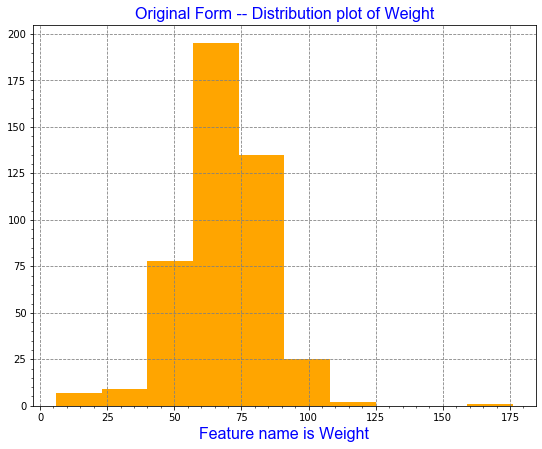


Descriptive Statistics of Feature Weight in StandardScaler Form.
count    4.520000e+02
mean     2.318696e-16
std      1.001108e+00
min     -3.751430e+00
25%     -5.533497e-01
50%     -1.027935e-02
75%      6.534732e-01
max      6.506564e+00
Name: Weight, dtype: float64 



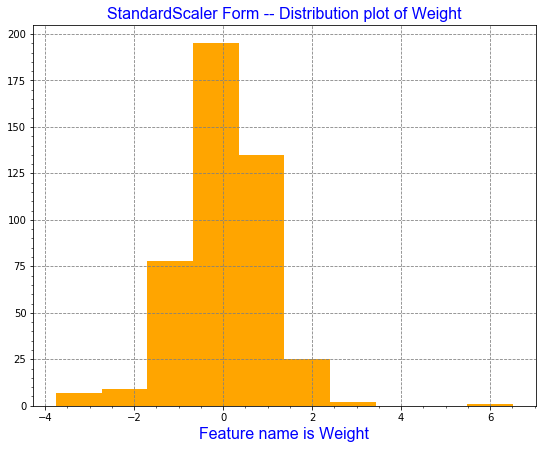


Descriptive Statistics of Feature Weight in RobustScaler Form.
count    452.000000
mean       0.008518
std        0.829540
min       -3.100000
25%       -0.450000
50%        0.000000
75%        0.550000
max        5.400000
Name: Weight, dtype: float64 



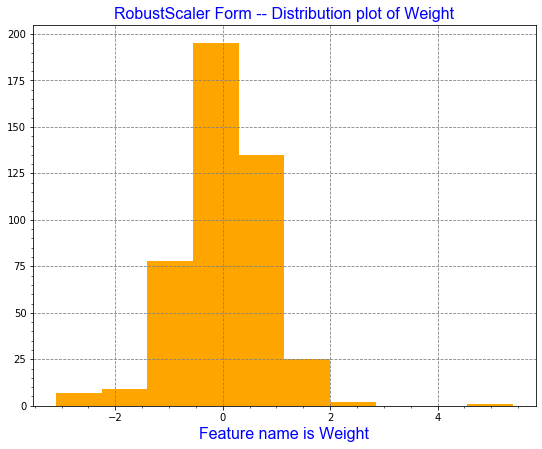


Descriptive Statistics of Feature Weight in MinMaxScaler Form.
count    452.000000
mean       0.365708
std        0.097593
min        0.000000
25%        0.311765
50%        0.364706
75%        0.429412
max        1.000000
Name: Weight, dtype: float64 



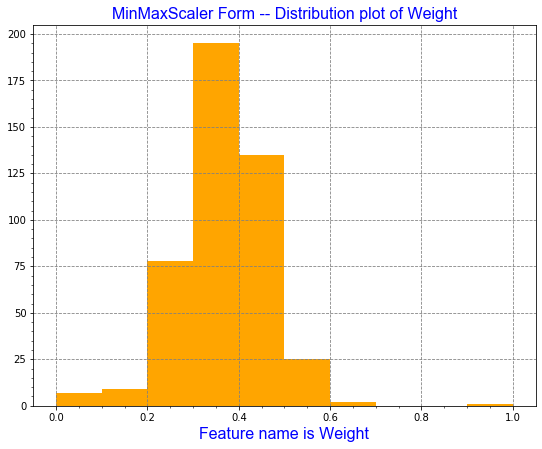

In [29]:
feature_scale_desc_stats(cad_df,'Weight',[None,'ss','rs','mms'])

### So, its evident that **Weight** has some **outliers**.

## **Visualizing QRS_duration *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature QRS_duration in Original Form.
count    452.000000
mean      88.920354
std       15.364394
min       55.000000
25%       80.000000
50%       86.000000
75%       94.000000
max      188.000000
Name: QRS_duration, dtype: float64 



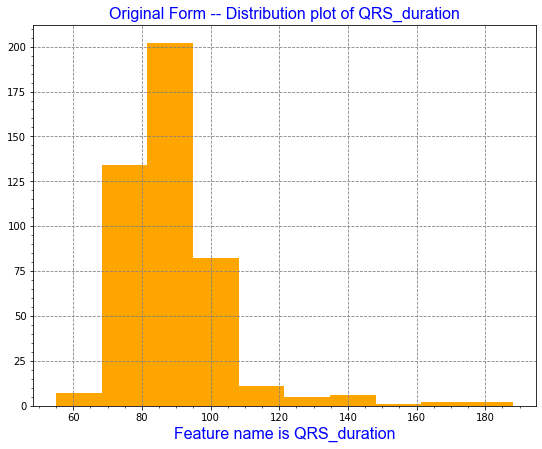


Descriptive Statistics of Feature QRS_duration in StandardScaler Form.
count    4.520000e+02
mean     2.515196e-16
std      1.001108e+00
min     -2.210171e+00
25%     -5.812294e-01
50%     -1.902834e-01
75%      3.309779e-01
max      6.455798e+00
Name: QRS_duration, dtype: float64 



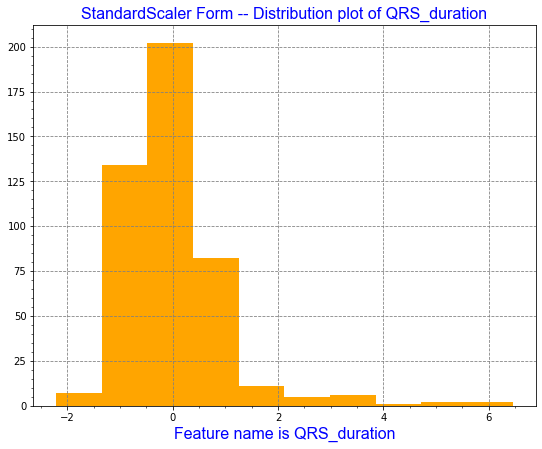


Descriptive Statistics of Feature QRS_duration in RobustScaler Form.
count    452.000000
mean       0.208597
std        1.097457
min       -2.214286
25%       -0.428571
50%        0.000000
75%        0.571429
max        7.285714
Name: QRS_duration, dtype: float64 



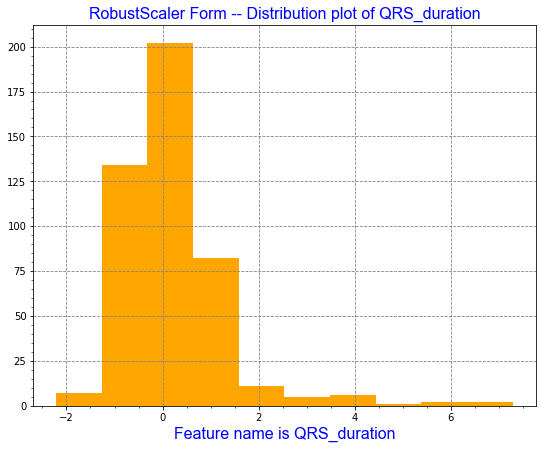


Descriptive Statistics of Feature QRS_duration in MinMaxScaler Form.
count    452.000000
mean       0.255040
std        0.115522
min        0.000000
25%        0.187970
50%        0.233083
75%        0.293233
max        1.000000
Name: QRS_duration, dtype: float64 



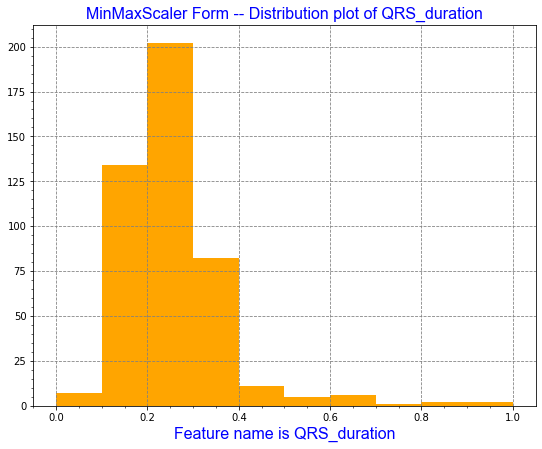

In [30]:
feature_scale_desc_stats(cad_df,'QRS_duration',[None,'ss','rs','mms'])

### So, its evident that **QRS_duration** has some **outliers**.

## **Visualizing P_R_interval *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature P_R_interval in Original Form.
count    452.000000
mean     155.152655
std       44.842283
min        0.000000
25%      142.000000
50%      157.000000
75%      175.000000
max      524.000000
Name: P_R_interval, dtype: float64 



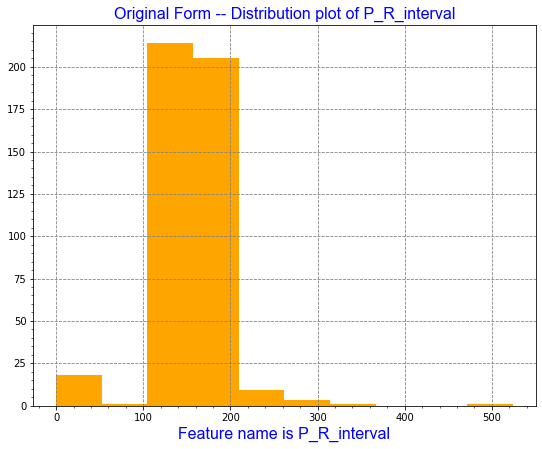


Descriptive Statistics of Feature P_R_interval in StandardScaler Form.
count    4.520000e+02
mean    -1.213385e-16
std      1.001108e+00
min     -3.463797e+00
25%     -2.936342e-01
50%      4.124215e-02
75%      4.430938e-01
max      8.234551e+00
Name: P_R_interval, dtype: float64 



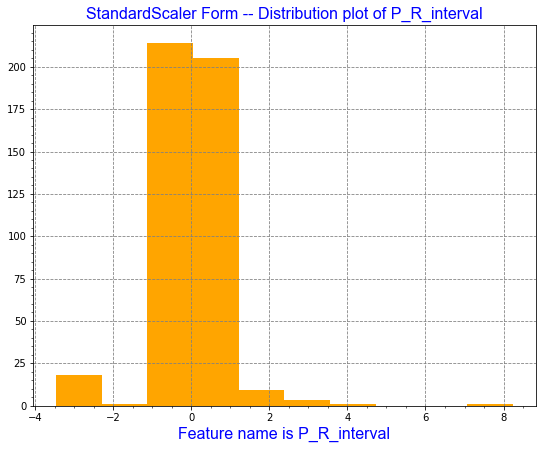


Descriptive Statistics of Feature P_R_interval in RobustScaler Form.
count    452.000000
mean      -0.055980
std        1.358857
min       -4.757576
25%       -0.454545
50%        0.000000
75%        0.545455
max       11.121212
Name: P_R_interval, dtype: float64 



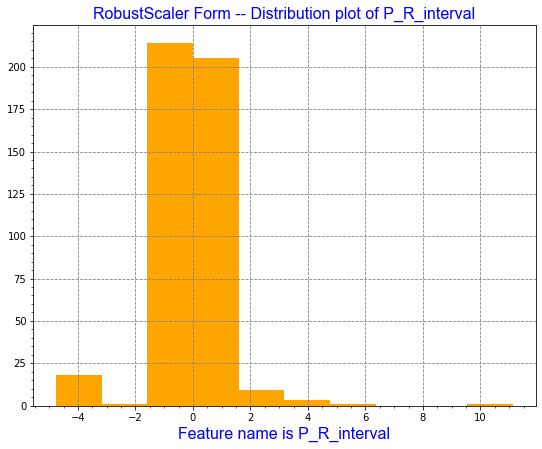


Descriptive Statistics of Feature P_R_interval in MinMaxScaler Form.
count    452.000000
mean       0.296093
std        0.085577
min        0.000000
25%        0.270992
50%        0.299618
75%        0.333969
max        1.000000
Name: P_R_interval, dtype: float64 



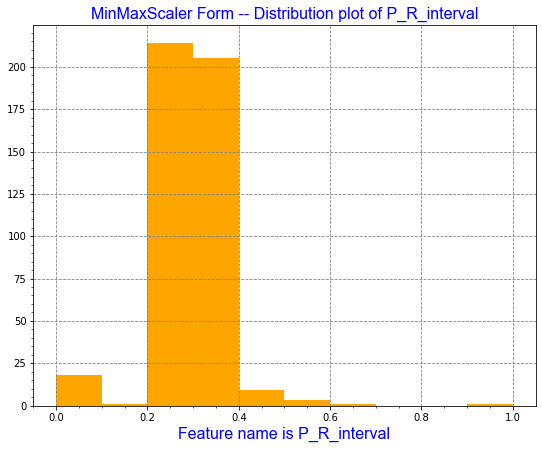

In [31]:
feature_scale_desc_stats(cad_df,'P_R_interval',[None,'ss','rs','mms'])

### So, its evident that **P_R_interval** has some **outliers**.

## **Visualizing Q_T_interval *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature Q_T_interval in Original Form.
count    452.000000
mean     367.207965
std       33.385421
min      232.000000
25%      350.000000
50%      367.000000
75%      384.000000
max      509.000000
Name: Q_T_interval, dtype: float64 



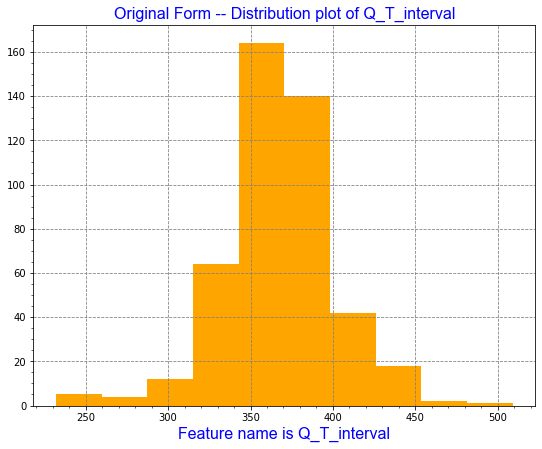


Descriptive Statistics of Feature Q_T_interval in StandardScaler Form.
count    4.520000e+02
mean     2.908195e-16
std      1.001108e+00
min     -4.054398e+00
25%     -5.160046e-01
50%     -6.236106e-03
75%      5.035324e-01
max      4.251830e+00
Name: Q_T_interval, dtype: float64 



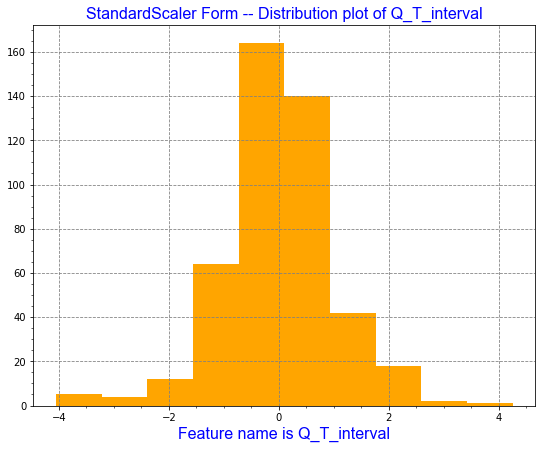


Descriptive Statistics of Feature Q_T_interval in RobustScaler Form.
count    452.000000
mean       0.006117
std        0.981924
min       -3.970588
25%       -0.500000
50%        0.000000
75%        0.500000
max        4.176471
Name: Q_T_interval, dtype: float64 



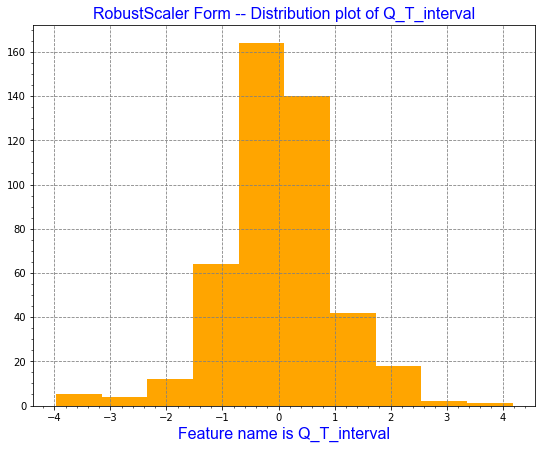


Descriptive Statistics of Feature Q_T_interval in MinMaxScaler Form.
count    452.000000
mean       0.488115
std        0.120525
min        0.000000
25%        0.425993
50%        0.487365
75%        0.548736
max        1.000000
Name: Q_T_interval, dtype: float64 



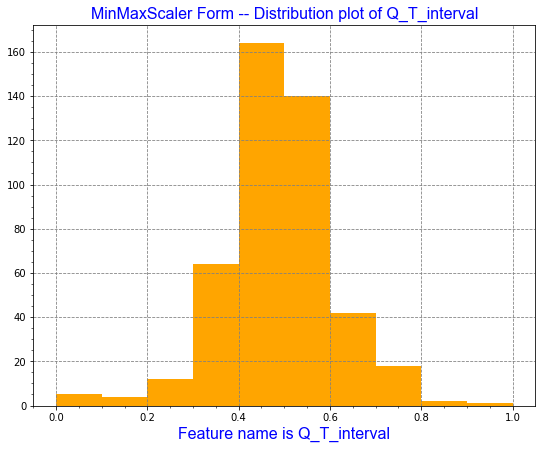

In [32]:
feature_scale_desc_stats(cad_df,'Q_T_interval',[None,'ss','rs','mms'])

### So, its evident that **Q_T_interval** has some **outliers**.

## **Visualizing T_interval *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature T_interval in Original Form.
count    452.000000
mean     169.949115
std       35.633072
min      108.000000
25%      148.000000
50%      162.000000
75%      179.000000
max      381.000000
Name: T_interval, dtype: float64 



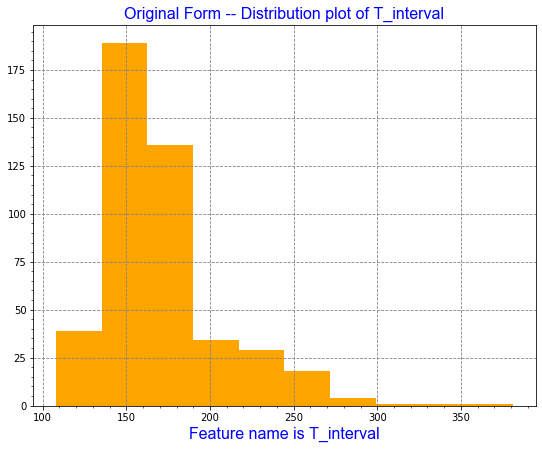


Descriptive Statistics of Feature T_interval in StandardScaler Form.
count    4.520000e+02
mean     3.222594e-16
std      1.001108e+00
min     -1.740455e+00
25%     -6.166585e-01
50%     -2.233297e-01
75%      2.542838e-01
max      5.929456e+00
Name: T_interval, dtype: float64 



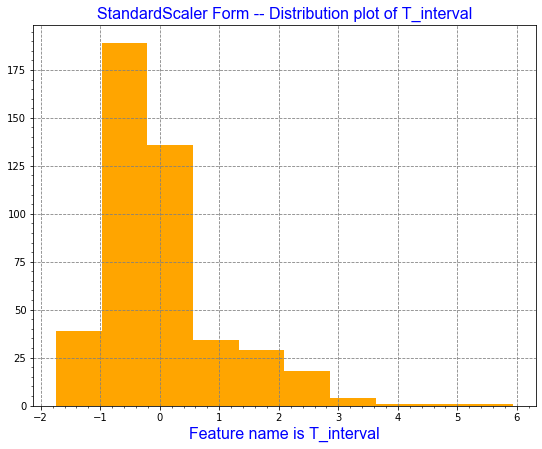


Descriptive Statistics of Feature T_interval in RobustScaler Form.
count    452.000000
mean       0.256423
std        1.149454
min       -1.741935
25%       -0.451613
50%        0.000000
75%        0.548387
max        7.064516
Name: T_interval, dtype: float64 



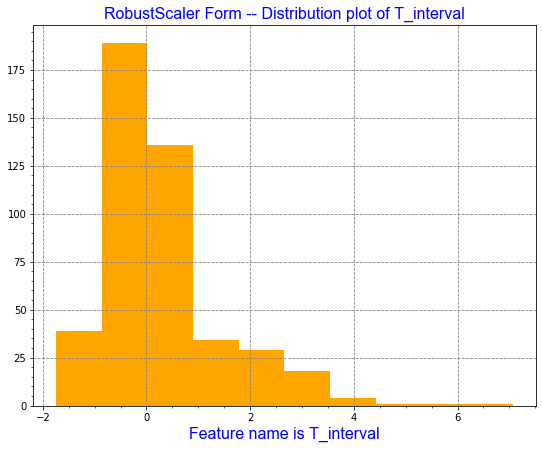


Descriptive Statistics of Feature T_interval in MinMaxScaler Form.
count    452.000000
mean       0.226920
std        0.130524
min        0.000000
25%        0.146520
50%        0.197802
75%        0.260073
max        1.000000
Name: T_interval, dtype: float64 



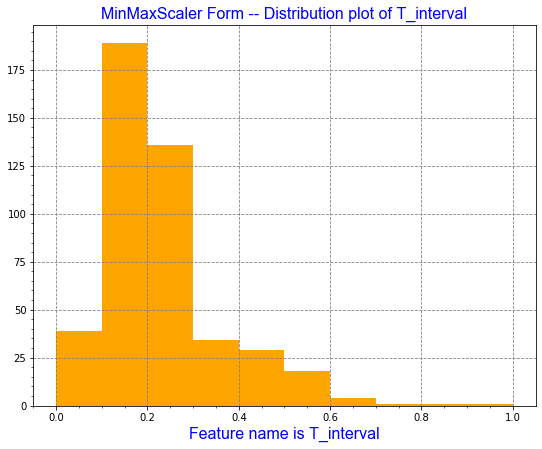

In [33]:
feature_scale_desc_stats(cad_df,'T_interval',[None,'ss','rs','mms'])

### So, its evident that **T_interval** has some **outliers**.

## **Visualizing P_interval *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature P_interval in Original Form.
count    452.000000
mean      90.004425
std       25.826643
min        0.000000
25%       79.000000
50%       91.000000
75%      102.000000
max      205.000000
Name: P_interval, dtype: float64 



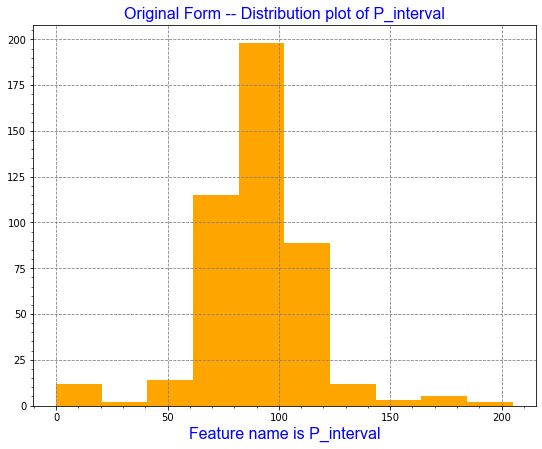


Descriptive Statistics of Feature P_interval in StandardScaler Form.
count    4.520000e+02
mean    -3.536994e-17
std      1.001108e+00
min     -3.488806e+00
25%     -4.265602e-01
50%      3.859109e-02
75%      4.649798e-01
max      4.457528e+00
Name: P_interval, dtype: float64 



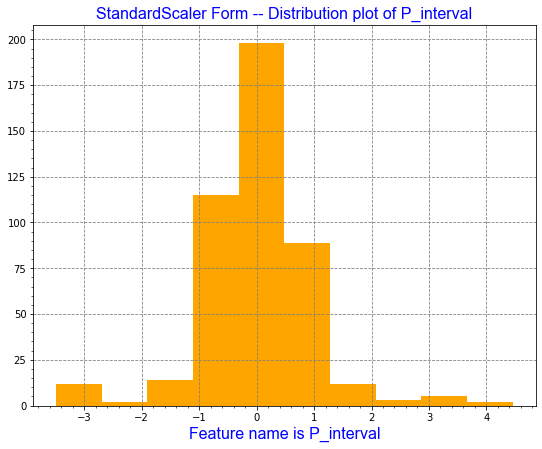


Descriptive Statistics of Feature P_interval in RobustScaler Form.
count    452.000000
mean      -0.043286
std        1.122898
min       -3.956522
25%       -0.521739
50%        0.000000
75%        0.478261
max        4.956522
Name: P_interval, dtype: float64 



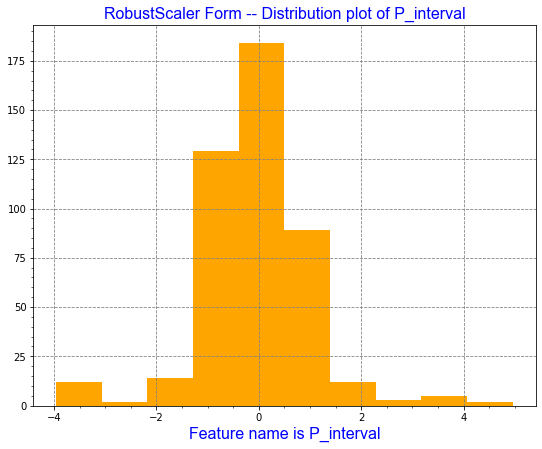


Descriptive Statistics of Feature P_interval in MinMaxScaler Form.
count    452.000000
mean       0.439046
std        0.125984
min        0.000000
25%        0.385366
50%        0.443902
75%        0.497561
max        1.000000
Name: P_interval, dtype: float64 



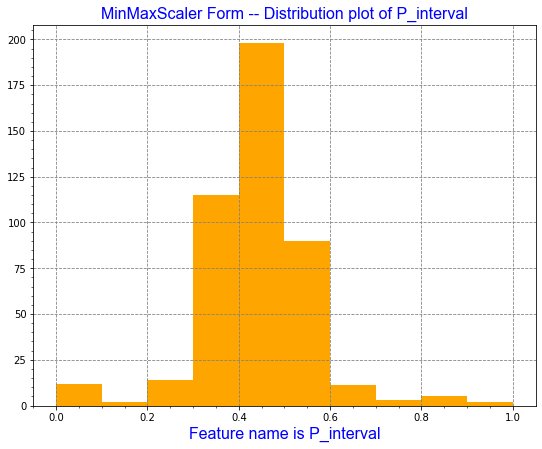

In [34]:
feature_scale_desc_stats(cad_df,'P_interval',[None,'ss','rs','mms'])

### So, its evident that **P_interval** has some **outliers**.

## **Visualizing QRS_Vector_angle *(Measurement Unit :: Degrees)***


Descriptive Statistics of Feature QRS_Vector_angle in Original Form.
count    452.000000
mean      33.676991
std       45.431434
min     -172.000000
25%        3.750000
50%       40.000000
75%       66.000000
max      169.000000
Name: QRS_Vector_angle, dtype: float64 



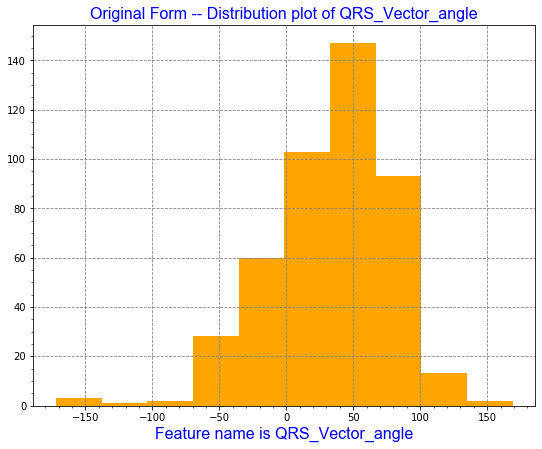


Descriptive Statistics of Feature QRS_Vector_angle in StandardScaler Form.
count    4.520000e+02
mean     5.894990e-17
std      1.001108e+00
min     -4.532212e+00
25%     -6.594586e-01
50%      1.393312e-01
75%      7.122563e-01
max      2.981921e+00
Name: QRS_Vector_angle, dtype: float64 



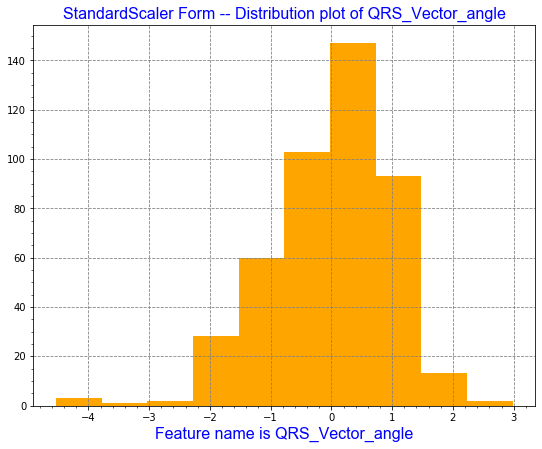


Descriptive Statistics of Feature QRS_Vector_angle in RobustScaler Form.
count    452.000000
mean      -0.101574
std        0.729822
min       -3.405622
25%       -0.582329
50%        0.000000
75%        0.417671
max        2.072289
Name: QRS_Vector_angle, dtype: float64 



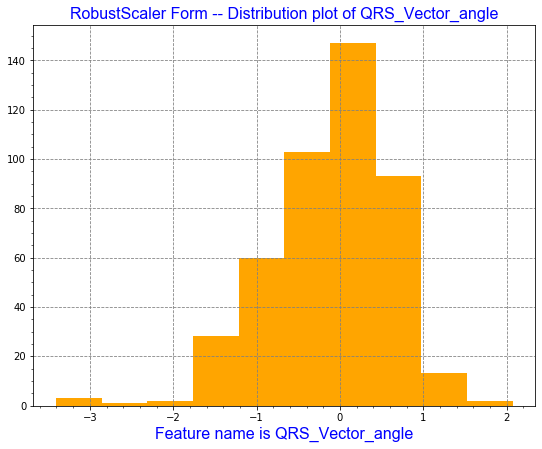


Descriptive Statistics of Feature QRS_Vector_angle in MinMaxScaler Form.
count    452.000000
mean       0.603158
std        0.133230
min        0.000000
25%        0.515396
50%        0.621701
75%        0.697947
max        1.000000
Name: QRS_Vector_angle, dtype: float64 



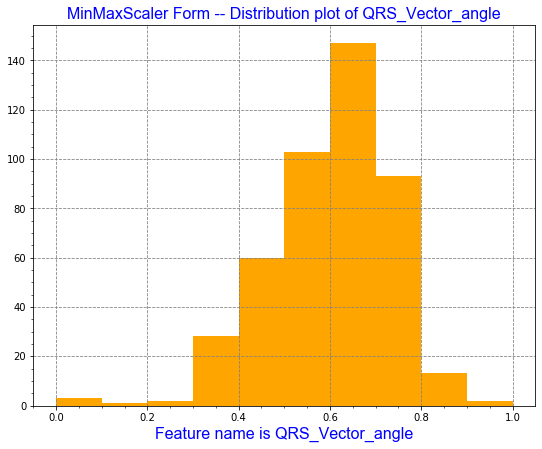

In [35]:
feature_scale_desc_stats(cad_df,'QRS_Vector_angle',[None,'ss','rs','mms'])

### So, its evident that **QRS_Vector_angle** has some **outliers**.

## **First 10 variables Transformation and Outliers removal**

In [36]:
cad_df.head()

Age  Gender  Height  Weight  QRS_duration  P_R_interval  Q_T_interval  \
0   75       0     190      80            91           193           371   
1   56       1     165      64            81           174           401   
2   54       0     172      95           138           163           386   
3   55       0     175      94           100           202           380   
4   75       0     190      80            88           181           360   

   T_interval  P_interval  QRS_Vector_angle T_Vector_angle P_Vector_angle  \
0         174         121               -16             13             64   
1         149          39                25             37            -17   
2         185         102                96             34             70   
3         179         143                28             11             -5   
4         177         103               -16             13             61   

  QRST_Vector_angle J_Vector_angle Heart_rate  DI_Q_wave_width  \
0                -2            NaN         63                0   
1                31            NaN         53                0   
2                66             23         75                0   
3                20            NaN         71                0   
4                 3            NaN        NaN                0   

   DI_R_wave_width  DI_S_wave_width  DI_R1_wave_width  DI_S1_wave_width  \
0               52               44                 0                 0   
1               48                0                 0                 0   
2               40               80                 0                 0   
3               72               20                 0                 0   
4               48               40                 0                 0   

   DI_Intrinsic_deflections  DI_Ragged_R_wave  DI_R_wave_diphasic_derivation  \
0                        32                 0                              0   
1                        24                 0                              0   
2                        24                 0                              0   
3                        48                 0                              0   
4                        28                 0                              0   

   DI_Ragged_P_wave  DI_P_Wave_diphasic_derivation  DI_Ragged_T_wave  \
0                 0                              0                 0   
1                 0                              0                 0   
2                 0                              0                 0   
3                 0                              0                 0   
4                 0                              0                 0   

   DI_T_wave_diphasic_derivation  DII_Q_wave_width  DII_R_wave_width  \
0                              0                 0                44   
1                              0                 0                64   
2                              0                20                56   
3                              0                 0                64   
4                              0                 0                40   

   DII_S_wave_width  DII_R1_wave_width  DII_S1_wave_width  \
0                20                 36                  0   
1                 0                  0                  0   
2                52                  0                  0   
3                36                  0                  0   
4                24                  0                  0   

   DII_Intrinsic_deflections  DII_Ragged_R_wave  \
0                         28                  0   
1                         24                  0   
2                         40                  0   
3                         36                  0   
4                         24                  0   

   DII_R_wave_diphasic_derivation  DII_Ragged_P_wave  \
0                               0                  0   
1                               0                  0   
2                               0             

### ***Running the FIX_OUTLIER function on Features***


Descriptive Statistics of Feature Age in Original Form.
count    452.000000
mean      46.471239
std       16.466631
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: Age, dtype: float64 



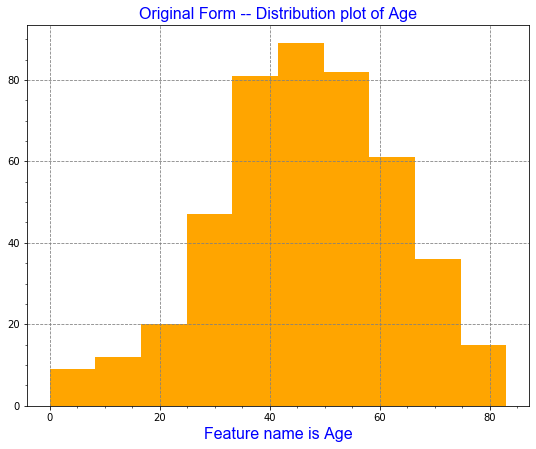

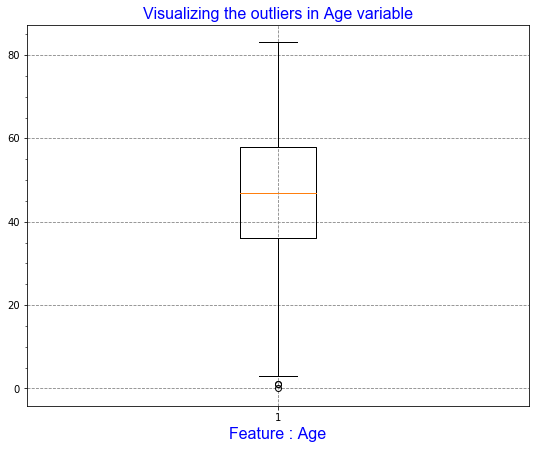



######## Applied Tuky IQR Method-I ########

47.0 36.0 58.0 22.0 3.0 91.0

Descriptive Statistics of Feature Fixed_Outliers_Age in Original Form.
count    452.000000
mean      46.774336
std       16.034399
min        3.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: Fixed_Outliers_Age, dtype: float64 



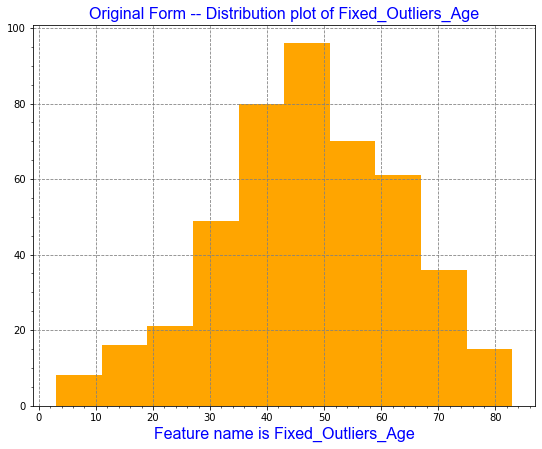

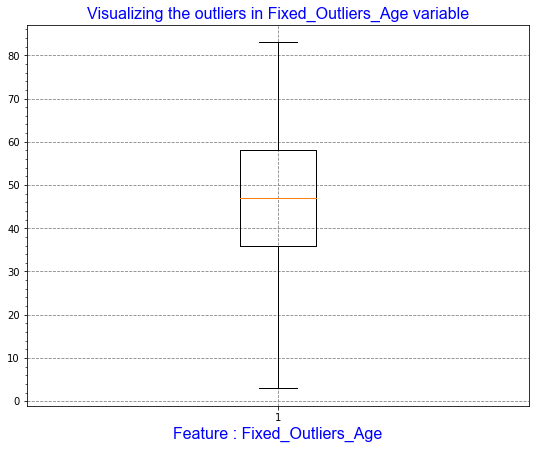



######## Applied Tuky IQR Method-II ########

47.0 36.0 58.0 22.0 3.0 91.0

Descriptive Statistics of Feature Fixed_Outliers_Age in Original Form.
count    452.000000
mean      46.774336
std       16.034399
min        3.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: Fixed_Outliers_Age, dtype: float64 



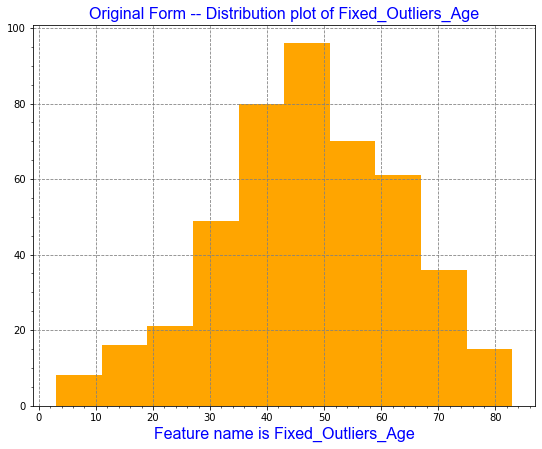

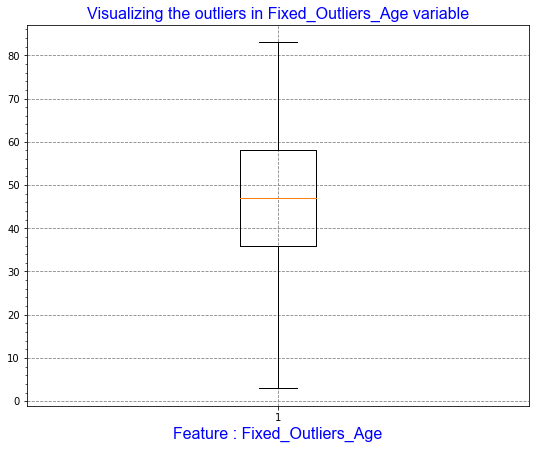



$$$$$$$$ Removed Outliers from Age and created its new variable Fixed_Outliers_Age $$$$$$$$


Descriptive Statistics of Feature Height in Original Form.
count    452.000000
mean     166.188053
std       37.170340
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: Height, dtype: float64 



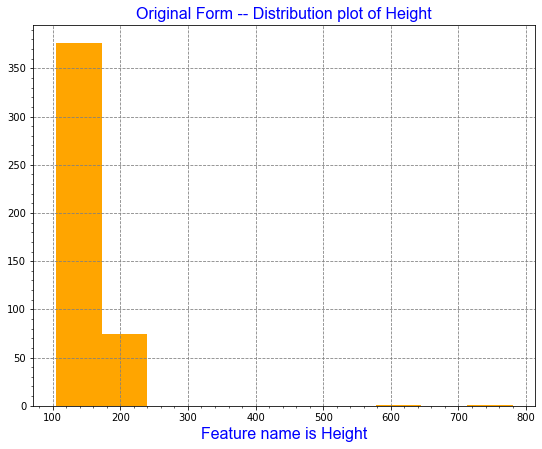

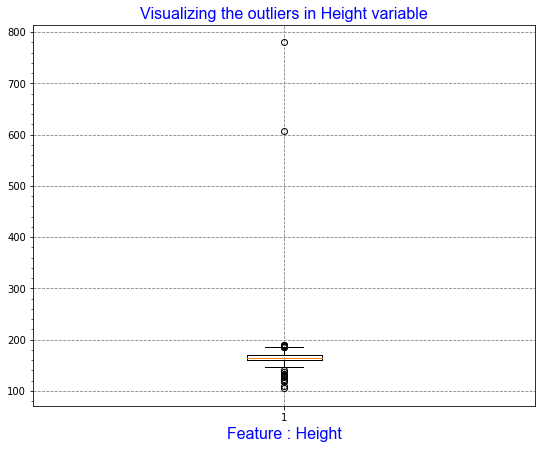



######## Applied Tuky IQR Method-I ########

164.0 160.0 170.0 10.0 145.0 185.0

Descriptive Statistics of Feature Fixed_Outliers_Height in Original Form.
count    452.000000
mean     164.593367
std        7.878492
min      146.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      191.928480
Name: Fixed_Outliers_Height, dtype: float64 



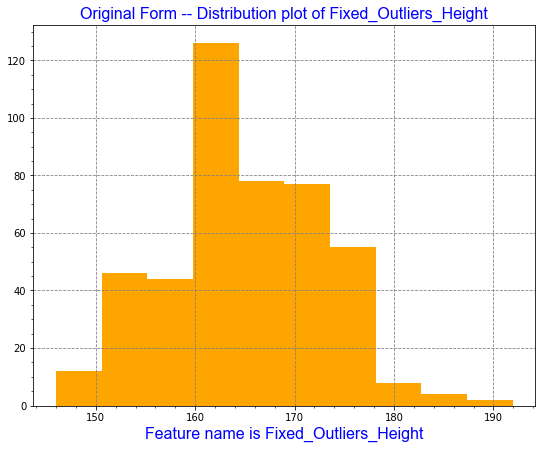

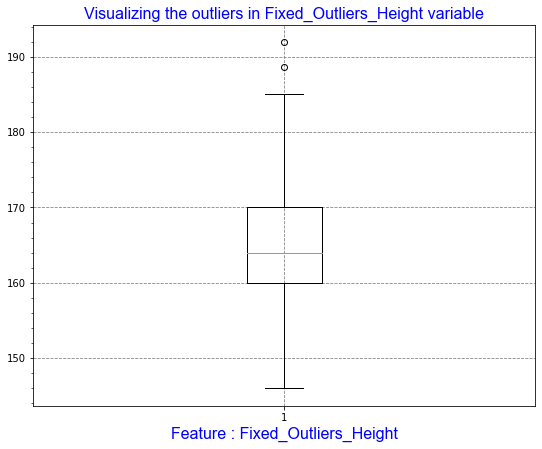



######## Applied Tuky IQR Method-II ########

164.0 160.0 170.0 10.0 145.0 185.0

Descriptive Statistics of Feature Fixed_Outliers_Height in Original Form.
count    452.000000
mean     164.569946
std        7.808713
min      146.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      185.000000
Name: Fixed_Outliers_Height, dtype: float64 



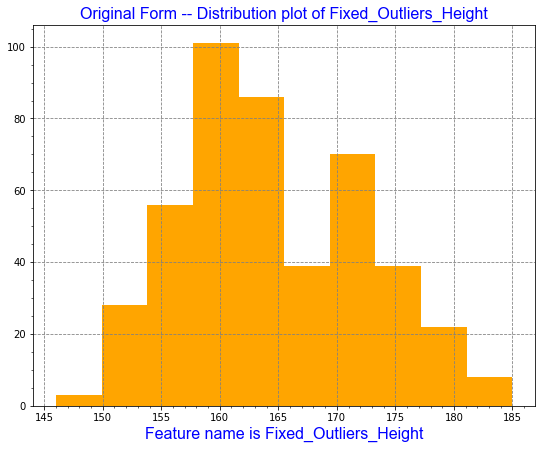

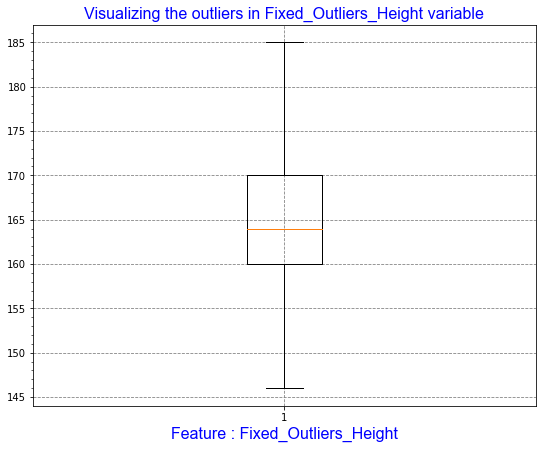



$$$$$$$$ Removed Outliers from Height and created its new variable Fixed_Outliers_Height $$$$$$$$


Descriptive Statistics of Feature Weight in Original Form.
count    452.000000
mean      68.170354
std       16.590803
min        6.000000
25%       59.000000
50%       68.000000
75%       79.000000
max      176.000000
Name: Weight, dtype: float64 



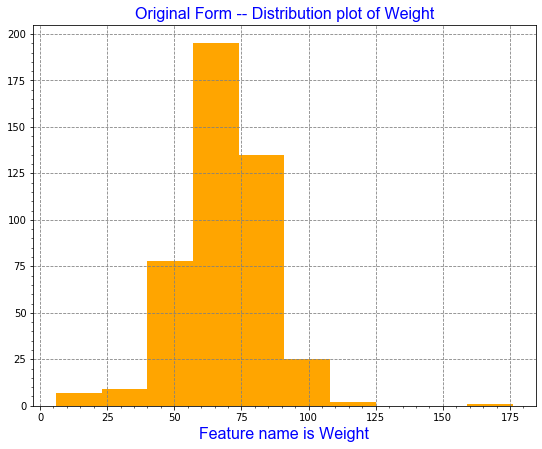

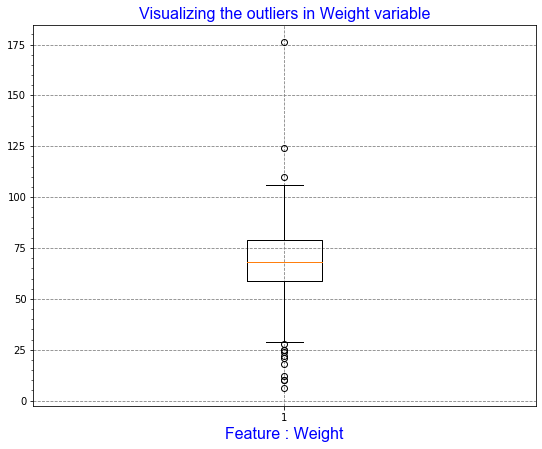



######## Applied Tuky IQR Method-I ########

68.0 59.0 79.0 20.0 29.0 109.0

Descriptive Statistics of Feature Fixed_Outliers_Weight in Original Form.
count    452.000000
mean      68.900323
std       13.324087
min       29.000000
25%       60.000000
50%       68.000000
75%       78.616066
max      106.000000
Name: Fixed_Outliers_Weight, dtype: float64 



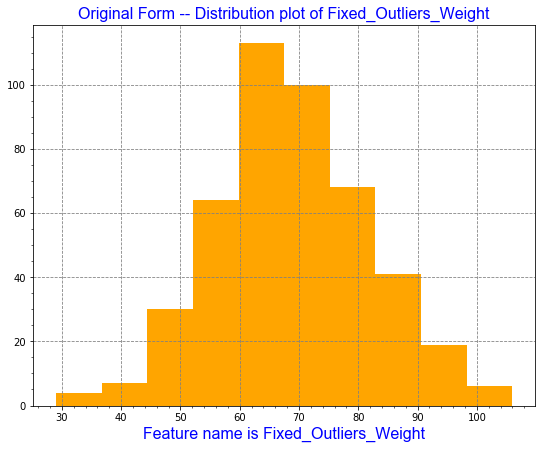

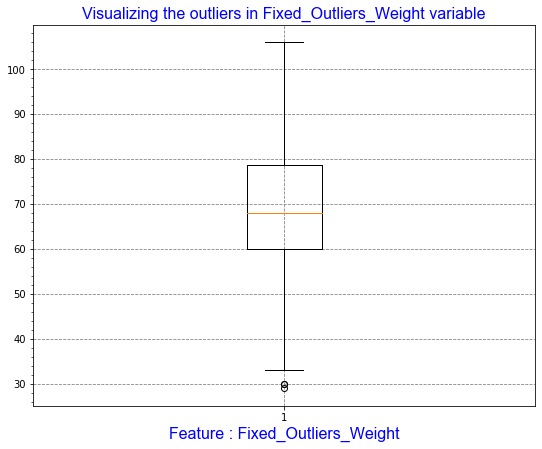



######## Applied Tuky IQR Method-II ########

68.0 60.0 78.61606636127613 18.616066361276125 32.07590045808581 106.54016590319031

Descriptive Statistics of Feature Fixed_Outliers_Weight in Original Form.
count    452.000000
mean      68.916313
std       13.278203
min       32.075900
25%       60.000000
50%       68.000000
75%       78.616066
max      106.000000
Name: Fixed_Outliers_Weight, dtype: float64 



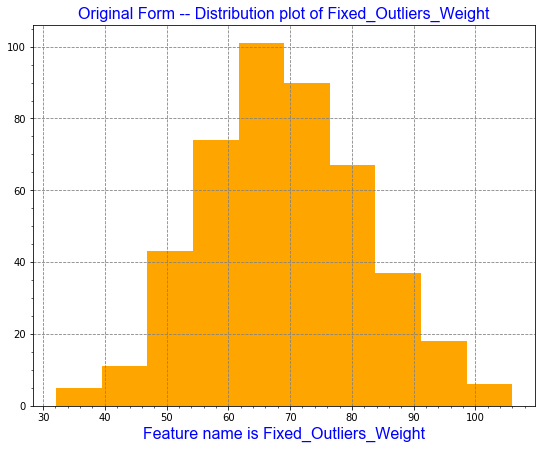

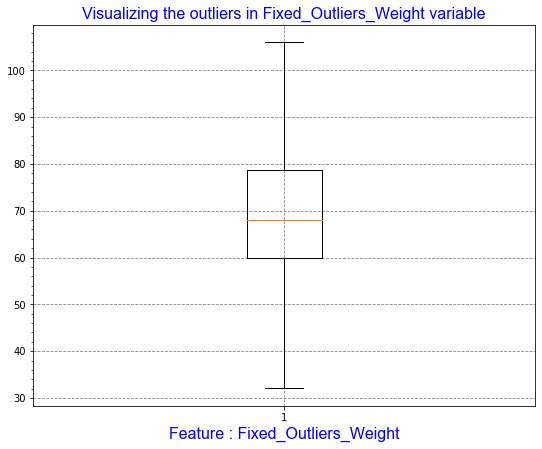



$$$$$$$$ Removed Outliers from Weight and created its new variable Fixed_Outliers_Weight $$$$$$$$


Descriptive Statistics of Feature QRS_duration in Original Form.
count    452.000000
mean      88.920354
std       15.364394
min       55.000000
25%       80.000000
50%       86.000000
75%       94.000000
max      188.000000
Name: QRS_duration, dtype: float64 



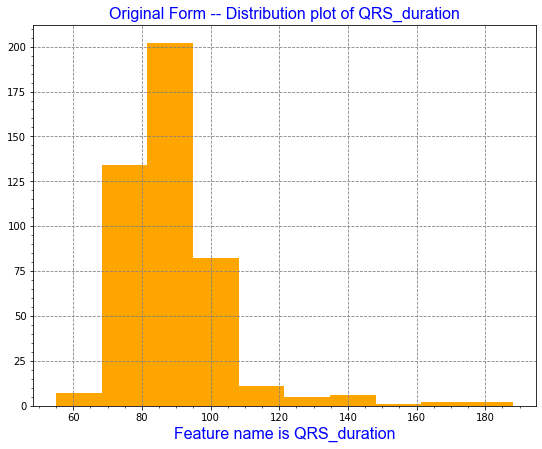

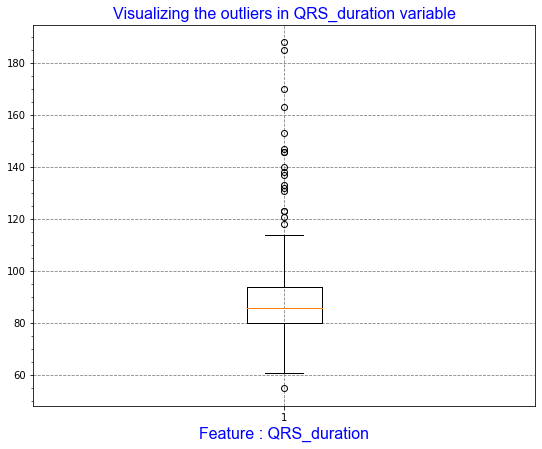



######## Applied Tuky IQR Method-I ########

86.0 80.0 94.0 14.0 59.0 115.0

Descriptive Statistics of Feature Fixed_Outliers_QRS_duration in Original Form.
count    452.000000
mean      87.135303
std        9.794724
min       61.000000
25%       80.000000
50%       86.000000
75%       94.000000
max      114.000000
Name: Fixed_Outliers_QRS_duration, dtype: float64 



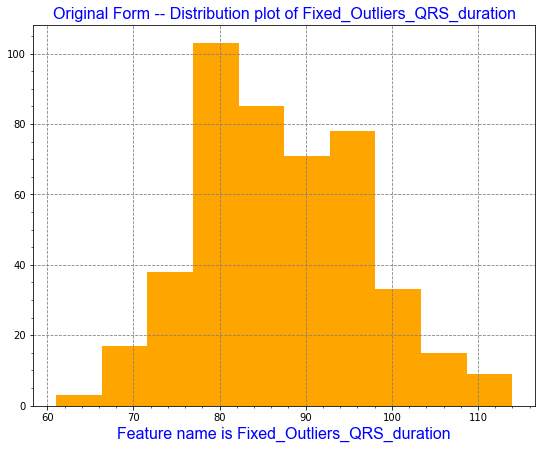

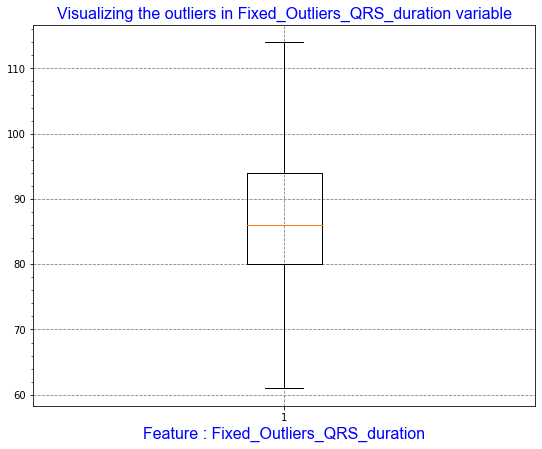



######## Applied Tuky IQR Method-II ########

86.0 80.0 94.0 14.0 59.0 115.0

Descriptive Statistics of Feature Fixed_Outliers_QRS_duration in Original Form.
count    452.000000
mean      87.135303
std        9.794724
min       61.000000
25%       80.000000
50%       86.000000
75%       94.000000
max      114.000000
Name: Fixed_Outliers_QRS_duration, dtype: float64 



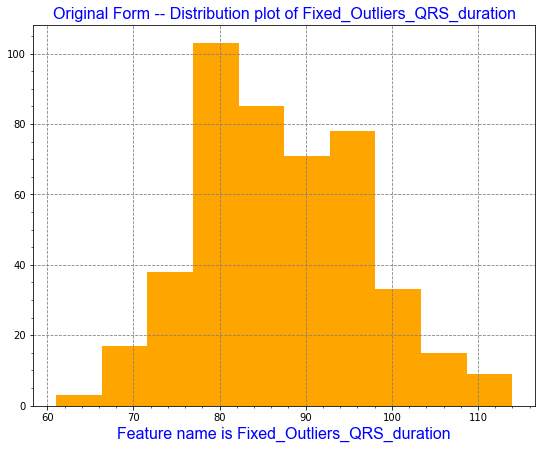

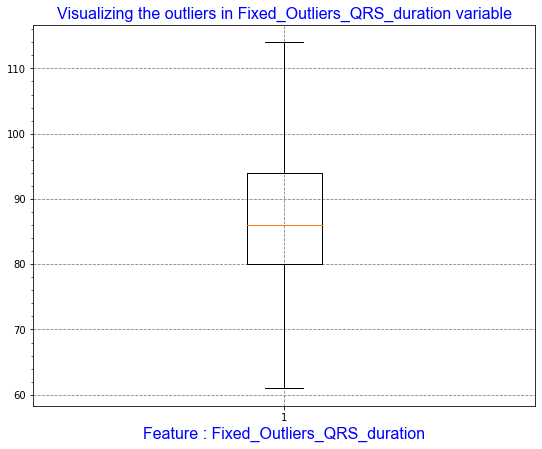



$$$$$$$$ Removed Outliers from QRS_duration and created its new variable Fixed_Outliers_QRS_duration $$$$$$$$


Descriptive Statistics of Feature P_R_interval in Original Form.
count    452.000000
mean     155.152655
std       44.842283
min        0.000000
25%      142.000000
50%      157.000000
75%      175.000000
max      524.000000
Name: P_R_interval, dtype: float64 



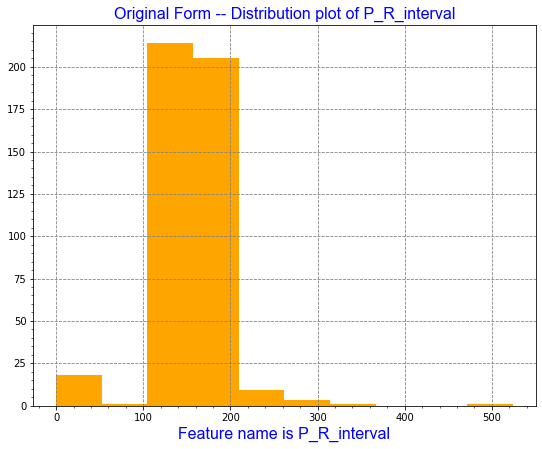

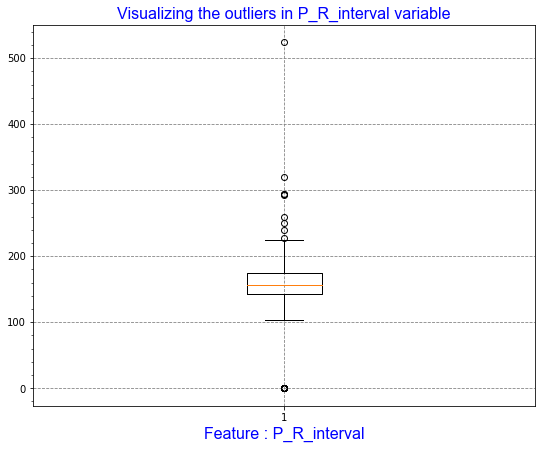



######## Applied Tuky IQR Method-I ########

157.0 142.0 175.0 33.0 92.5 224.5

Descriptive Statistics of Feature Fixed_Outliers_P_R_interval in Original Form.
count    452.000000
mean     158.895329
std       21.967134
min      103.000000
25%      145.000000
50%      157.000000
75%      174.000000
max      224.000000
Name: Fixed_Outliers_P_R_interval, dtype: float64 



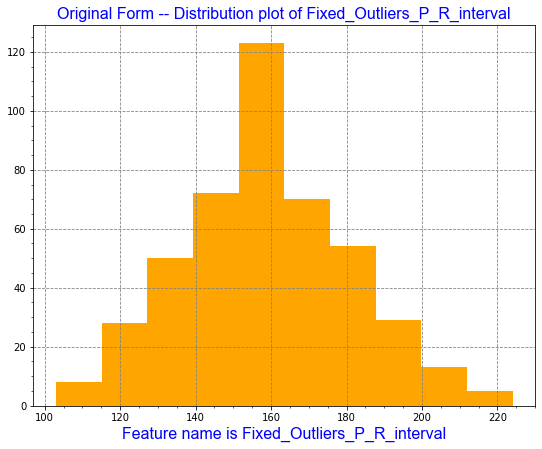

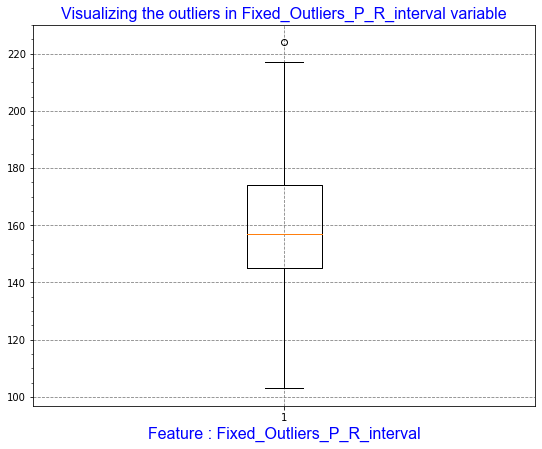



######## Applied Tuky IQR Method-II ########

157.0 145.0 174.0 29.0 101.5 217.5

Descriptive Statistics of Feature Fixed_Outliers_P_R_interval in Original Form.
count    452.000000
mean     158.880948
std       21.926509
min      103.000000
25%      145.000000
50%      157.000000
75%      174.000000
max      217.500000
Name: Fixed_Outliers_P_R_interval, dtype: float64 



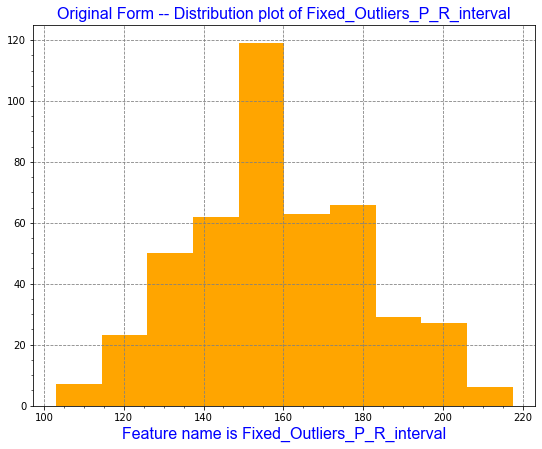

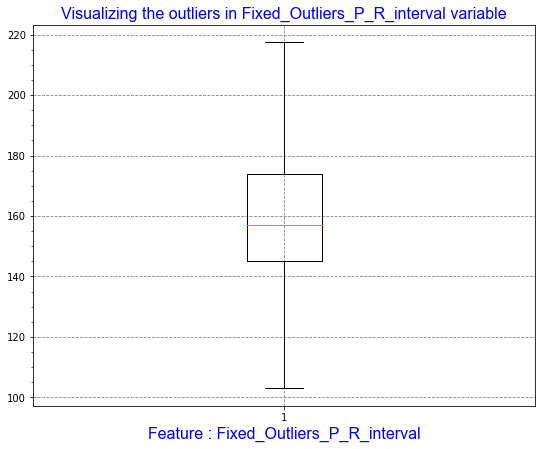



$$$$$$$$ Removed Outliers from P_R_interval and created its new variable Fixed_Outliers_P_R_interval $$$$$$$$


Descriptive Statistics of Feature Q_T_interval in Original Form.
count    452.000000
mean     367.207965
std       33.385421
min      232.000000
25%      350.000000
50%      367.000000
75%      384.000000
max      509.000000
Name: Q_T_interval, dtype: float64 



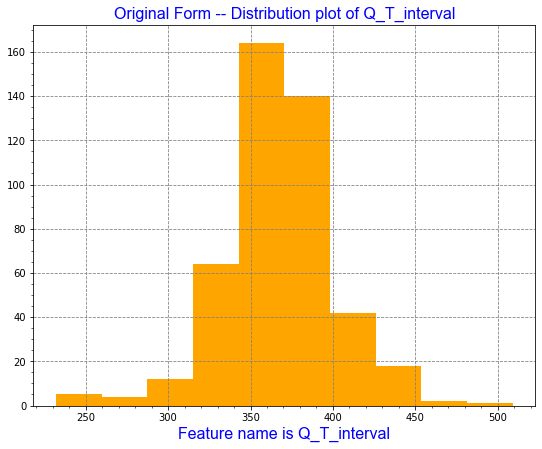

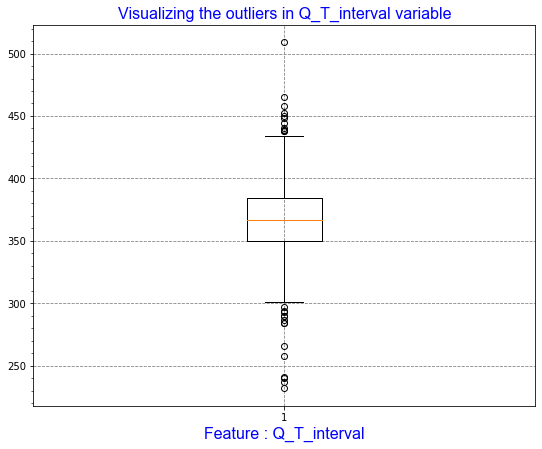



######## Applied Tuky IQR Method-I ########

367.0 350.0 384.0 34.0 299.0 435.0

Descriptive Statistics of Feature Fixed_Outliers_Q_T_interval in Original Form.
count    452.000000
mean     367.990616
std       25.097700
min      301.000000
25%      350.984405
50%      367.000000
75%      384.000000
max      434.000000
Name: Fixed_Outliers_Q_T_interval, dtype: float64 



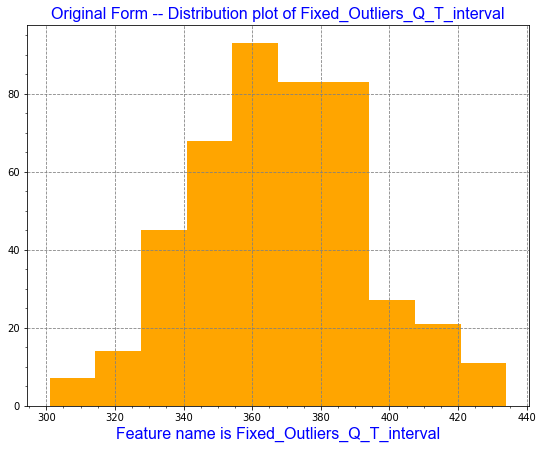

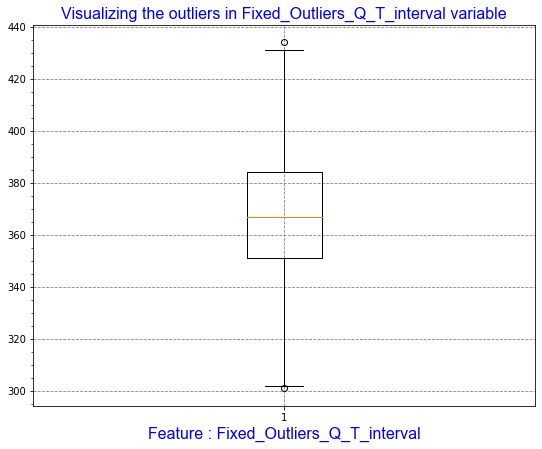



######## Applied Tuky IQR Method-II ########

367.0 350.98440539894773 384.0 33.01559460105227 301.4610134973693 433.5233919015784

Descriptive Statistics of Feature Fixed_Outliers_Q_T_interval in Original Form.
count    452.000000
mean     367.990581
std       25.092211
min      301.461013
25%      350.984405
50%      367.000000
75%      384.000000
max      433.523392
Name: Fixed_Outliers_Q_T_interval, dtype: float64 



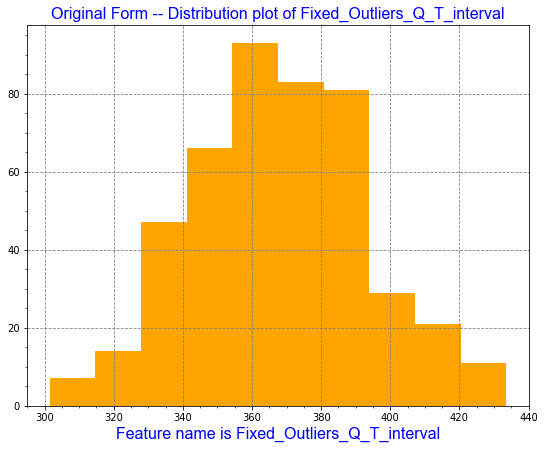

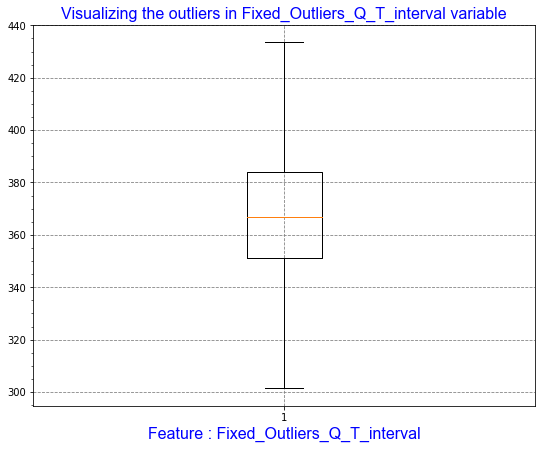



$$$$$$$$ Removed Outliers from Q_T_interval and created its new variable Fixed_Outliers_Q_T_interval $$$$$$$$


Descriptive Statistics of Feature T_interval in Original Form.
count    452.000000
mean     169.949115
std       35.633072
min      108.000000
25%      148.000000
50%      162.000000
75%      179.000000
max      381.000000
Name: T_interval, dtype: float64 



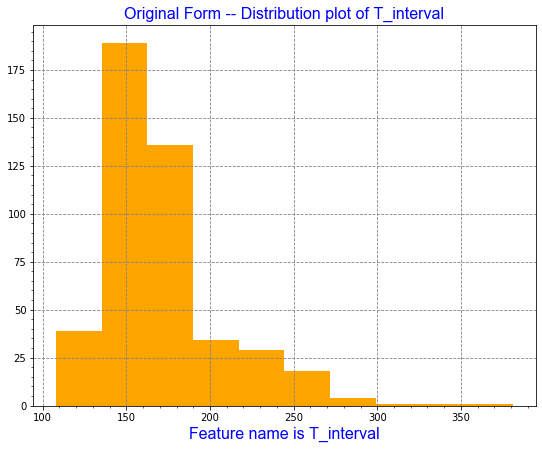

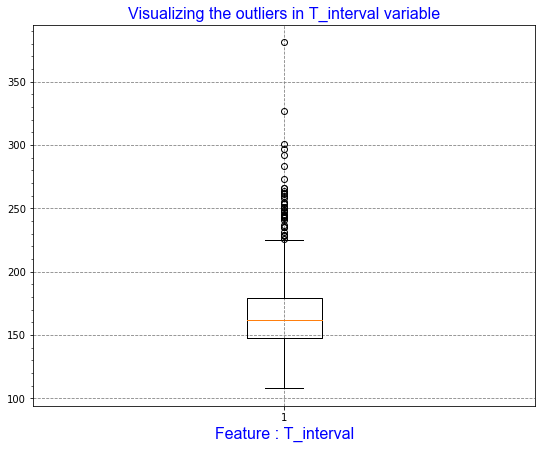



######## Applied Tuky IQR Method-I ########

162.0 148.0 179.0 31.0 101.5 225.5

Descriptive Statistics of Feature Fixed_Outliers_T_interval in Original Form.
count    452.000000
mean     163.103389
std       22.196497
min      108.000000
25%      148.000000
50%      162.000000
75%      177.329710
max      225.000000
Name: Fixed_Outliers_T_interval, dtype: float64 



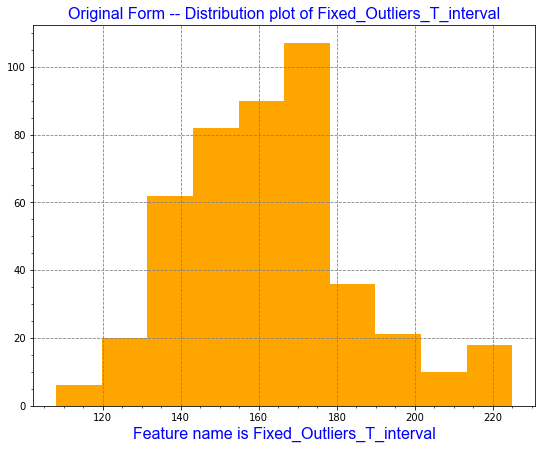

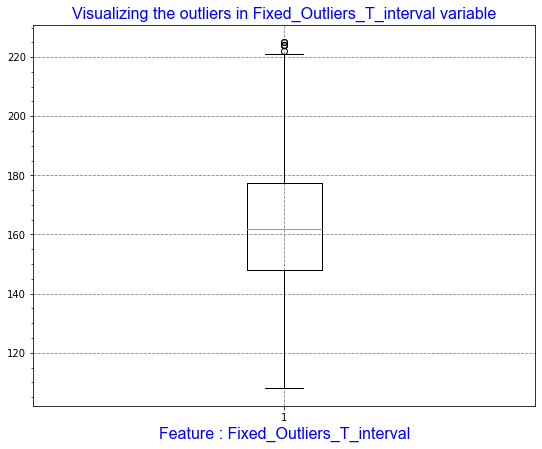



######## Applied Tuky IQR Method-II ########

162.0 148.0 177.3297097167559 29.3297097167559 104.00543542486615 221.32427429188976

Descriptive Statistics of Feature Fixed_Outliers_T_interval in Original Form.
count    452.000000
mean     163.067871
std       22.100445
min      108.000000
25%      148.000000
50%      162.000000
75%      177.329710
max      221.324274
Name: Fixed_Outliers_T_interval, dtype: float64 



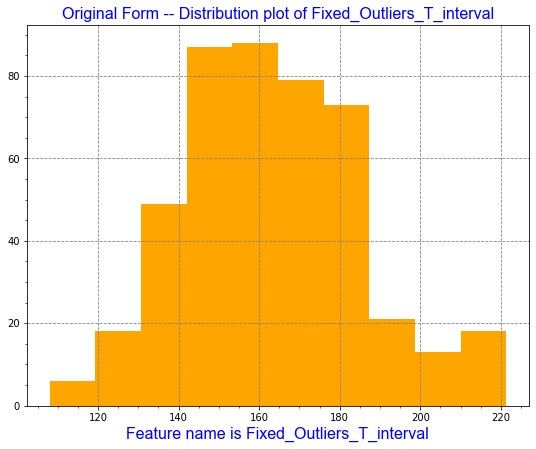

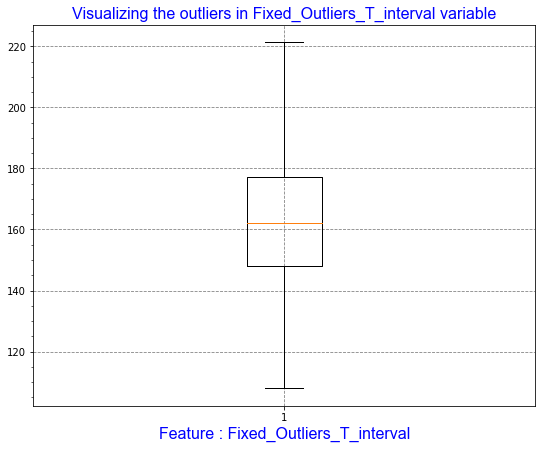



$$$$$$$$ Removed Outliers from T_interval and created its new variable Fixed_Outliers_T_interval $$$$$$$$


Descriptive Statistics of Feature P_interval in Original Form.
count    452.000000
mean      90.004425
std       25.826643
min        0.000000
25%       79.000000
50%       91.000000
75%      102.000000
max      205.000000
Name: P_interval, dtype: float64 



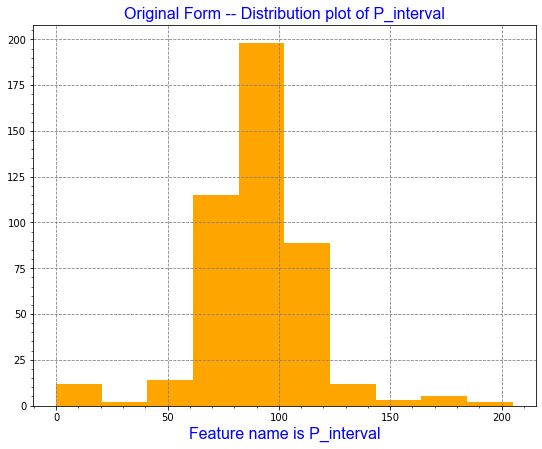

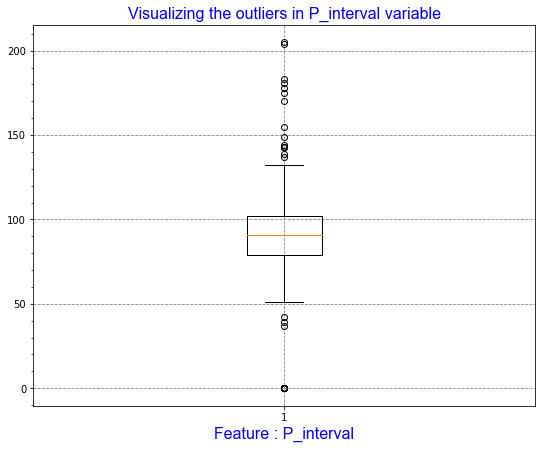



######## Applied Tuky IQR Method-I ########

91.0 79.0 102.0 23.0 44.5 136.5

Descriptive Statistics of Feature Fixed_Outliers_P_interval in Original Form.
count    452.000000
mean      90.657890
std       15.463002
min       51.000000
25%       80.000000
50%       91.000000
75%      102.000000
max      132.000000
Name: Fixed_Outliers_P_interval, dtype: float64 



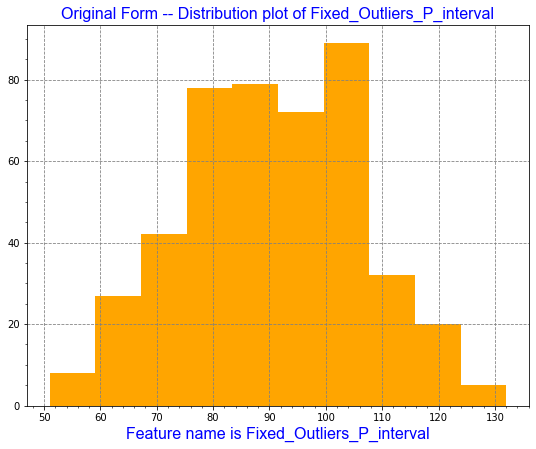

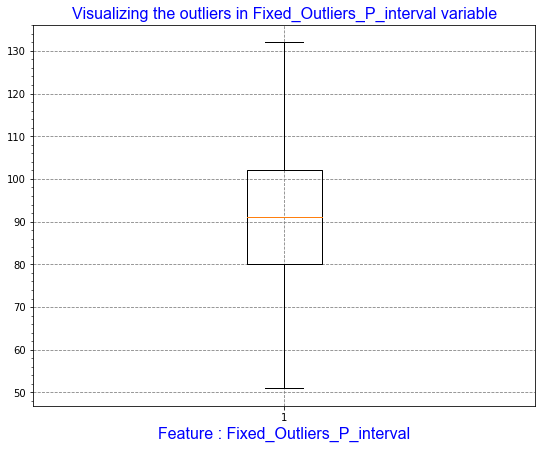



######## Applied Tuky IQR Method-II ########

91.0 80.0 102.0 22.0 47.0 135.0

Descriptive Statistics of Feature Fixed_Outliers_P_interval in Original Form.
count    452.000000
mean      90.657890
std       15.463002
min       51.000000
25%       80.000000
50%       91.000000
75%      102.000000
max      132.000000
Name: Fixed_Outliers_P_interval, dtype: float64 



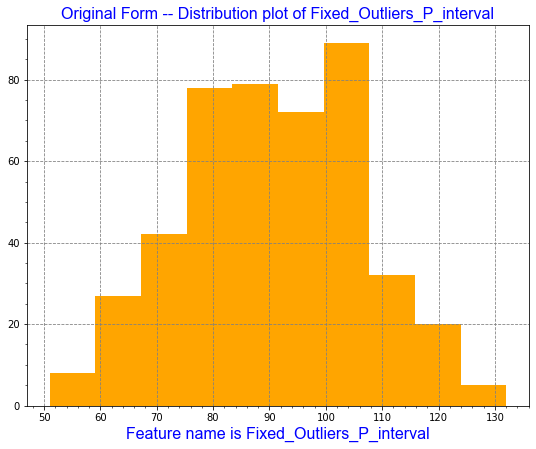

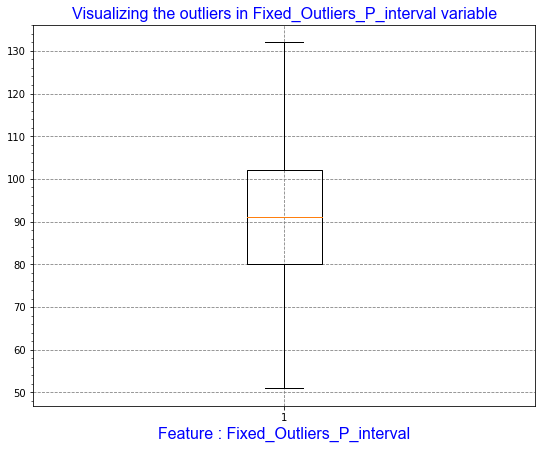



$$$$$$$$ Removed Outliers from P_interval and created its new variable Fixed_Outliers_P_interval $$$$$$$$


Descriptive Statistics of Feature QRS_Vector_angle in Original Form.
count    452.000000
mean      33.676991
std       45.431434
min     -172.000000
25%        3.750000
50%       40.000000
75%       66.000000
max      169.000000
Name: QRS_Vector_angle, dtype: float64 



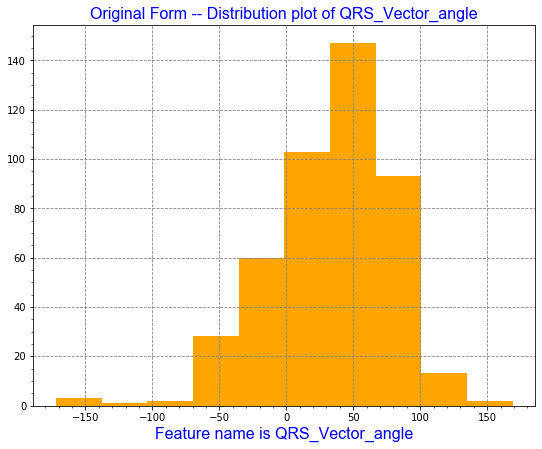

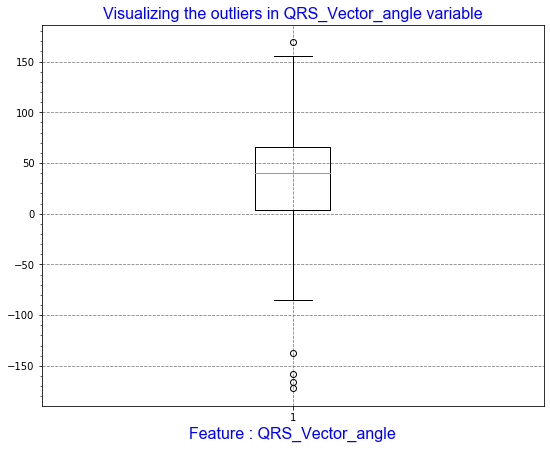



######## Applied Tuky IQR Method-I ########

40.0 3.75 66.0 62.25 -89.625 159.375

Descriptive Statistics of Feature Fixed_Outliers_QRS_Vector_angle in Original Form.
count    452.000000
mean      35.063554
std       41.163118
min      -85.000000
25%        5.000000
50%       40.000000
75%       66.000000
max      155.000000
Name: Fixed_Outliers_QRS_Vector_angle, dtype: float64 



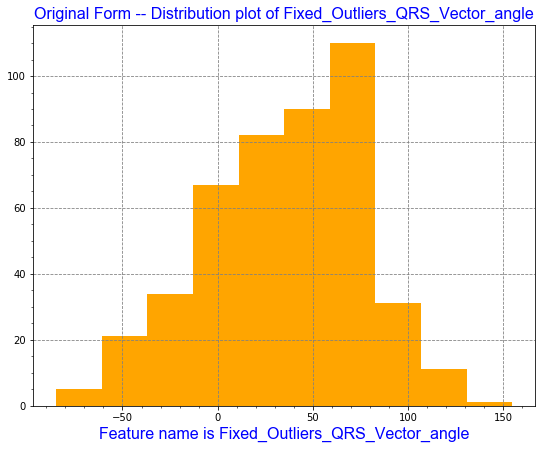

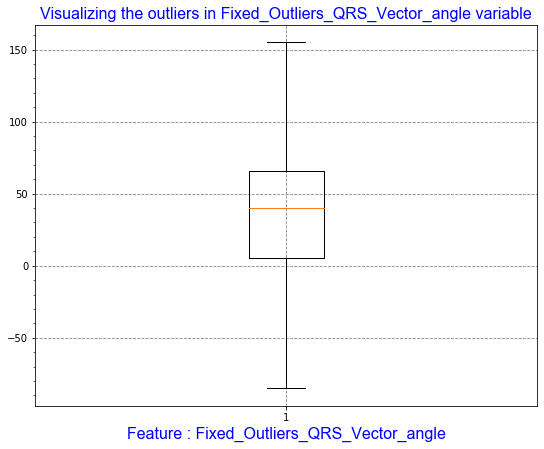



######## Applied Tuky IQR Method-II ########

40.0 5.0 66.0 61.0 -86.5 157.5

Descriptive Statistics of Feature Fixed_Outliers_QRS_Vector_angle in Original Form.
count    452.000000
mean      35.063554
std       41.163118
min      -85.000000
25%        5.000000
50%       40.000000
75%       66.000000
max      155.000000
Name: Fixed_Outliers_QRS_Vector_angle, dtype: float64 



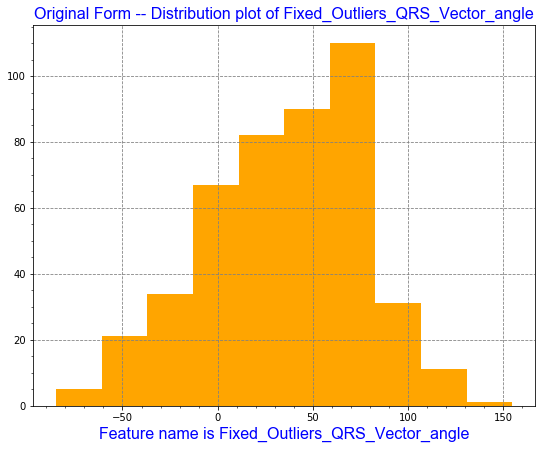

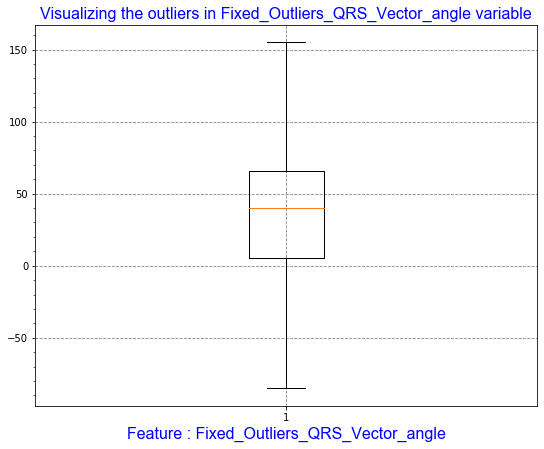



$$$$$$$$ Removed Outliers from QRS_Vector_angle and created its new variable Fixed_Outliers_QRS_Vector_angle $$$$$$$$



In [37]:
for col in ['Age','Height','Weight','QRS_duration','P_R_interval','Q_T_interval','T_interval','P_interval','QRS_Vector_angle']:
    fix_outliers(cad_df,col)

## ***Scaling the first 10 features having no outliers***


Descriptive Statistics of Feature Fixed_Outliers_Age.
count    452.000000
mean      46.774336
std       16.034399
min        3.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: Fixed_Outliers_Age, dtype: float64 



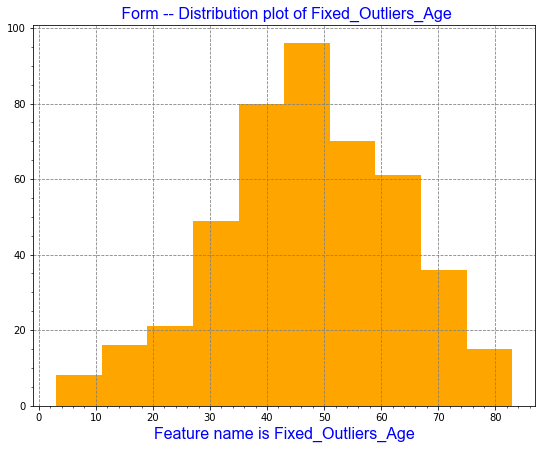

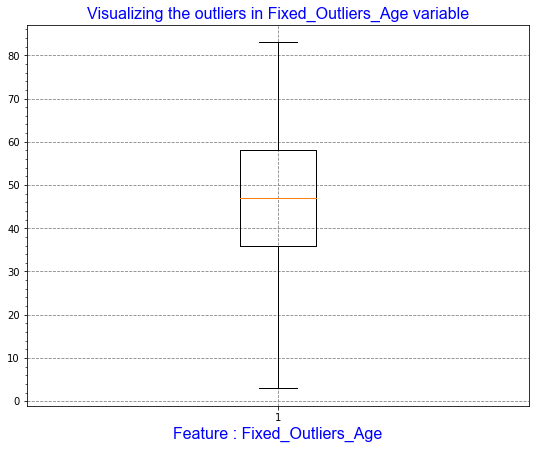



Descriptive Statistics of Feature Fixed_Outliers_Age_Scaled.
count    452.000000
mean       0.547179
std        0.200430
min        0.000000
25%        0.412500
50%        0.550000
75%        0.687500
max        1.000000
Name: Fixed_Outliers_Age_Scaled, dtype: float64 



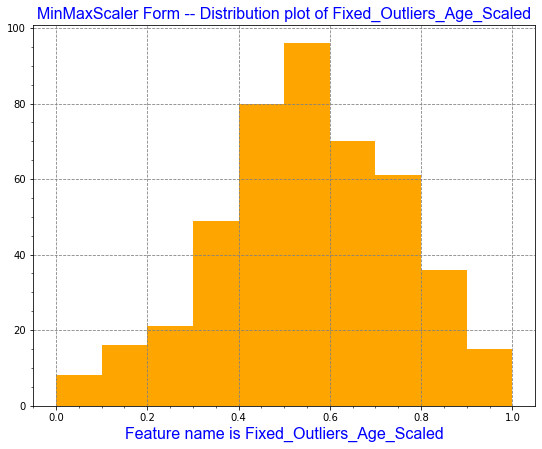

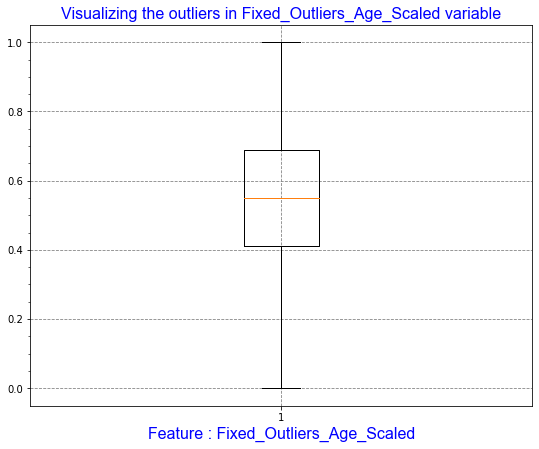



##### Scaled variable Fixed_Outliers_Age_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_Height.
count    452.000000
mean     164.569946
std        7.808713
min      146.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      185.000000
Name: Fixed_Outliers_Height, dtype: float64 



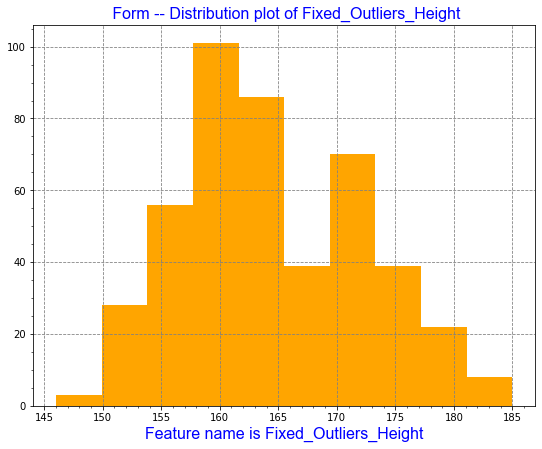

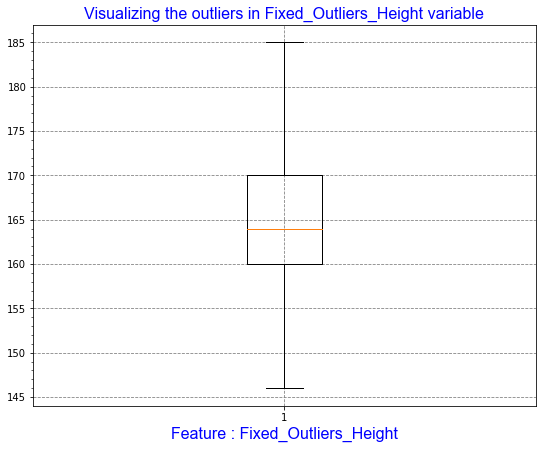



Descriptive Statistics of Feature Fixed_Outliers_Height_Scaled.
count    452.000000
mean       0.476152
std        0.200223
min        0.000000
25%        0.358974
50%        0.461538
75%        0.615385
max        1.000000
Name: Fixed_Outliers_Height_Scaled, dtype: float64 



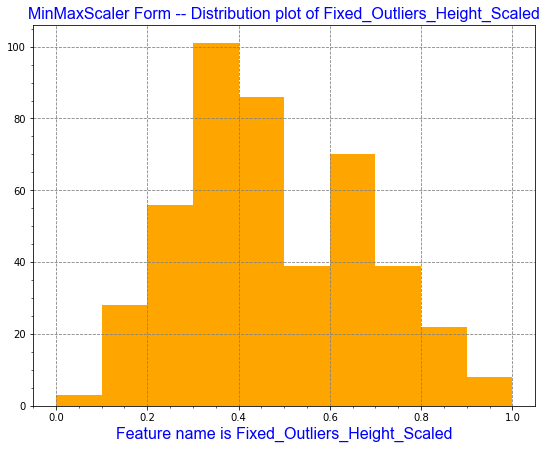

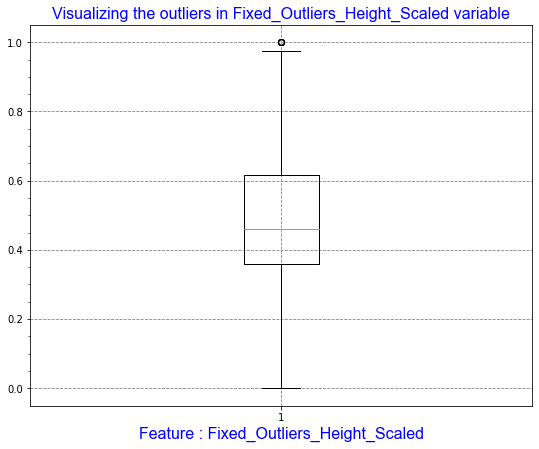



##### Scaled variable Fixed_Outliers_Height_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_Weight.
count    452.000000
mean      68.916313
std       13.278203
min       32.075900
25%       60.000000
50%       68.000000
75%       78.616066
max      106.000000
Name: Fixed_Outliers_Weight, dtype: float64 



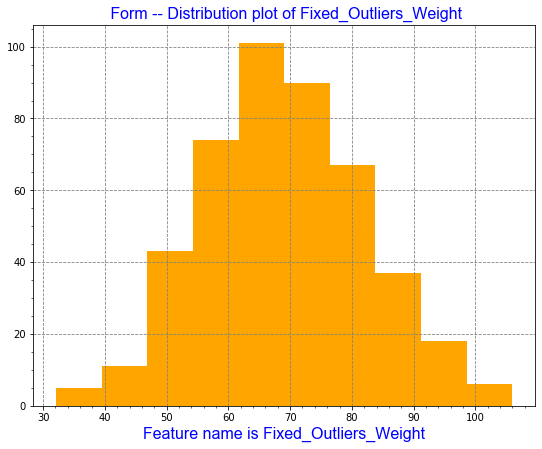

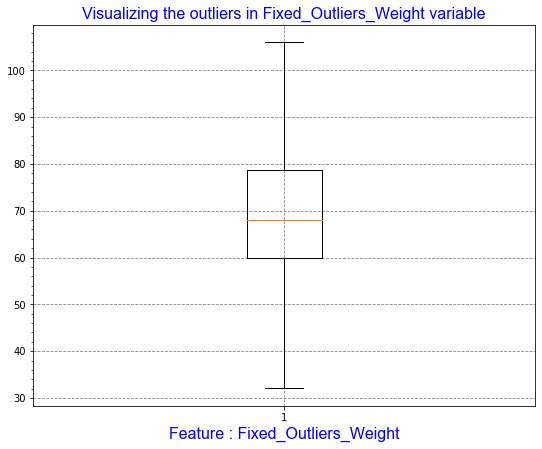



Descriptive Statistics of Feature Fixed_Outliers_Weight_Scaled.
count    452.000000
mean       0.498355
std        0.179619
min        0.000000
25%        0.377740
50%        0.485959
75%        0.629567
max        1.000000
Name: Fixed_Outliers_Weight_Scaled, dtype: float64 



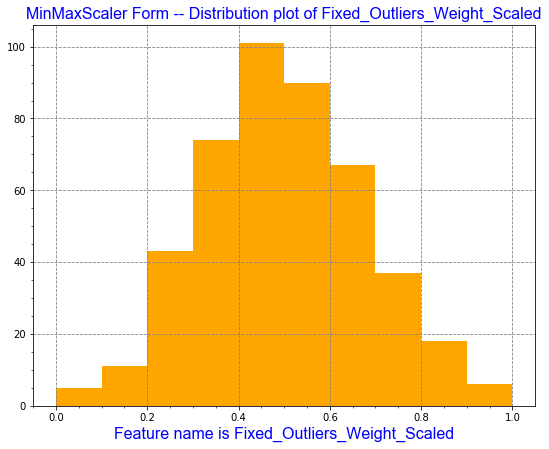

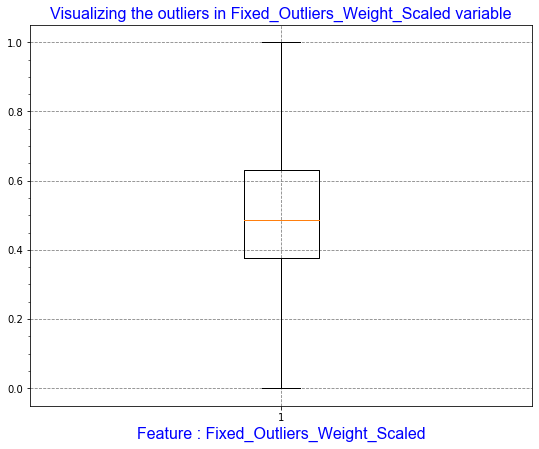



##### Scaled variable Fixed_Outliers_Weight_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_QRS_duration.
count    452.000000
mean      87.135303
std        9.794724
min       61.000000
25%       80.000000
50%       86.000000
75%       94.000000
max      114.000000
Name: Fixed_Outliers_QRS_duration, dtype: float64 



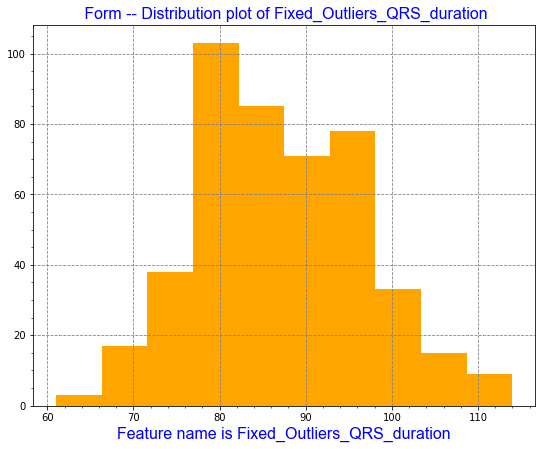

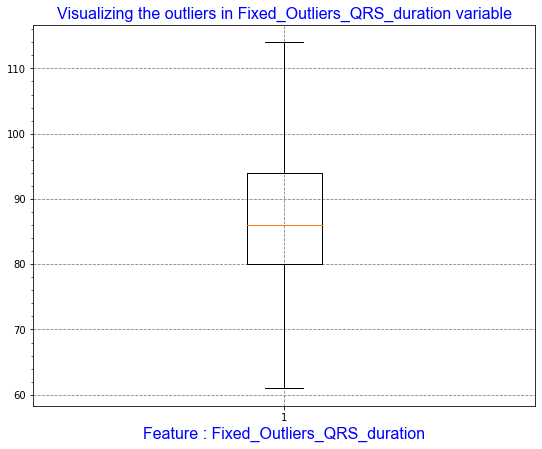



Descriptive Statistics of Feature Fixed_Outliers_QRS_duration_Scaled.
count    452.000000
mean       0.493119
std        0.184806
min        0.000000
25%        0.358491
50%        0.471698
75%        0.622642
max        1.000000
Name: Fixed_Outliers_QRS_duration_Scaled, dtype: float64 



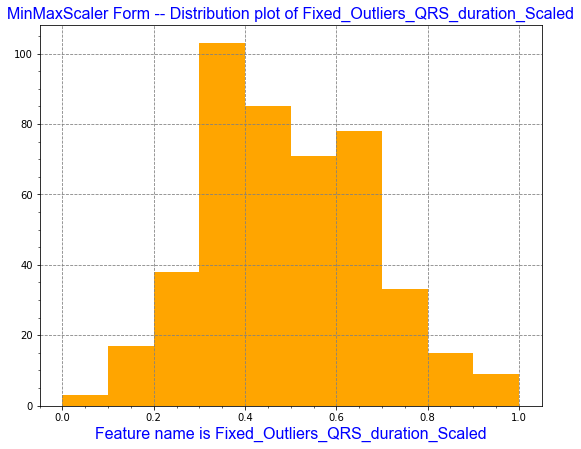

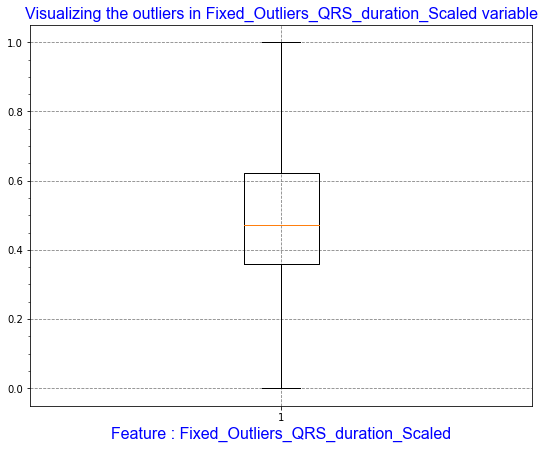



##### Scaled variable Fixed_Outliers_QRS_duration_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_P_R_interval.
count    452.000000
mean     158.880948
std       21.926509
min      103.000000
25%      145.000000
50%      157.000000
75%      174.000000
max      217.500000
Name: Fixed_Outliers_P_R_interval, dtype: float64 



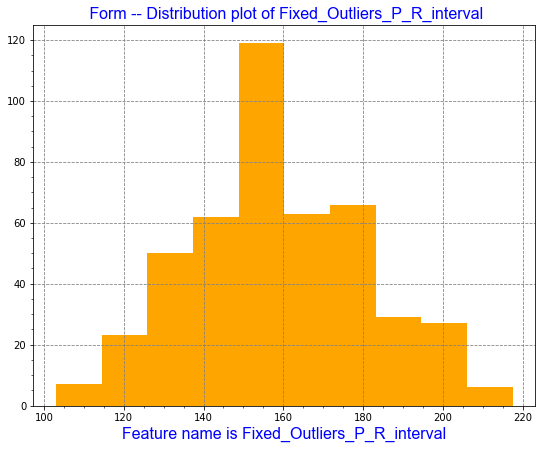

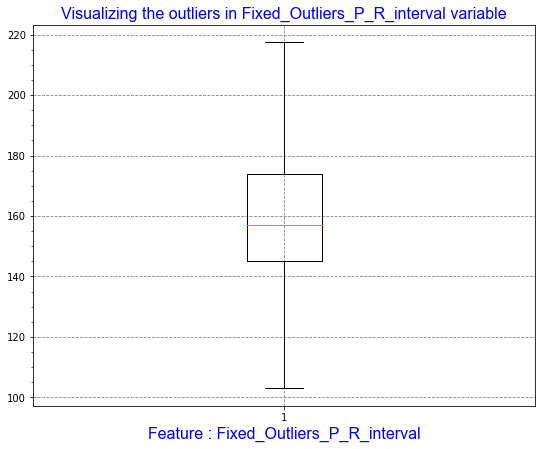



Descriptive Statistics of Feature Fixed_Outliers_P_R_interval_Scaled.
count    452.000000
mean       0.488043
std        0.191498
min        0.000000
25%        0.366812
50%        0.471616
75%        0.620087
max        1.000000
Name: Fixed_Outliers_P_R_interval_Scaled, dtype: float64 



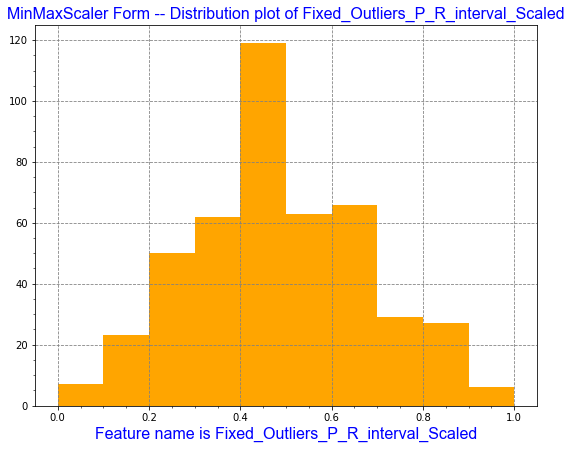

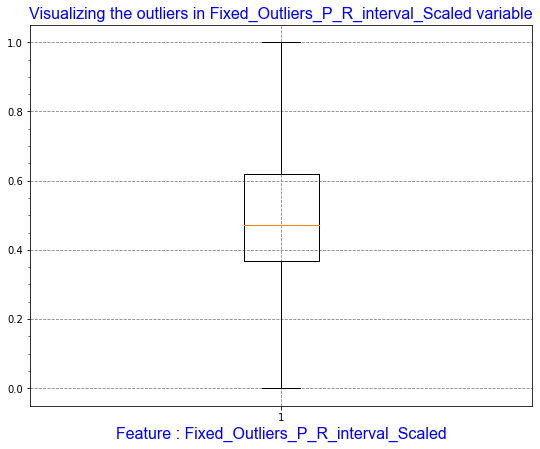



##### Scaled variable Fixed_Outliers_P_R_interval_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_Q_T_interval.
count    452.000000
mean     367.990581
std       25.092211
min      301.461013
25%      350.984405
50%      367.000000
75%      384.000000
max      433.523392
Name: Fixed_Outliers_Q_T_interval, dtype: float64 



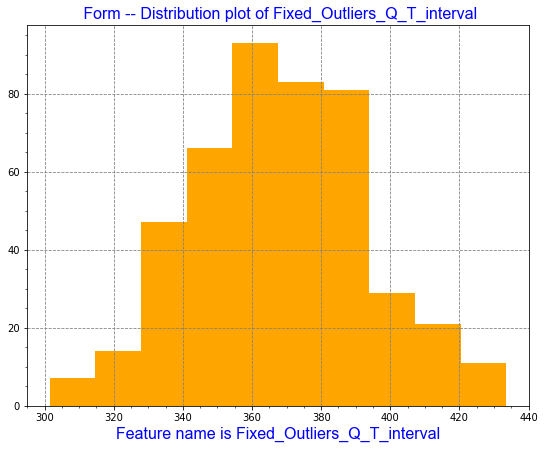

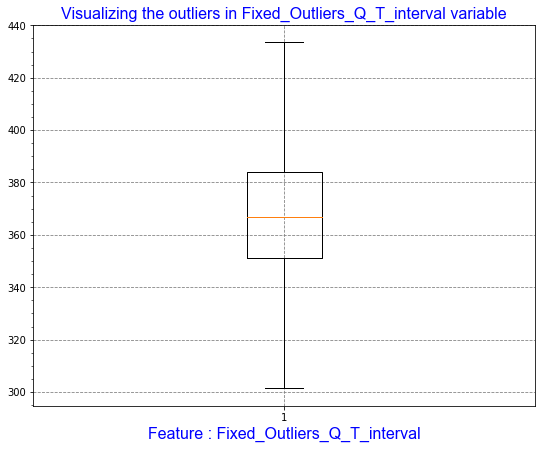



Descriptive Statistics of Feature Fixed_Outliers_Q_T_interval_Scaled.
count    452.000000
mean       0.503774
std        0.190003
min        0.000000
25%        0.375000
50%        0.496273
75%        0.625000
max        1.000000
Name: Fixed_Outliers_Q_T_interval_Scaled, dtype: float64 



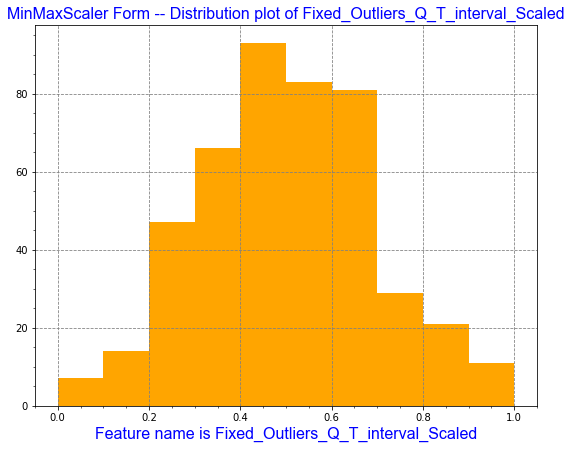

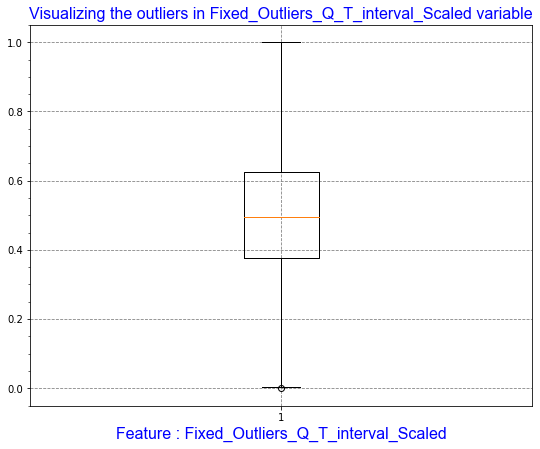



##### Scaled variable Fixed_Outliers_Q_T_interval_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_T_interval.
count    452.000000
mean     163.067871
std       22.100445
min      108.000000
25%      148.000000
50%      162.000000
75%      177.329710
max      221.324274
Name: Fixed_Outliers_T_interval, dtype: float64 



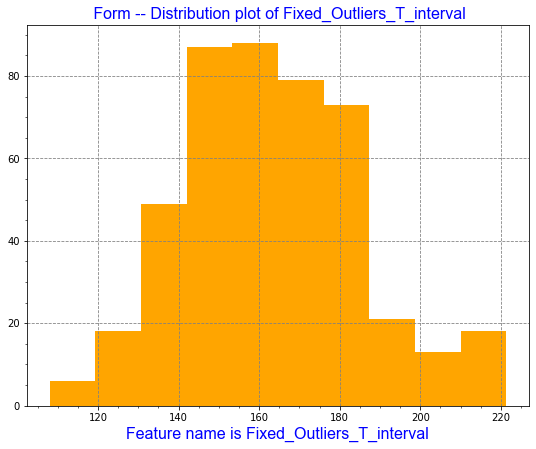

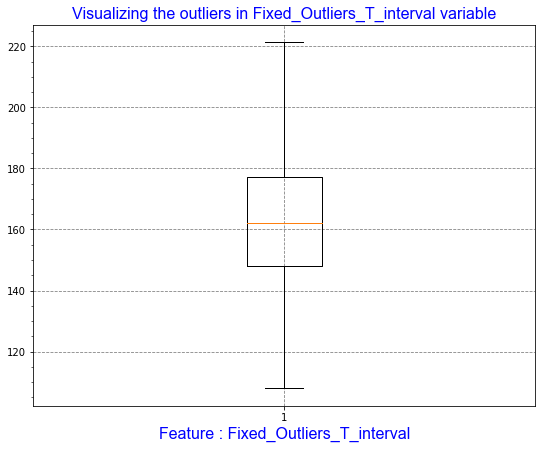



Descriptive Statistics of Feature Fixed_Outliers_T_interval_Scaled.
count    452.000000
mean       0.485932
std        0.195020
min        0.000000
25%        0.352969
50%        0.476509
75%        0.611782
max        1.000000
Name: Fixed_Outliers_T_interval_Scaled, dtype: float64 



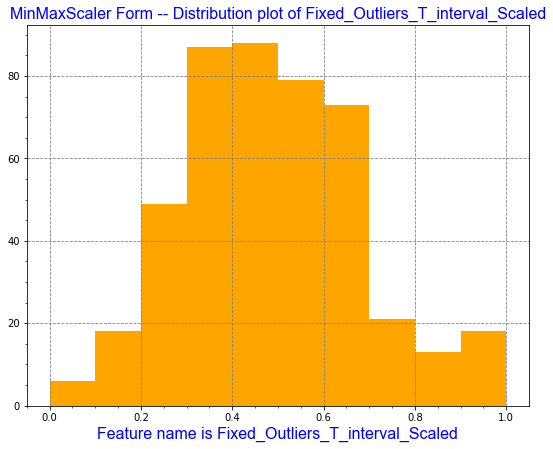

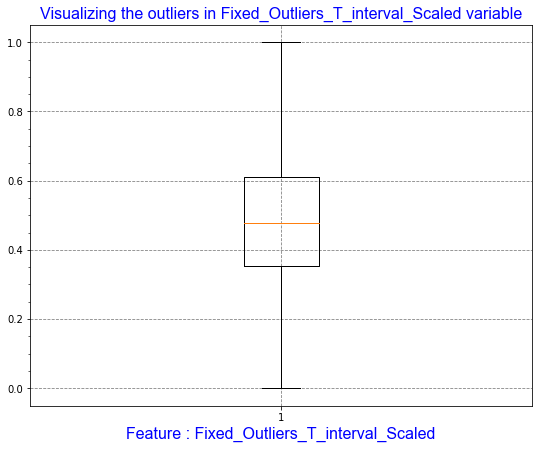



##### Scaled variable Fixed_Outliers_T_interval_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_P_interval.
count    452.000000
mean      90.657890
std       15.463002
min       51.000000
25%       80.000000
50%       91.000000
75%      102.000000
max      132.000000
Name: Fixed_Outliers_P_interval, dtype: float64 



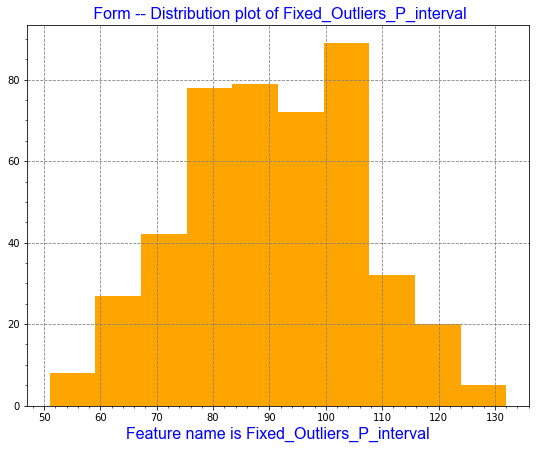

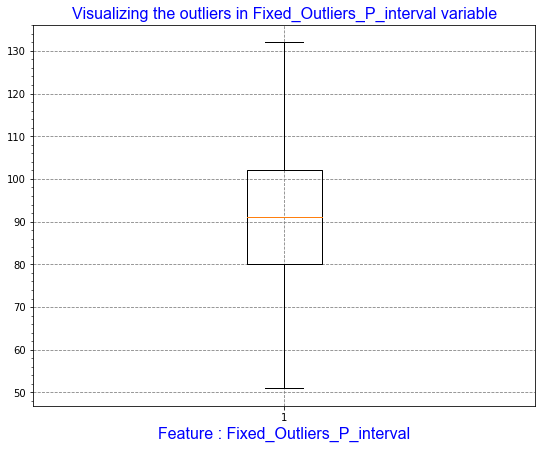



Descriptive Statistics of Feature Fixed_Outliers_P_interval_Scaled.
count    452.000000
mean       0.489604
std        0.190901
min        0.000000
25%        0.358025
50%        0.493827
75%        0.629630
max        1.000000
Name: Fixed_Outliers_P_interval_Scaled, dtype: float64 



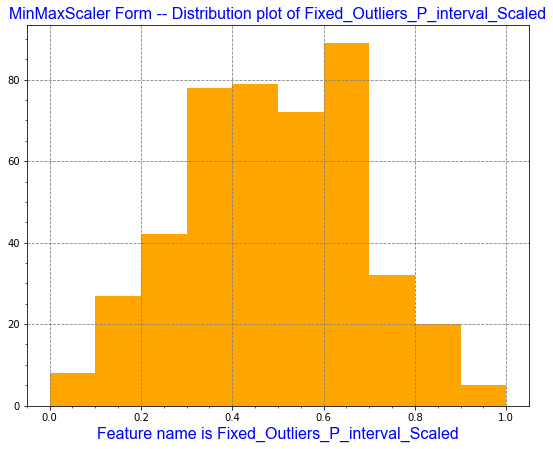

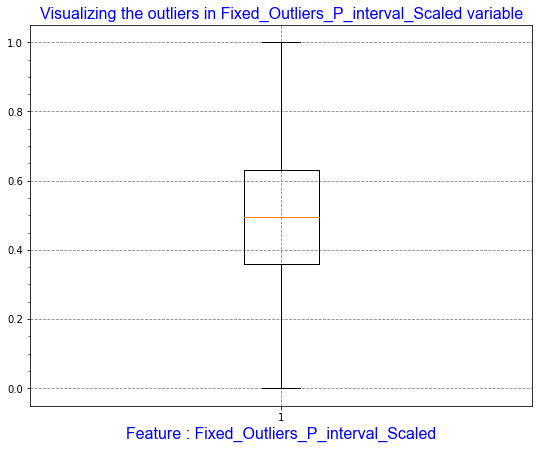



##### Scaled variable Fixed_Outliers_P_interval_Scaled added in the DataFrame #####


Descriptive Statistics of Feature Fixed_Outliers_QRS_Vector_angle.
count    452.000000
mean      35.063554
std       41.163118
min      -85.000000
25%        5.000000
50%       40.000000
75%       66.000000
max      155.000000
Name: Fixed_Outliers_QRS_Vector_angle, dtype: float64 



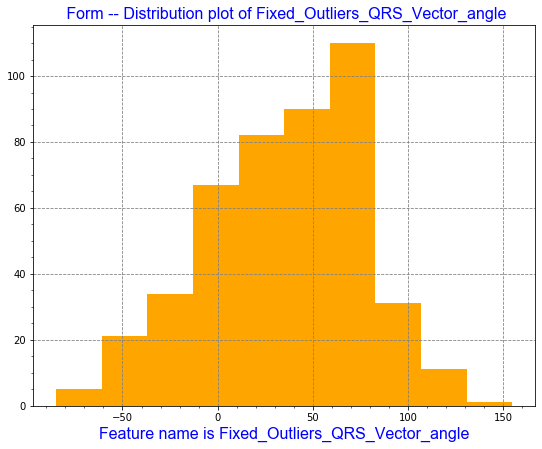

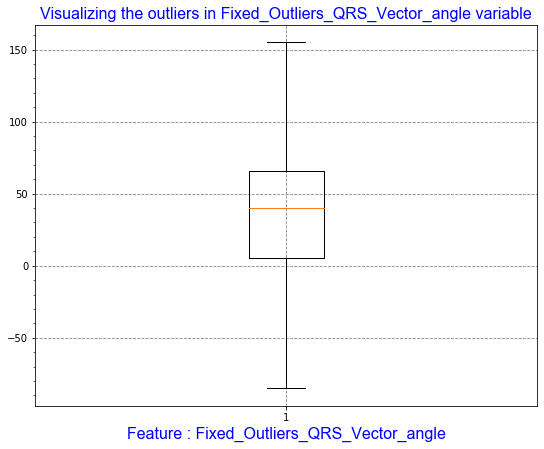



Descriptive Statistics of Feature Fixed_Outliers_QRS_Vector_angle_Scaled.
count    452.000000
mean       0.500265
std        0.171513
min        0.000000
25%        0.375000
50%        0.520833
75%        0.629167
max        1.000000
Name: Fixed_Outliers_QRS_Vector_angle_Scaled, dtype: float64 



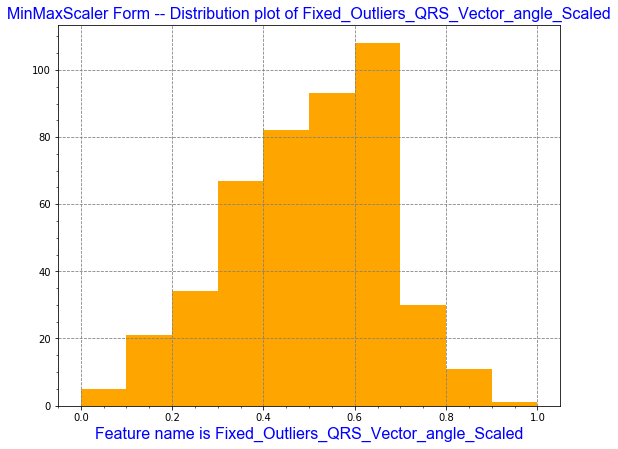

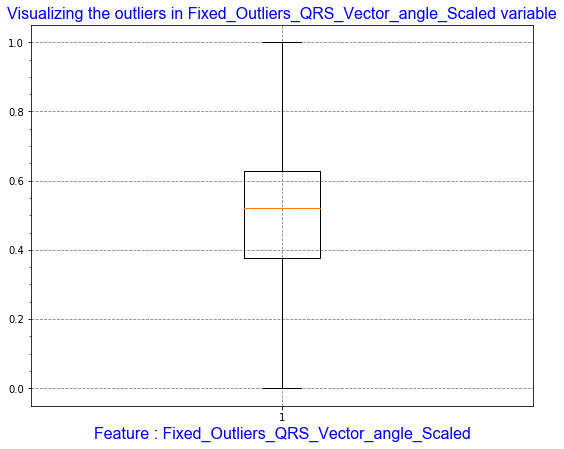



##### Scaled variable Fixed_Outliers_QRS_Vector_angle_Scaled added in the DataFrame #####



In [38]:
for col in ['Fixed_Outliers_Age','Fixed_Outliers_Height','Fixed_Outliers_Weight','Fixed_Outliers_QRS_duration','Fixed_Outliers_P_R_interval','Fixed_Outliers_Q_T_interval','Fixed_Outliers_T_interval','Fixed_Outliers_P_interval','Fixed_Outliers_QRS_Vector_angle']:
    feature_scale_desc_stats(cad_df,col,scale_col=True,scaler_to_use='mms')

## ***Applying OneHotEncoder on Gender Variable***

In [39]:
ohe = ce.OneHotEncoder(cols='Gender')

In [40]:
cad_df = ohe.fit_transform(cad_df)

In [41]:
cad_df.head()

Age  Gender_1  Gender_2  Height  Weight  QRS_duration  P_R_interval  \
0   75         1         0     190      80            91           193   
1   56         0         1     165      64            81           174   
2   54         1         0     172      95           138           163   
3   55         1         0     175      94           100           202   
4   75         1         0     190      80            88           181   

   Q_T_interval  T_interval  P_interval  QRS_Vector_angle T_Vector_angle  \
0           371         174         121               -16             13   
1           401         149          39                25             37   
2           386         185         102                96             34   
3           380         179         143                28             11   
4           360         177         103               -16             13   

  P_Vector_angle QRST_Vector_angle J_Vector_angle Heart_rate  DI_Q_wave_width  \
0             64                -2            NaN         63                0   
1            -17                31            NaN         53                0   
2             70                66             23         75                0   
3             -5                20            NaN         71                0   
4             61                 3            NaN        NaN                0   

   DI_R_wave_width  DI_S_wave_width  DI_R1_wave_width  DI_S1_wave_width  \
0               52               44                 0                 0   
1               48                0                 0                 0   
2               40               80                 0                 0   
3               72               20                 0                 0   
4               48               40                 0                 0   

   DI_Intrinsic_deflections  DI_Ragged_R_wave  DI_R_wave_diphasic_derivation  \
0                        32                 0                              0   
1                        24                 0                              0   
2                        24                 0                              0   
3                        48                 0                              0   
4                        28                 0                              0   

   DI_Ragged_P_wave  DI_P_Wave_diphasic_derivation  DI_Ragged_T_wave  \
0                 0                              0                 0   
1                 0                              0                 0   
2                 0                              0                 0   
3                 0                              0                 0   
4                 0                              0                 0   

   DI_T_wave_diphasic_derivation  DII_Q_wave_width  DII_R_wave_width  \
0                              0                 0                44   
1                              0                 0                64   
2                              0                20                56   
3                              0                 0                64   
4                              0                 0                40   

   DII_S_wave_width  DII_R1_wave_width  DII_S1_wave_width  \
0                20                 36                  0   
1                 0                  0                  0   
2                52                  0                  0   
3                36                  0                  0   
4                24                  0                  0   

   DII_Intrinsic_deflections  DII_Ragged_R_wave  \
0                         28                  0   
1                         24                  0   
2                         40                  0   
3                         36                  0   
4                         24                  0   

   DII_R_wave_diphasic_derivation  DII_Ragged_P_wave  \
0                               0                  0   
1                             

## ***Fill Missing Values***

In [73]:
missing_df = pd.DataFrame(cad_df.isna().sum())
missing_df.columns = ['Missing_val_count']
missing_df = missing_df[missing_df['Missing_val_count'] != 0]

In [74]:
missing_df

Missing_val_count
T_Vector_angle                     8
P_Vector_angle                    22
QRST_Vector_angle                  1
J_Vector_angle                   376
Heart_rate                         1

## ***Filling Missing Values using Mean/Median Target Encoding***

In [294]:
def fill_missing_val_tgt_encoding(df,col_with_missing_vals,tgt_label,scale_col=False,use_scaler=False):
    """
    Description: This function is created for performing the Target Level Mean/Median Missing values filling.
    
    Input Parameters: It accepts 5 input parameters:
        1. df: DataFrame
        2. col_with_missing_vals: Feature or column of the dataframe having missing values
        3. tgt_label: Target Label column in the dataframe
        4. scale_col: Flag for performing the scaling on the column
        5. scaler: Scaler to be used for scaling
        
    Return/Output: It adds a new feature in the dataframe with no missing values. It also displays the distribution and boxplot. And, scaled the feature as well. 
    """
    fill_missing = df[~df[col_with_missing_vals].isna()][[col_with_missing_vals,tgt_label]]
    fill_missing.sort_values([tgt_label],ascending=True,inplace=True)
    fill_missing[col_with_missing_vals] = fill_missing[col_with_missing_vals].astype(int)
    dict_vals = pd.DataFrame(fill_missing.groupby([tgt_label]).mean()).to_dict()
    dict_vals = dict_vals[col_with_missing_vals]
    mean_of_means = pd.Series([val for val in dict_vals.values()]).mean()
    fix_col_name = col_with_missing_vals+'_Filled_Missing_Vals'
    df[fix_col_name] = df[[tgt_label,col_with_missing_vals]].apply(lambda val: np.sqrt(np.sqrt(np.square(dict_vals[val[tgt_label]]))) if val[tgt_label] in dict_vals.keys() else np.sqrt(np.sqrt(np.square(mean_of_means))),axis=1)
    box_plot(df,fix_col_name)
    fix_outliers(df,fix_col_name)
    if scale_col == True:
        fixed_outlier_col_name = 'Fixed_Outliers_'+fix_col_name
        feature_scale_desc_stats(df,fixed_outlier_col_name,scale_col=scale_col,scaler_to_use=scaler)
    else:
        None

### ***T_Vector_angle Missing Values***

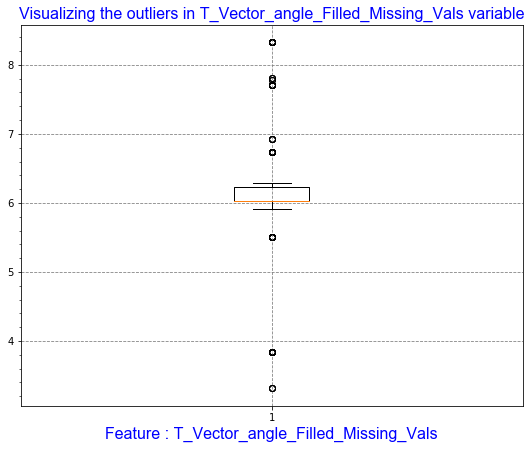




Descriptive Statistics of Feature T_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.009619
std        0.936270
min        3.316625
25%        6.034396
50%        6.034396
75%        6.233550
max        8.326664
Name: T_Vector_angle_Filled_Missing_Vals, dtype: float64 



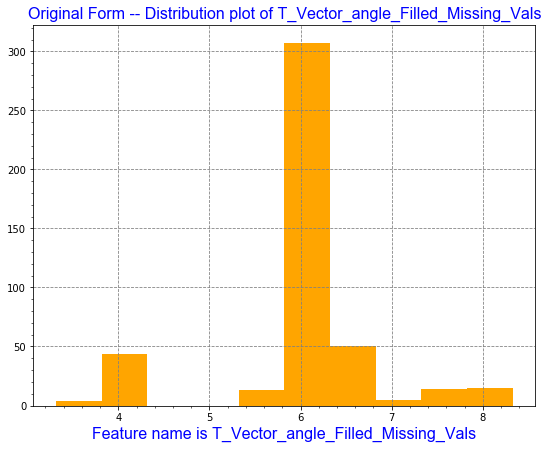

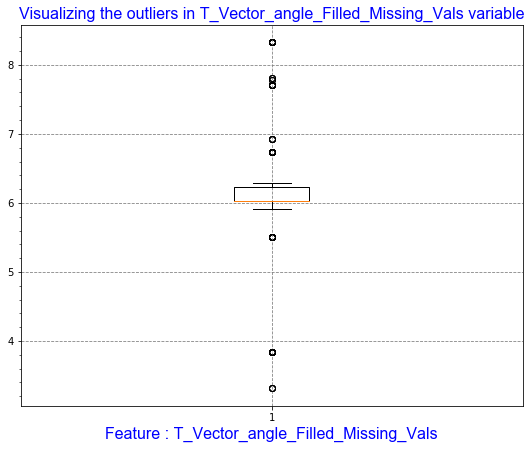



######## Applied Tuky IQR Method-I ########

6.03439594543062 6.03439594543062 6.233549779791836 0.19915383436121648 5.735665193888796 6.532280531333662

Descriptive Statistics of Feature Fixed_Outliers_T_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.270121
std        1.361257
min        3.688071
25%        6.034396
50%        6.034396
75%        6.233550
max        8.919992
Name: Fixed_Outliers_T_Vector_angle_Filled_Missing_Vals, dtype: float64 



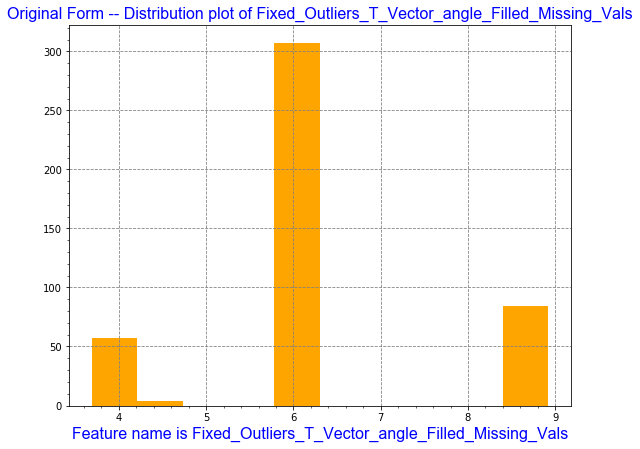

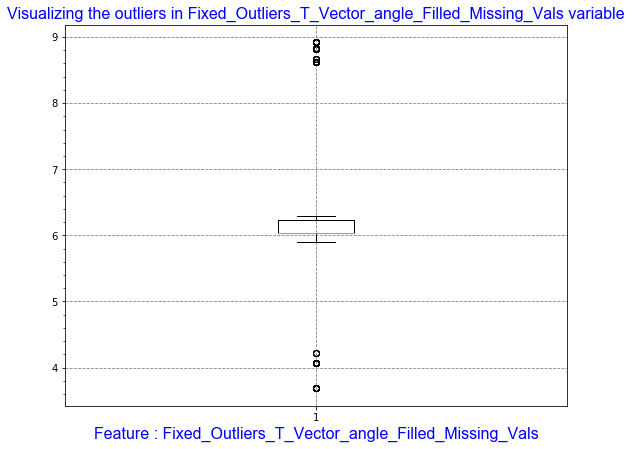



######## Applied Tuky IQR Method-II ########

6.03439594543062 6.03439594543062 6.233549779791836 0.19915383436121648 5.735665193888796 6.532280531333662

Descriptive Statistics of Feature Fixed_Outliers_T_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.098581
std        0.244022
min        5.735665
25%        6.034396
50%        6.034396
75%        6.233550
max        6.532281
Name: Fixed_Outliers_T_Vector_angle_Filled_Missing_Vals, dtype: float64 



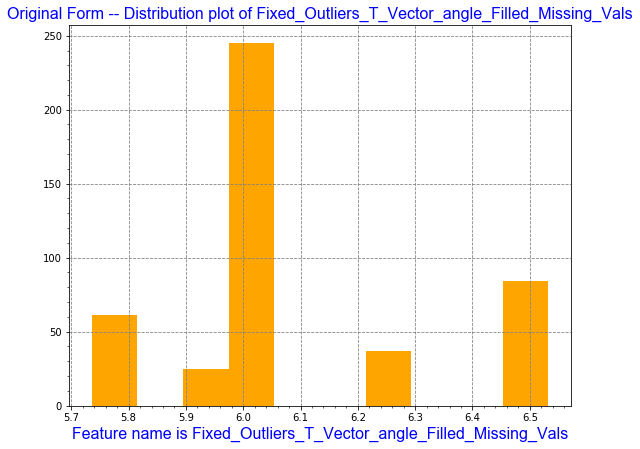

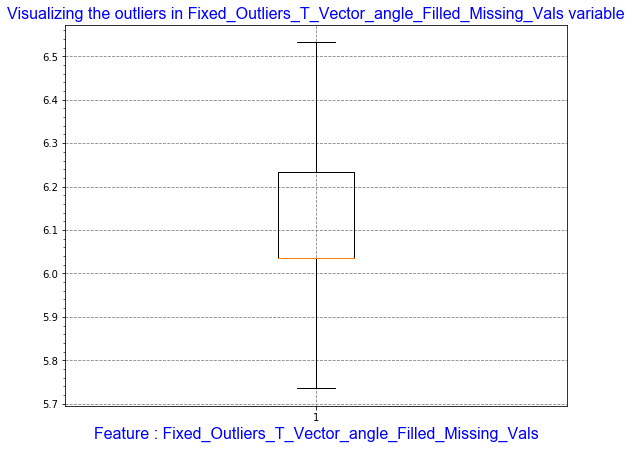



$$$$$$$$ Removed Outliers from T_Vector_angle_Filled_Missing_Vals and created its new variable Fixed_Outliers_T_Vector_angle_Filled_Missing_Vals $$$$$$$$



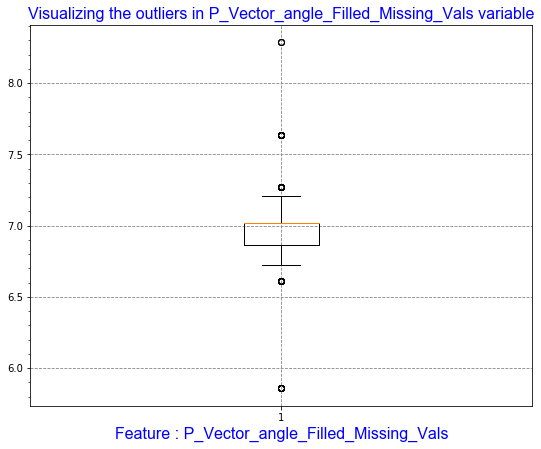




Descriptive Statistics of Feature P_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.984802
std        0.287759
min        5.859465
25%        6.866866
50%        7.021485
75%        7.021485
max        8.286535
Name: P_Vector_angle_Filled_Missing_Vals, dtype: float64 



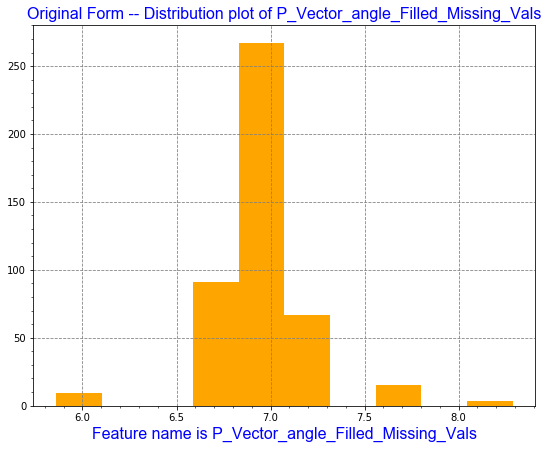

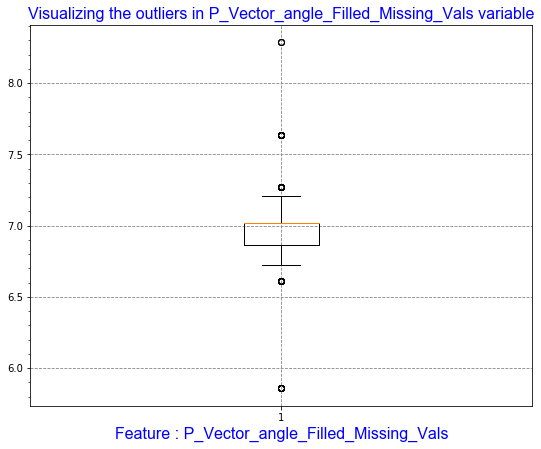



######## Applied Tuky IQR Method-I ########

7.0214852581291884 6.866865817375941 7.0214852581291884 0.15461944075324752 6.63493665624607 7.25341441925906

Descriptive Statistics of Feature Fixed_Outliers_P_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       7.102045
std        1.371664
min        4.449911
25%        6.866866
50%        7.021485
75%        7.021485
max        9.900120
Name: Fixed_Outliers_P_Vector_angle_Filled_Missing_Vals, dtype: float64 



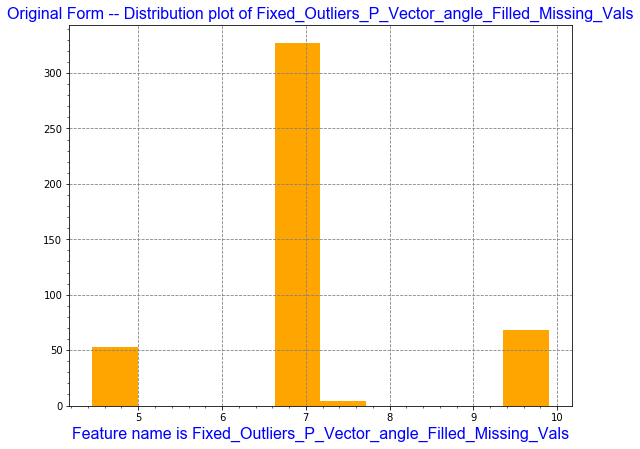

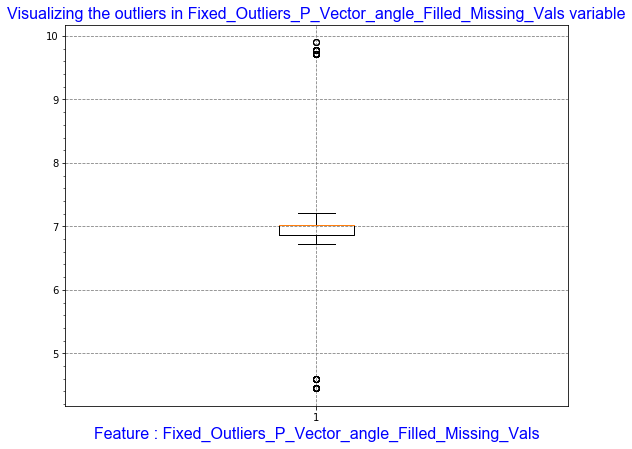



######## Applied Tuky IQR Method-II ########

7.0214852581291884 6.866865817375941 7.0214852581291884 0.15461944075324752 6.63493665624607 7.25341441925906

Descriptive Statistics of Feature Fixed_Outliers_P_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.981086
std        0.186863
min        6.634937
25%        6.866866
50%        7.021485
75%        7.021485
max        7.253414
Name: Fixed_Outliers_P_Vector_angle_Filled_Missing_Vals, dtype: float64 



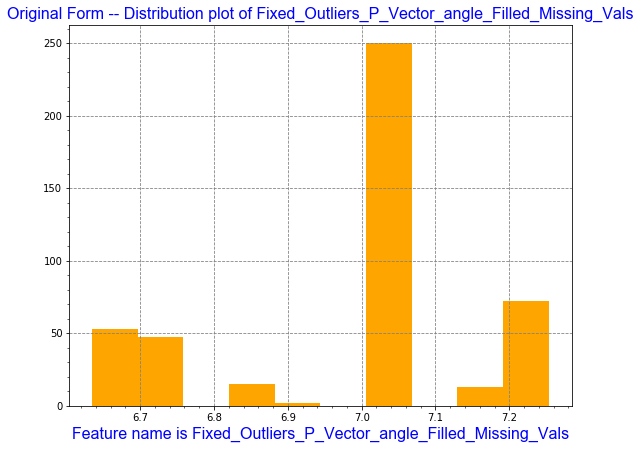

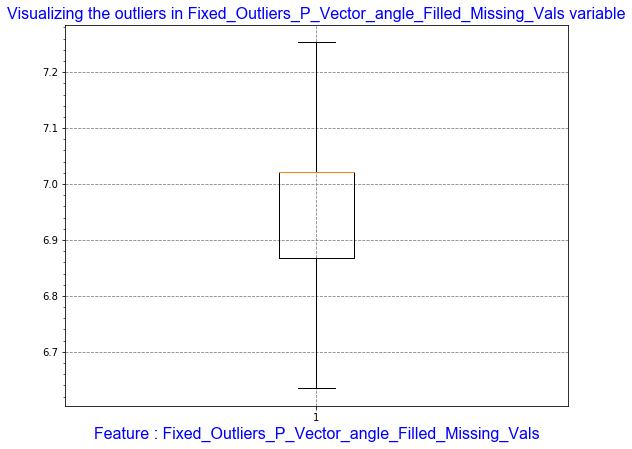



$$$$$$$$ Removed Outliers from P_Vector_angle_Filled_Missing_Vals and created its new variable Fixed_Outliers_P_Vector_angle_Filled_Missing_Vals $$$$$$$$



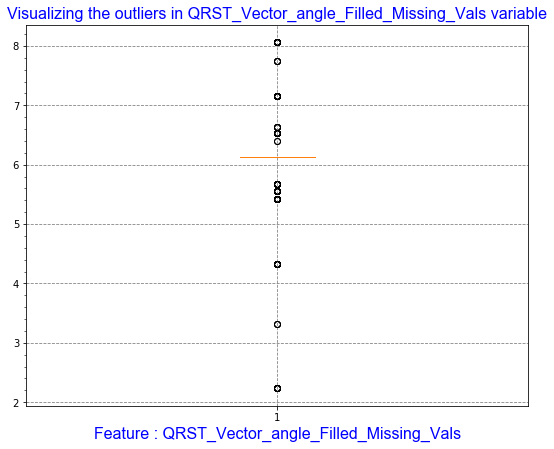




Descriptive Statistics of Feature QRST_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.029218
std        0.855018
min        2.236068
25%        6.129410
50%        6.129410
75%        6.129410
max        8.062258
Name: QRST_Vector_angle_Filled_Missing_Vals, dtype: float64 



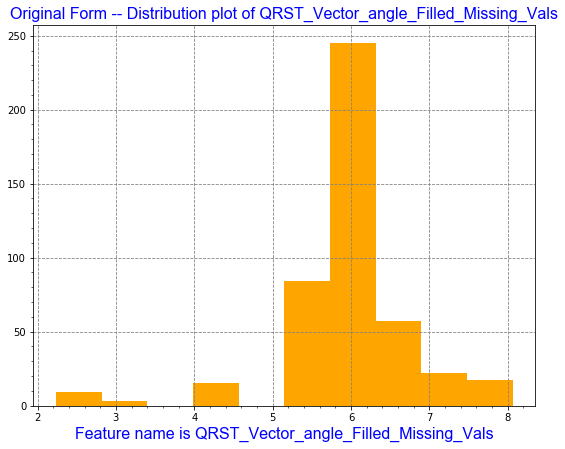

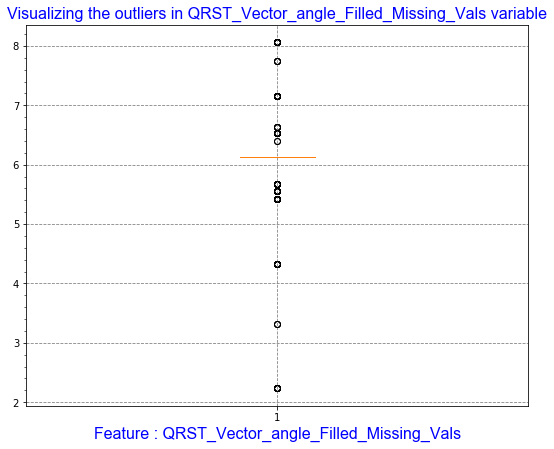



######## Applied Tuky IQR Method-I ########

6.12941042280149 6.12941042280149 6.12941042280149 0.0 6.12941042280149 6.12941042280149

Descriptive Statistics of Feature Fixed_Outliers_QRST_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       6.141551
std        1.647032
min        3.748523
25%        6.129410
50%        6.129410
75%        6.129410
max        8.968822
Name: Fixed_Outliers_QRST_Vector_angle_Filled_Missing_Vals, dtype: float64 



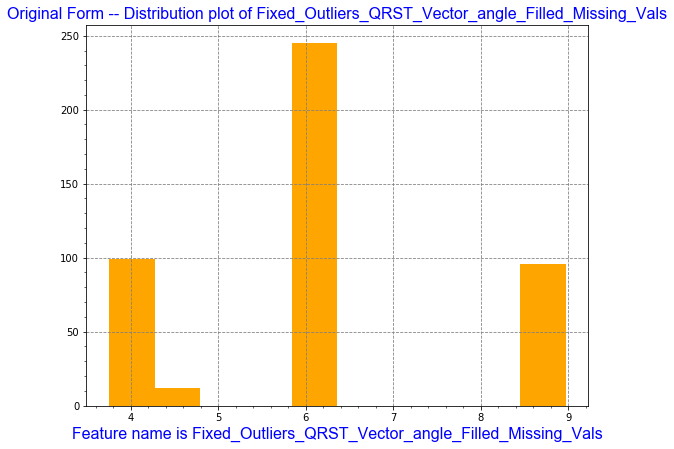

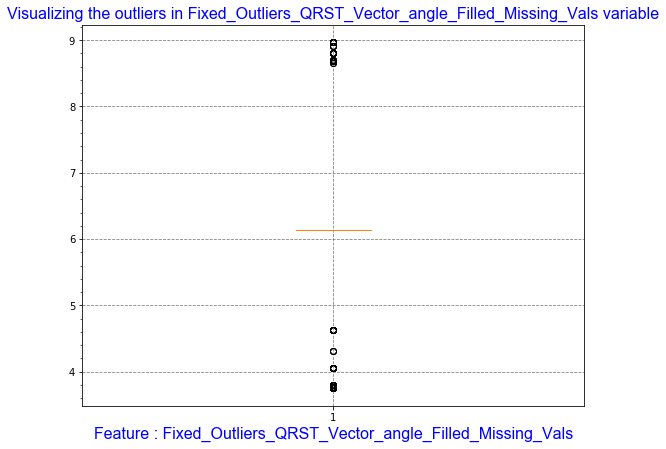



######## Applied Tuky IQR Method-II ########

6.12941042280149 6.12941042280149 6.12941042280149 0.0 6.12941042280149 6.12941042280149

Descriptive Statistics of Feature Fixed_Outliers_QRST_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.00000
mean       6.12941
std        0.00000
min        6.12941
25%        6.12941
50%        6.12941
75%        6.12941
max        6.12941
Name: Fixed_Outliers_QRST_Vector_angle_Filled_Missing_Vals, dtype: float64 



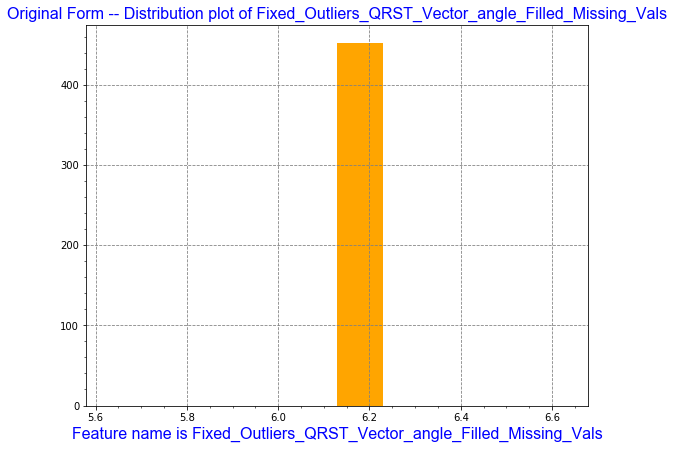

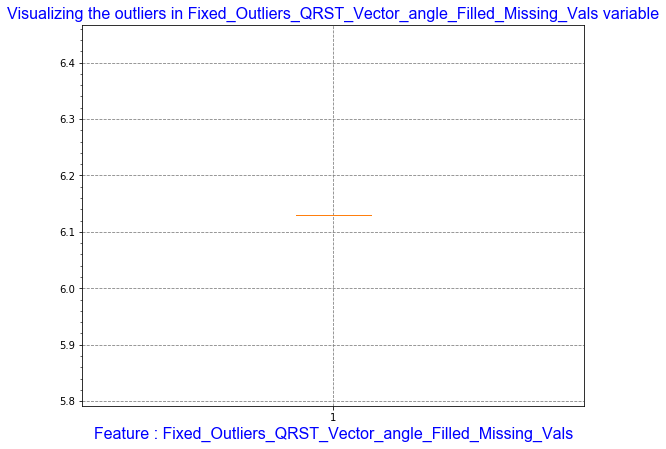



$$$$$$$$ Removed Outliers from QRST_Vector_angle_Filled_Missing_Vals and created its new variable Fixed_Outliers_QRST_Vector_angle_Filled_Missing_Vals $$$$$$$$



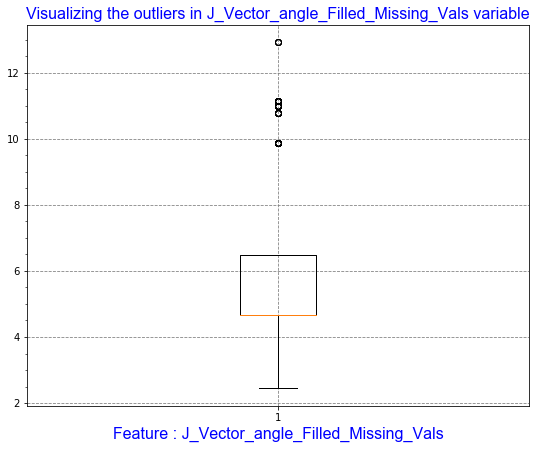




Descriptive Statistics of Feature J_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       5.821789
std        2.676464
min        2.449490
25%        4.675857
50%        4.675857
75%        6.484800
max       12.922848
Name: J_Vector_angle_Filled_Missing_Vals, dtype: float64 



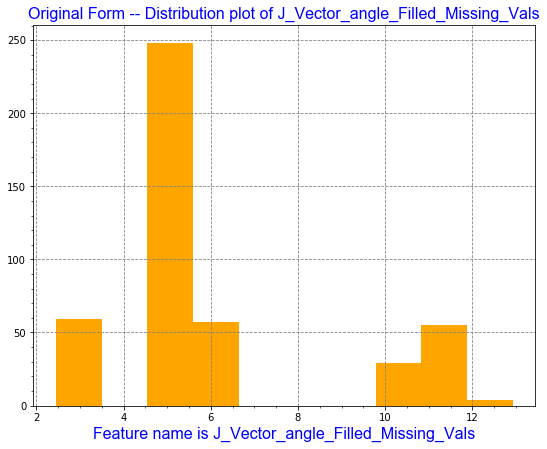

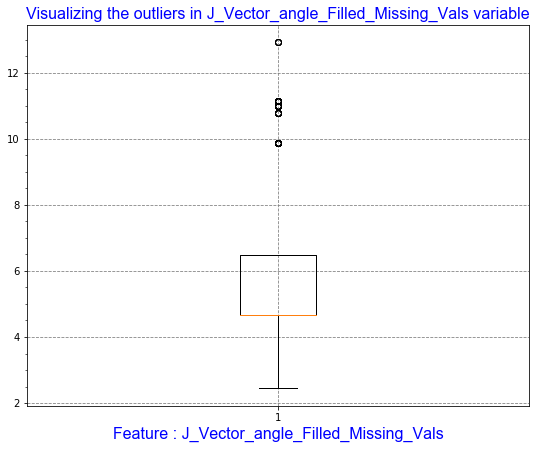



######## Applied Tuky IQR Method-I ########

4.675856751830231 4.675856751830231 6.484800041554664 1.8089432897244322 1.9624418172435831 9.198214976141312

Descriptive Statistics of Feature Fixed_Outliers_J_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       5.262362
std        1.656869
min        2.449490
25%        4.675857
50%        4.675857
75%        6.484800
max        8.270693
Name: Fixed_Outliers_J_Vector_angle_Filled_Missing_Vals, dtype: float64 



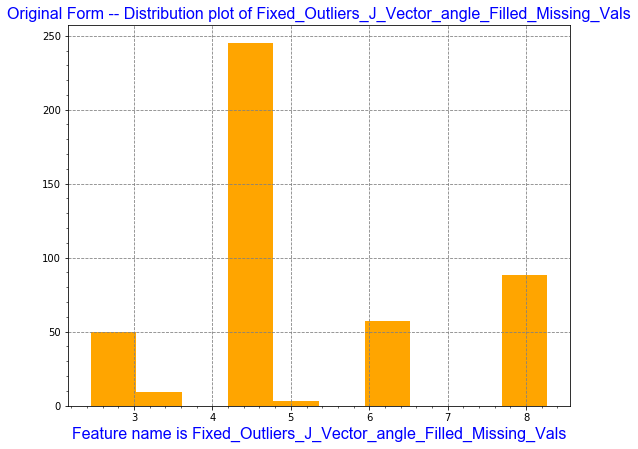

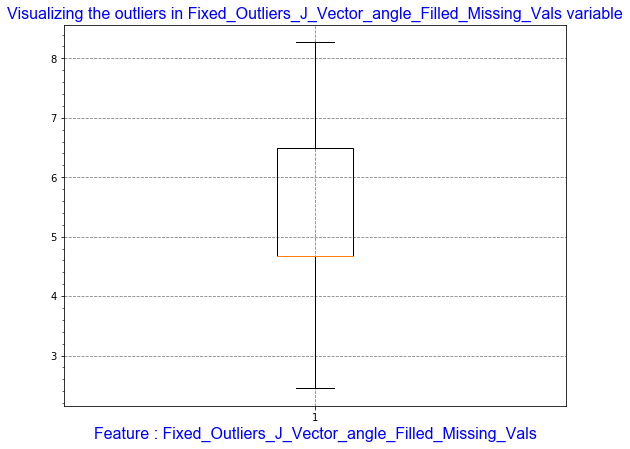



######## Applied Tuky IQR Method-II ########

4.675856751830231 4.675856751830231 6.484800041554664 1.8089432897244322 1.9624418172435831 9.198214976141312

Descriptive Statistics of Feature Fixed_Outliers_J_Vector_angle_Filled_Missing_Vals in Original Form.
count    452.000000
mean       5.262362
std        1.656869
min        2.449490
25%        4.675857
50%        4.675857
75%        6.484800
max        8.270693
Name: Fixed_Outliers_J_Vector_angle_Filled_Missing_Vals, dtype: float64 



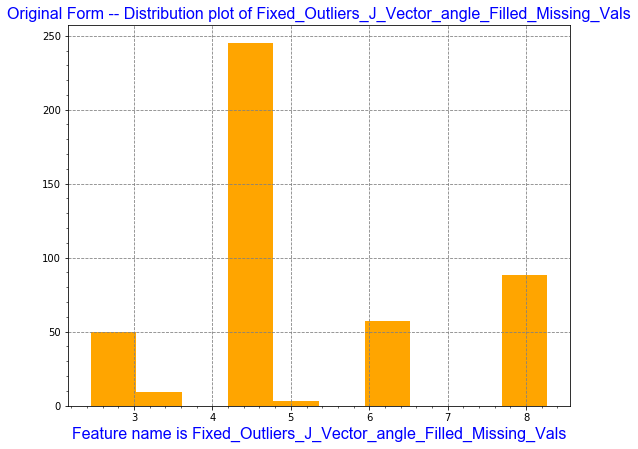

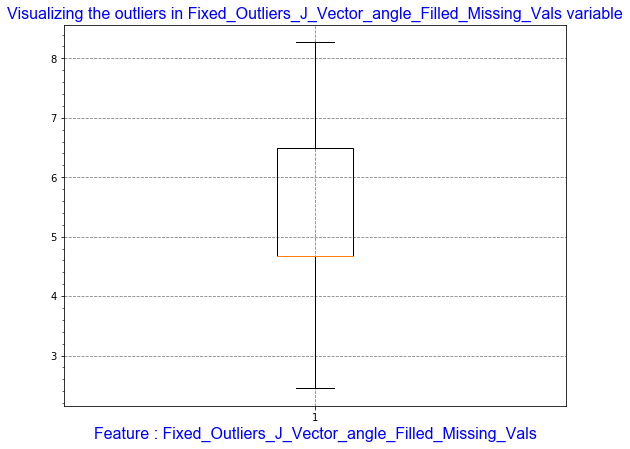



$$$$$$$$ Removed Outliers from J_Vector_angle_Filled_Missing_Vals and created its new variable Fixed_Outliers_J_Vector_angle_Filled_Missing_Vals $$$$$$$$



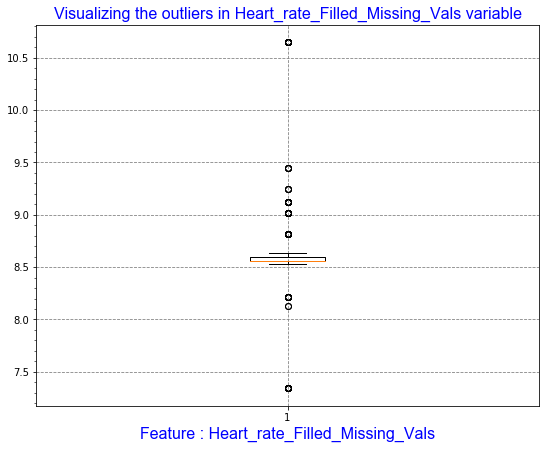




Descriptive Statistics of Feature Heart_rate_Filled_Missing_Vals in Original Form.
count    452.000000
mean       8.615067
std        0.494633
min        7.343024
25%        8.555700
50%        8.555700
75%        8.594396
max       10.648221
Name: Heart_rate_Filled_Missing_Vals, dtype: float64 



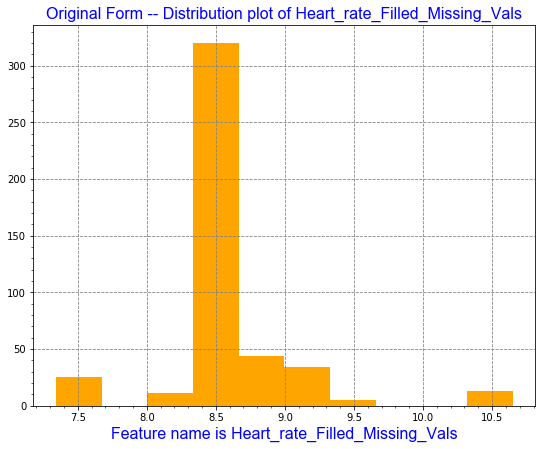

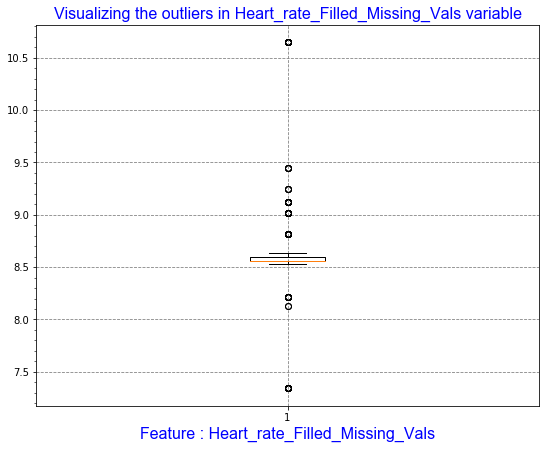



######## Applied Tuky IQR Method-I ########

8.555699854482976 8.555699854482976 8.594395636904107 0.03869578242113114 8.49765618085128 8.652439310535804

Descriptive Statistics of Feature Fixed_Outliers_Heart_rate_Filled_Missing_Vals in Original Form.
count    452.000000
mean       8.979696
std        1.543916
min        5.689961
25%        8.555700
50%        8.555700
75%        8.594396
max       11.818861
Name: Fixed_Outliers_Heart_rate_Filled_Missing_Vals, dtype: float64 



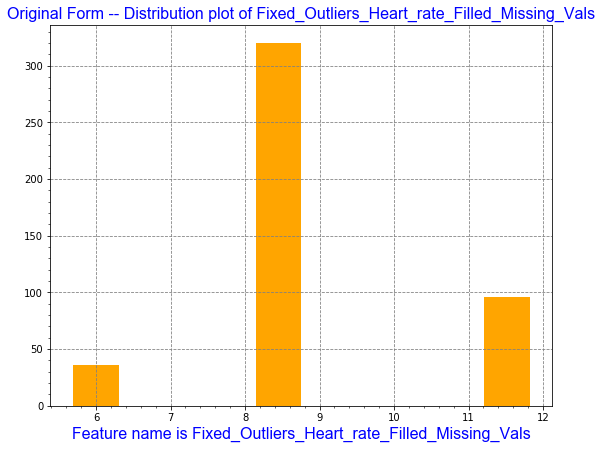

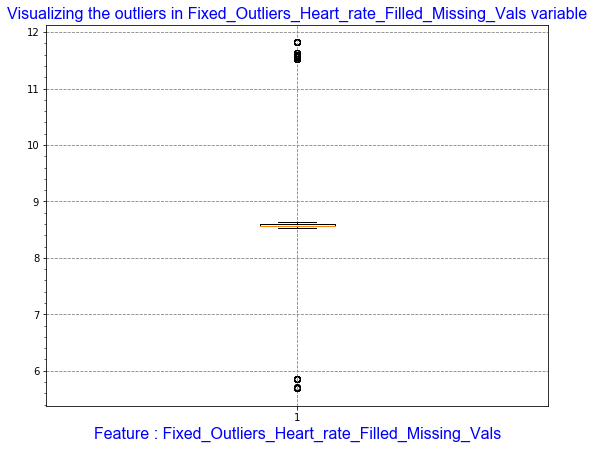



######## Applied Tuky IQR Method-II ########

8.555699854482976 8.555699854482976 8.594395636904107 0.03869578242113114 8.49765618085128 8.652439310535804

Descriptive Statistics of Feature Fixed_Outliers_Heart_rate_Filled_Missing_Vals in Original Form.
count    452.000000
mean       8.571549
std        0.046638
min        8.497656
25%        8.555700
50%        8.555700
75%        8.594396
max        8.652439
Name: Fixed_Outliers_Heart_rate_Filled_Missing_Vals, dtype: float64 



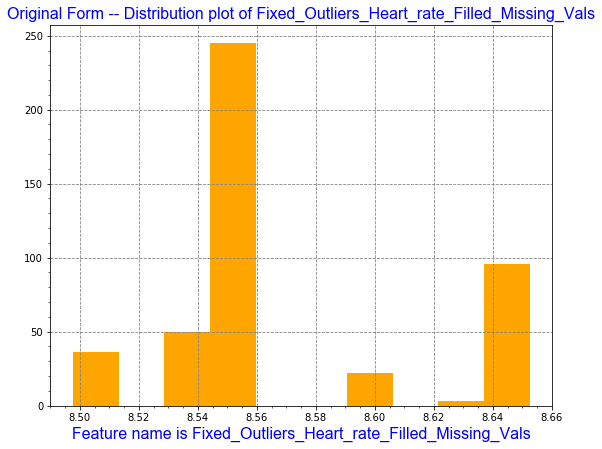

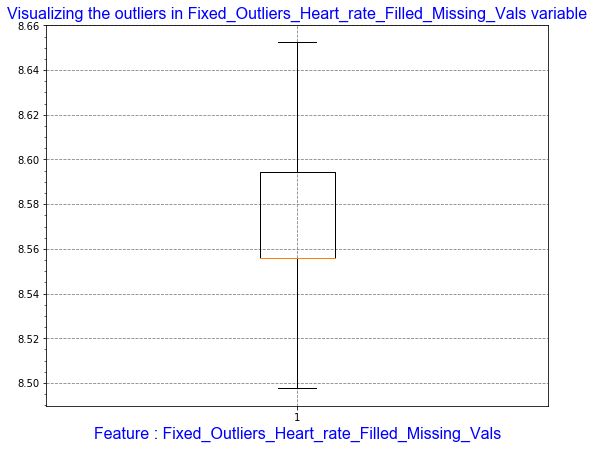



$$$$$$$$ Removed Outliers from Heart_rate_Filled_Missing_Vals and created its new variable Fixed_Outliers_Heart_rate_Filled_Missing_Vals $$$$$$$$



In [295]:
for col in ['T_Vector_angle','P_Vector_angle','QRST_Vector_angle','J_Vector_angle','Heart_rate']:
    fill_missing_val_tgt_encoding(cad_df,col,'Arrhythmia_Class')

## **Visualizing DI_Q_wave_width *(Measurement Unit :: Msec)***

In [42]:
cad_df['DI_Q_wave_width'].unique()

array([ 0, 20, 16, 12, 88, 24, 72, 28, 44, 32, 36], dtype=int64)


Descriptive Statistics of Feature DI_Q_wave_width in Original Form.
count    452.000000
mean       5.628319
std       10.650001
min        0.000000
25%        0.000000
50%        0.000000
75%       12.000000
max       88.000000
Name: DI_Q_wave_width, dtype: float64 



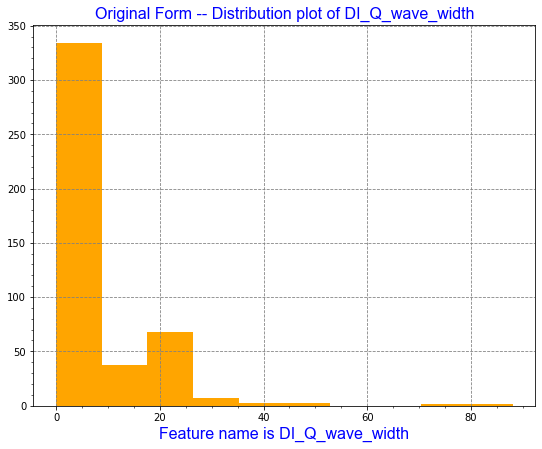


Descriptive Statistics of Feature DI_Q_wave_width in StandardScaler Form.
count    4.520000e+02
mean    -6.877488e-18
std      1.001108e+00
min     -5.290661e-01
25%     -5.290661e-01
50%     -5.290661e-01
75%      5.989428e-01
max      7.742999e+00
Name: DI_Q_wave_width, dtype: float64 



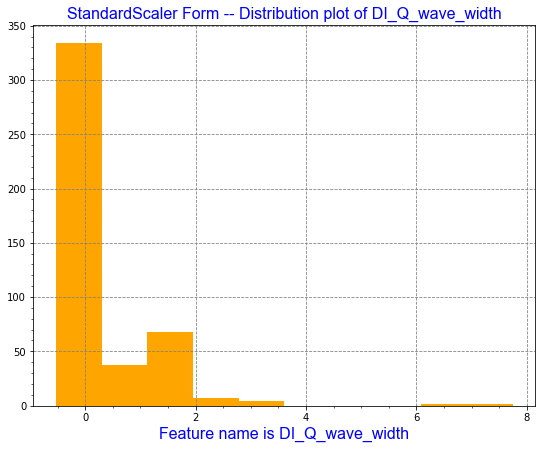


Descriptive Statistics of Feature DI_Q_wave_width in RobustScaler Form.
count    452.000000
mean       0.469027
std        0.887500
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.333333
Name: DI_Q_wave_width, dtype: float64 



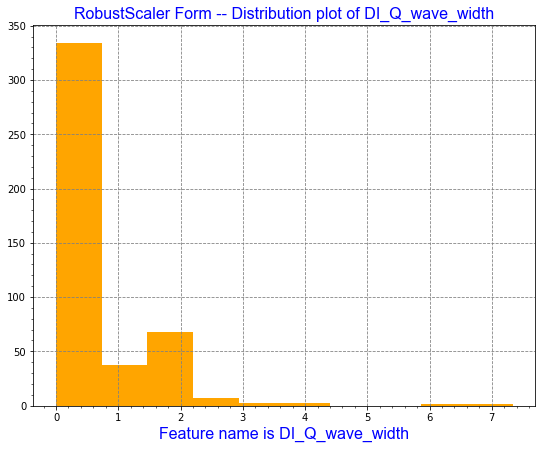


Descriptive Statistics of Feature DI_Q_wave_width in MinMaxScaler Form.
count    452.000000
mean       0.063958
std        0.121023
min        0.000000
25%        0.000000
50%        0.000000
75%        0.136364
max        1.000000
Name: DI_Q_wave_width, dtype: float64 



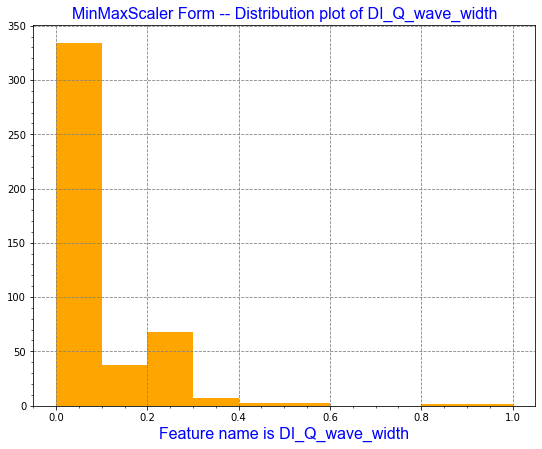

In [43]:
feature_scale_desc_stats(cad_df,'DI_Q_wave_width',[None,'ss','rs','mms'])

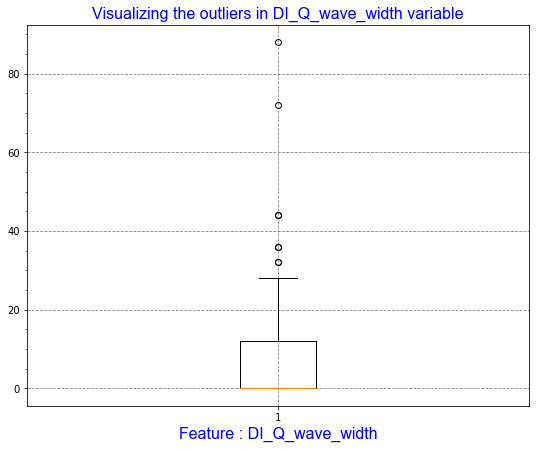

In [296]:
box_plot(cad_df,'DI_Q_wave_width')

### So, its evident that **DI_Q_wave_width** has some **outliers**. And, **most importantly 50%** of the values are **0**.


Descriptive Statistics of Feature DI_Q_wave_width in Original Form.
count    452.000000
mean       5.628319
std       10.650001
min        0.000000
25%        0.000000
50%        0.000000
75%       12.000000
max       88.000000
Name: DI_Q_wave_width, dtype: float64 



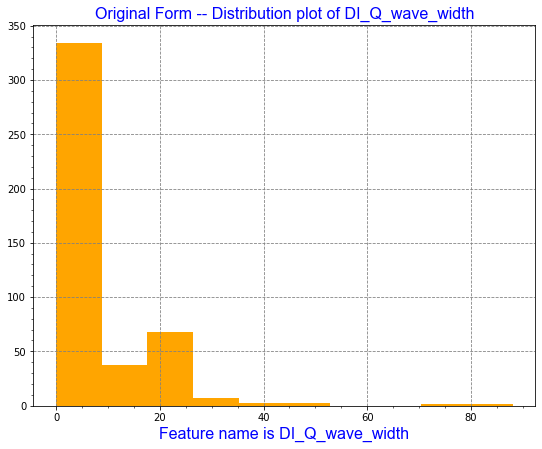

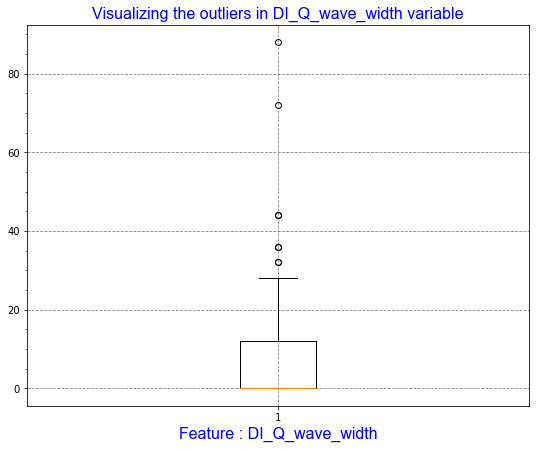



######## Applied Tuky IQR Method-I ########

0.0 0.0 12.0 12.0 -18.0 30.0

Descriptive Statistics of Feature Fixed_Outliers_DI_Q_wave_width in Original Form.
count    452.000000
mean       4.899218
std        8.627156
min        0.000000
25%        0.000000
50%        0.000000
75%        6.633250
max       28.000000
Name: Fixed_Outliers_DI_Q_wave_width, dtype: float64 



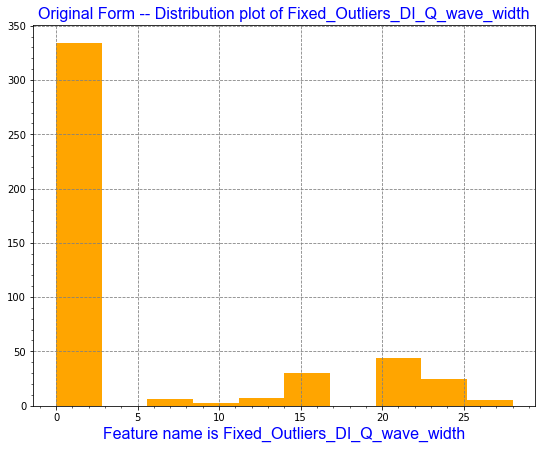

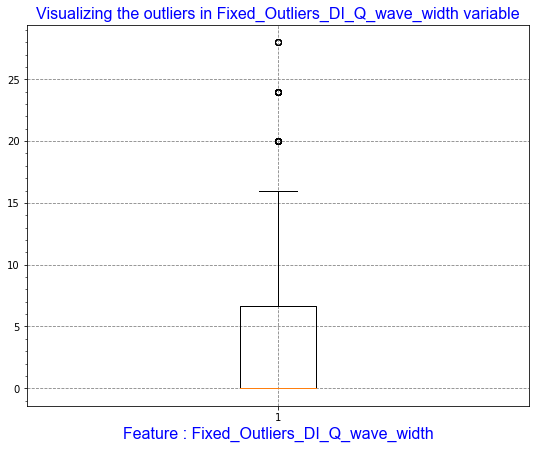



######## Applied Tuky IQR Method-II ########

0.0 0.0 6.6332495807108 6.6332495807108 -9.9498743710662 16.583123951776997

Descriptive Statistics of Feature Fixed_Outliers_DI_Q_wave_width in Original Form.
count    452.000000
mean       4.046492
std        6.943853
min        0.000000
25%        0.000000
50%        0.000000
75%        6.633250
max       16.583124
Name: Fixed_Outliers_DI_Q_wave_width, dtype: float64 



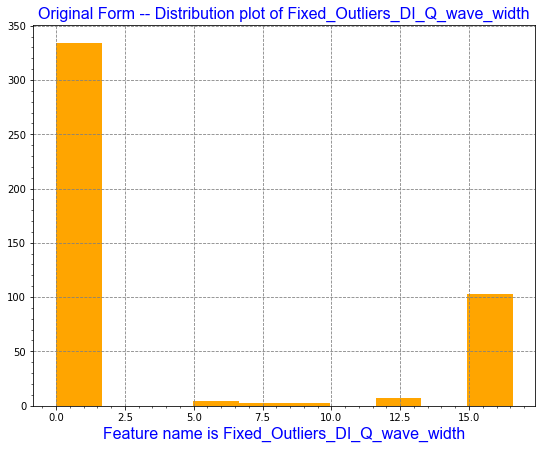

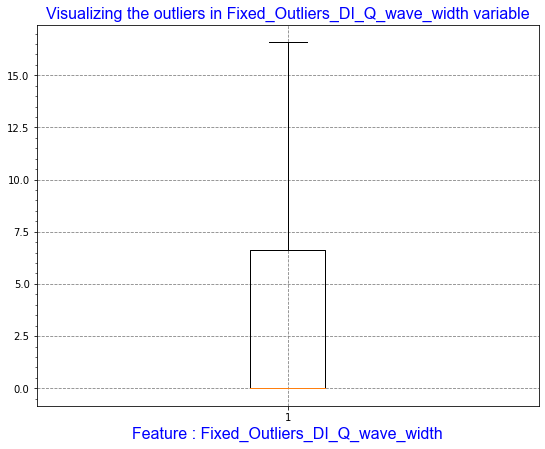



$$$$$$$$ Removed Outliers from DI_Q_wave_width and created its new variable Fixed_Outliers_DI_Q_wave_width $$$$$$$$



In [297]:
fix_outliers(cad_df,'DI_Q_wave_width')

## **Visualizing DI_R_wave_width *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature DI_R_wave_width in Original Form.
count    452.000000
mean      51.628319
std       18.249901
min        0.000000
25%       40.000000
50%       48.000000
75%       60.000000
max      156.000000
Name: DI_R_wave_width, dtype: float64 



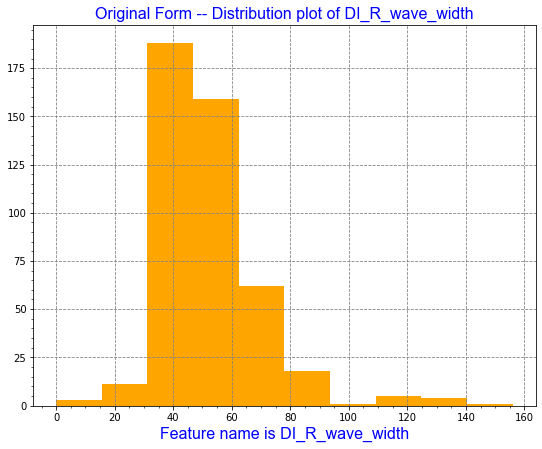


Descriptive Statistics of Feature DI_R_wave_width in StandardScaler Form.
count    4.520000e+02
mean    -5.108991e-17
std      1.001108e+00
min     -2.832099e+00
25%     -6.378776e-01
50%     -1.990333e-01
75%      4.592330e-01
max      5.725364e+00
Name: DI_R_wave_width, dtype: float64 



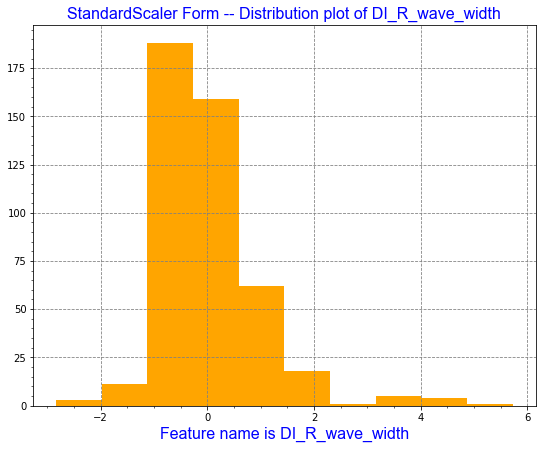


Descriptive Statistics of Feature DI_R_wave_width in RobustScaler Form.
count    452.000000
mean       0.181416
std        0.912495
min       -2.400000
25%       -0.400000
50%        0.000000
75%        0.600000
max        5.400000
Name: DI_R_wave_width, dtype: float64 



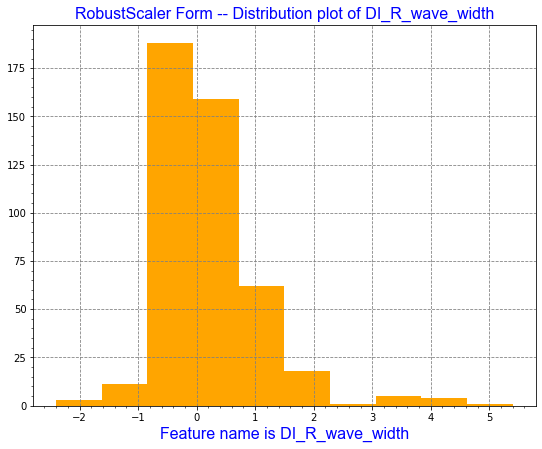


Descriptive Statistics of Feature DI_R_wave_width in MinMaxScaler Form.
count    452.000000
mean       0.330951
std        0.116987
min        0.000000
25%        0.256410
50%        0.307692
75%        0.384615
max        1.000000
Name: DI_R_wave_width, dtype: float64 



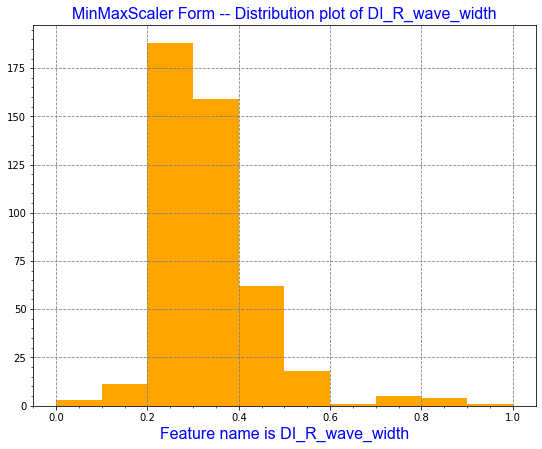

In [44]:
feature_scale_desc_stats(cad_df,'DI_R_wave_width',[None,'ss','rs','mms'])

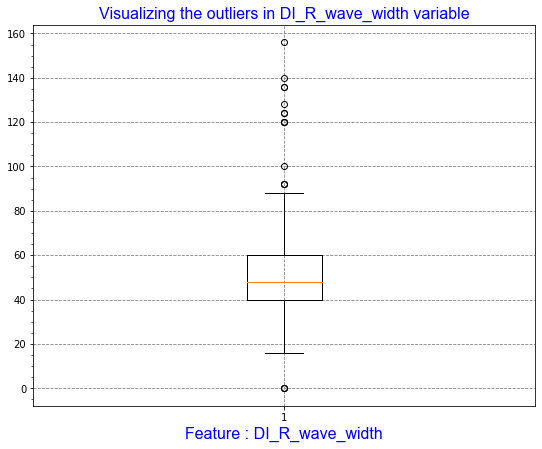

In [298]:
box_plot(cad_df,'DI_R_wave_width')

### So, its evident that **DI_R_wave_width** has some **outliers**.


Descriptive Statistics of Feature DI_R_wave_width in Original Form.
count    452.000000
mean      51.628319
std       18.249901
min        0.000000
25%       40.000000
50%       48.000000
75%       60.000000
max      156.000000
Name: DI_R_wave_width, dtype: float64 



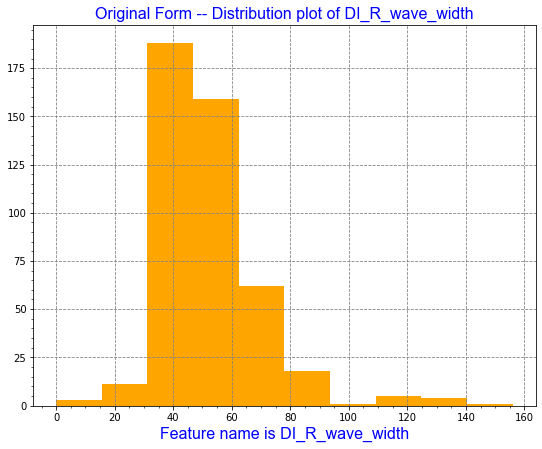

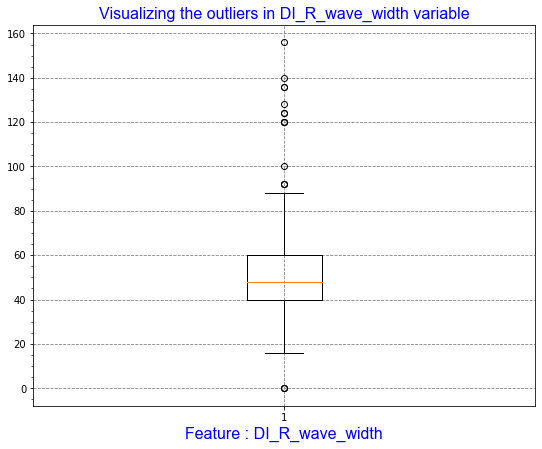



######## Applied Tuky IQR Method-I ########

48.0 40.0 60.0 20.0 10.0 90.0

Descriptive Statistics of Feature Fixed_Outliers_DI_R_wave_width in Original Form.
count    452.000000
mean      50.055020
std       12.581191
min       16.000000
25%       40.000000
50%       48.000000
75%       57.693747
max       88.000000
Name: Fixed_Outliers_DI_R_wave_width, dtype: float64 



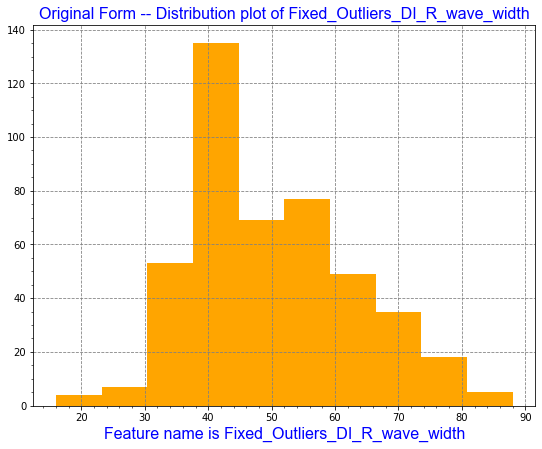

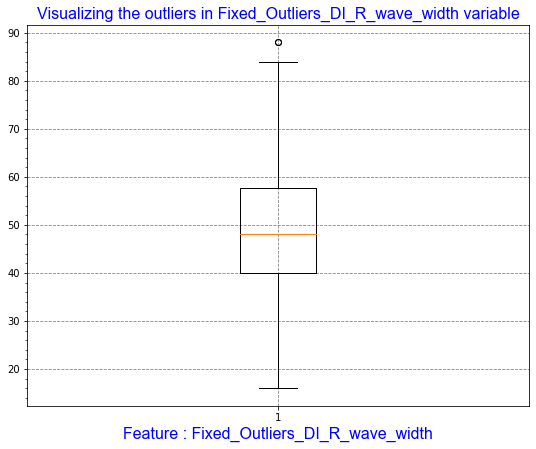



######## Applied Tuky IQR Method-II ########

48.0 40.0 57.69374728496908 17.693747284969078 13.459379072546383 84.2343682124227

Descriptive Statistics of Feature Fixed_Outliers_DI_R_wave_width in Original Form.
count    452.000000
mean      50.038358
std       12.533223
min       16.000000
25%       40.000000
50%       48.000000
75%       57.693747
max       84.234368
Name: Fixed_Outliers_DI_R_wave_width, dtype: float64 



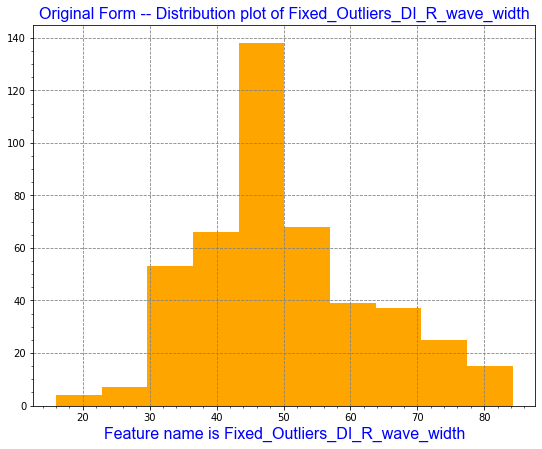

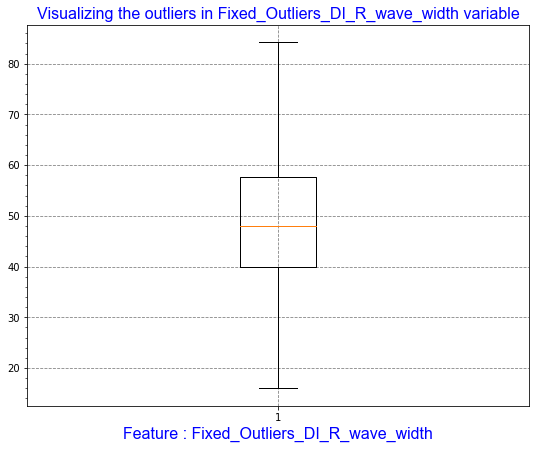



$$$$$$$$ Removed Outliers from DI_R_wave_width and created its new variable Fixed_Outliers_DI_R_wave_width $$$$$$$$



In [299]:
fix_outliers(cad_df,'DI_R_wave_width')

## **Visualizing DI_S_wave_width *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature DI_S_wave_width in Original Form.
count    452.000000
mean      20.920354
std       20.541728
min        0.000000
25%        0.000000
50%       20.000000
75%       36.000000
max       88.000000
Name: DI_S_wave_width, dtype: float64 



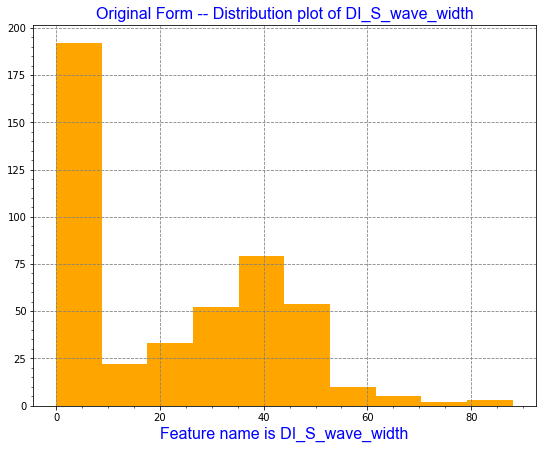


Descriptive Statistics of Feature DI_S_wave_width in StandardScaler Form.
count    4.520000e+02
mean    -5.501990e-17
std      1.001108e+00
min     -1.019560e+00
25%     -1.019560e+00
50%     -4.485376e-02
75%      7.349116e-01
max      3.269149e+00
Name: DI_S_wave_width, dtype: float64 



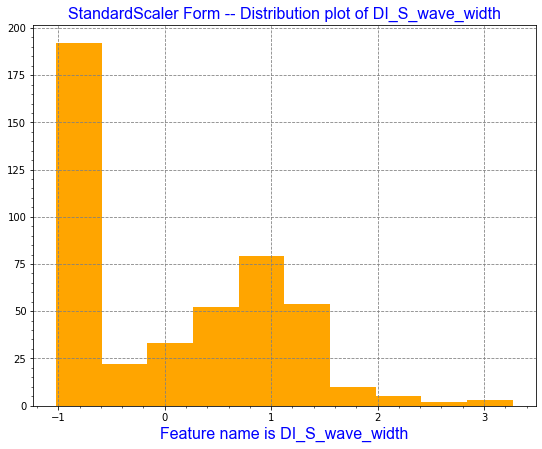


Descriptive Statistics of Feature DI_S_wave_width in RobustScaler Form.
count    452.000000
mean       0.025565
std        0.570604
min       -0.555556
25%       -0.555556
50%        0.000000
75%        0.444444
max        1.888889
Name: DI_S_wave_width, dtype: float64 



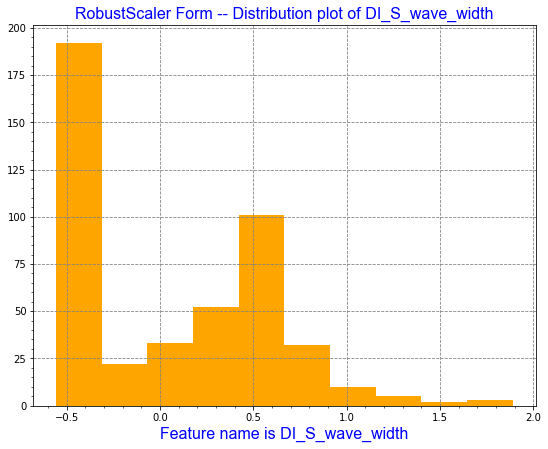


Descriptive Statistics of Feature DI_S_wave_width in MinMaxScaler Form.
count    452.000000
mean       0.237731
std        0.233429
min        0.000000
25%        0.000000
50%        0.227273
75%        0.409091
max        1.000000
Name: DI_S_wave_width, dtype: float64 



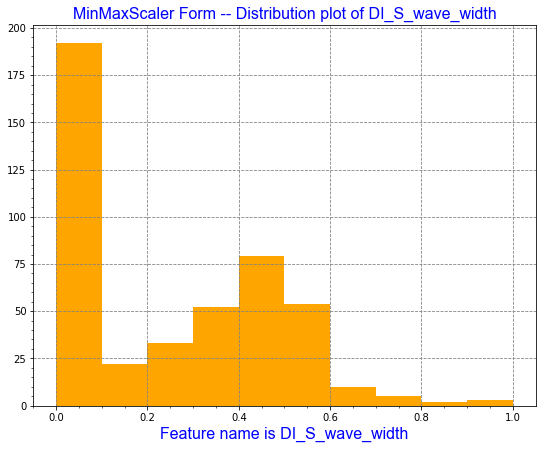

In [45]:
feature_scale_desc_stats(cad_df,'DI_S_wave_width',[None,'ss','rs','mms'])

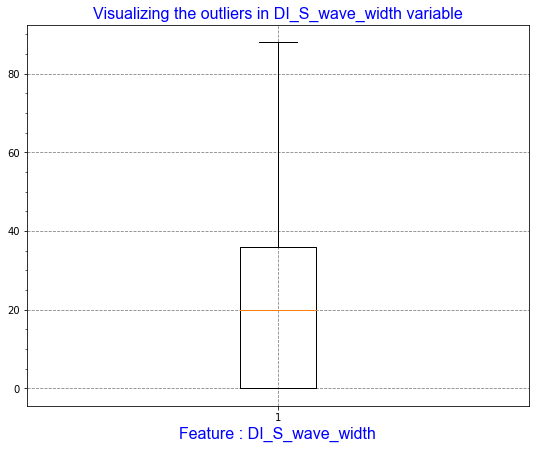

In [300]:
box_plot(cad_df,'DI_S_wave_width')

### So, its evident that **DI_S_wave_width** has some **outliers**. And, **most importantly 25% of data** is having **0 value**.


Descriptive Statistics of Feature DI_S_wave_width in Original Form.
count    452.000000
mean      20.920354
std       20.541728
min        0.000000
25%        0.000000
50%       20.000000
75%       36.000000
max       88.000000
Name: DI_S_wave_width, dtype: float64 



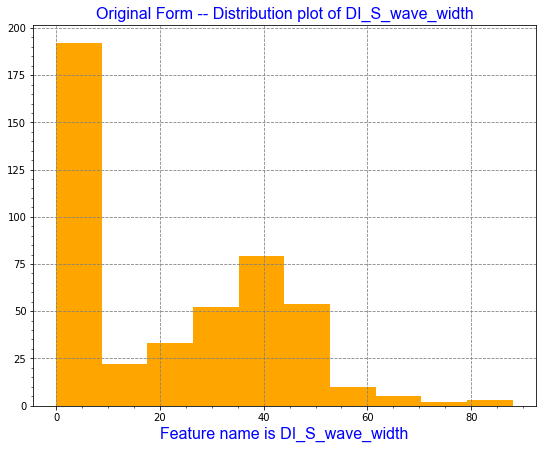

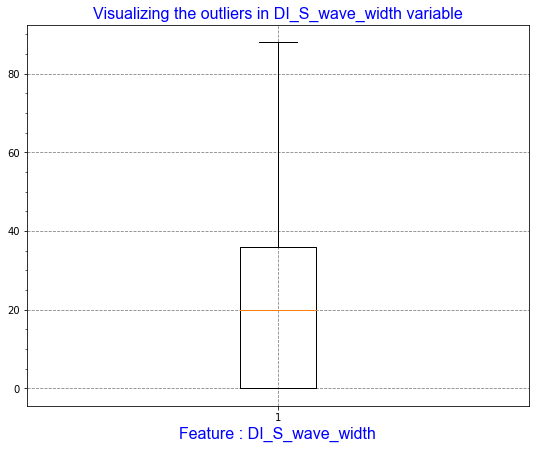



######## Applied Tuky IQR Method-I ########

20.0 0.0 36.0 36.0 -54.0 90.0

Descriptive Statistics of Feature Fixed_Outliers_DI_S_wave_width in Original Form.
count    452.000000
mean      20.920354
std       20.541728
min        0.000000
25%        0.000000
50%       20.000000
75%       36.000000
max       88.000000
Name: Fixed_Outliers_DI_S_wave_width, dtype: float64 



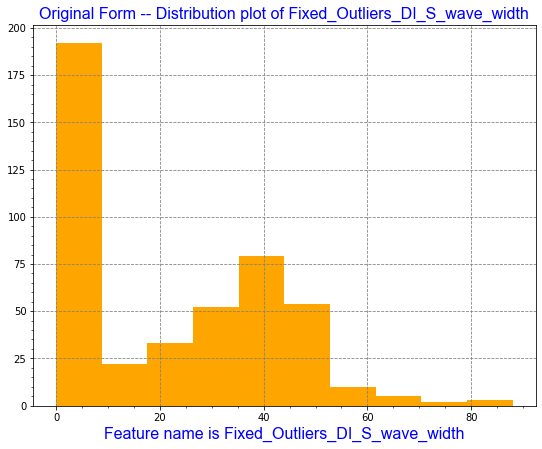

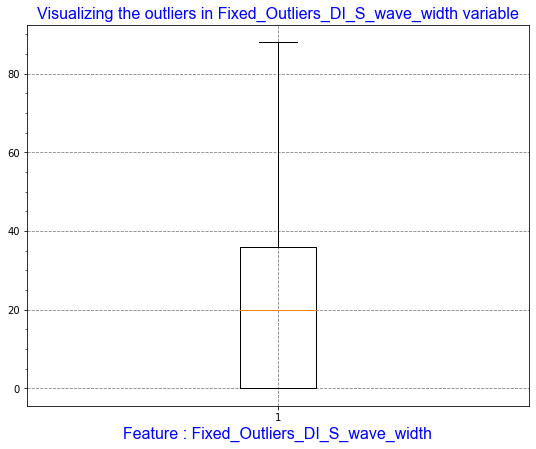



######## Applied Tuky IQR Method-II ########

20.0 0.0 36.0 36.0 -54.0 90.0

Descriptive Statistics of Feature Fixed_Outliers_DI_S_wave_width in Original Form.
count    452.000000
mean      20.920354
std       20.541728
min        0.000000
25%        0.000000
50%       20.000000
75%       36.000000
max       88.000000
Name: Fixed_Outliers_DI_S_wave_width, dtype: float64 



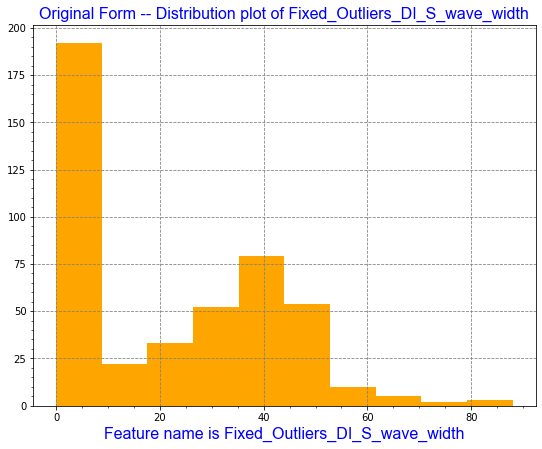

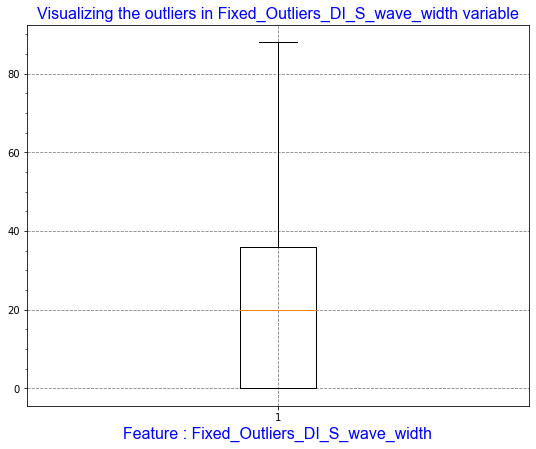



$$$$$$$$ Removed Outliers from DI_S_wave_width and created its new variable Fixed_Outliers_DI_S_wave_width $$$$$$$$



In [301]:
fix_outliers(cad_df,'DI_S_wave_width')

## **Visualizing DI_R1_wave_width *(Measurement Unit :: Msec)***

In [46]:
cad_df['DI_R1_wave_width'].nunique()

4

In [47]:
cad_df['DI_R1_wave_width'].value_counts()

0     448
12      2
24      1
16      1
Name: DI_R1_wave_width, dtype: int64


Descriptive Statistics of Feature DI_R1_wave_width in Original Form.
count    452.000000
mean       0.141593
std        1.569483
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       24.000000
Name: DI_R1_wave_width, dtype: float64 



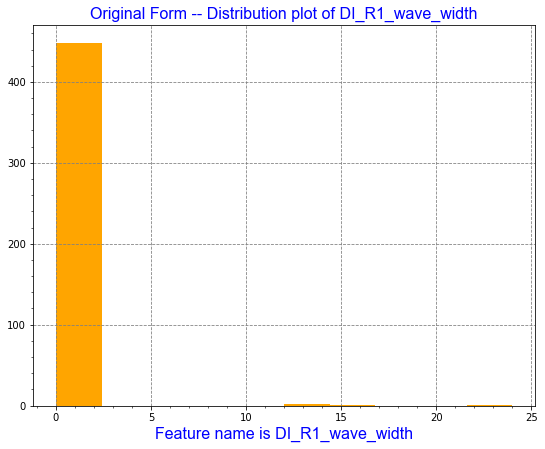


Descriptive Statistics of Feature DI_R1_wave_width in StandardScaler Form.
count    4.520000e+02
mean     3.143994e-17
std      1.001108e+00
min     -9.031624e-02
25%     -9.031624e-02
50%     -9.031624e-02
75%     -9.031624e-02
max      1.521829e+01
Name: DI_R1_wave_width, dtype: float64 



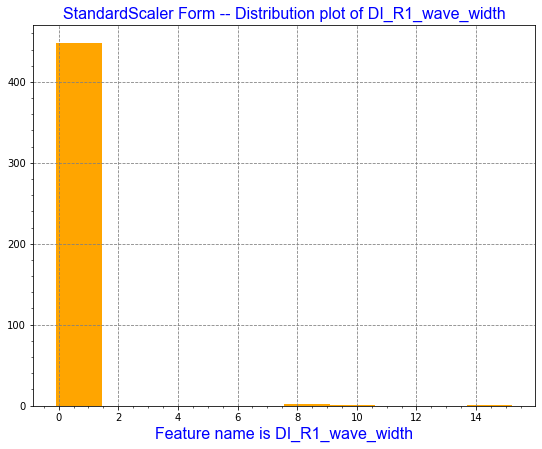


Descriptive Statistics of Feature DI_R1_wave_width in RobustScaler Form.
count    452.000000
mean       0.141593
std        1.569483
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       24.000000
Name: DI_R1_wave_width, dtype: float64 



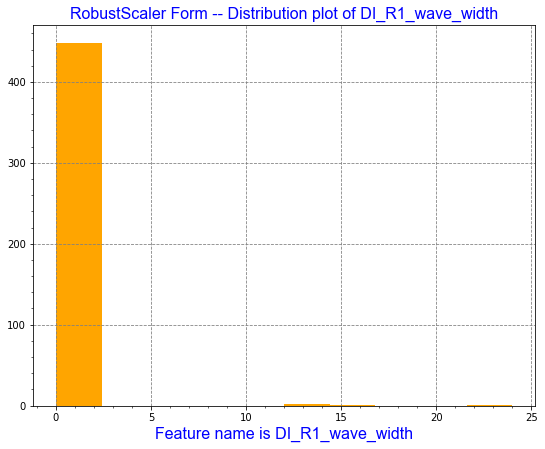


Descriptive Statistics of Feature DI_R1_wave_width in MinMaxScaler Form.
count    452.000000
mean       0.005900
std        0.065395
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: DI_R1_wave_width, dtype: float64 



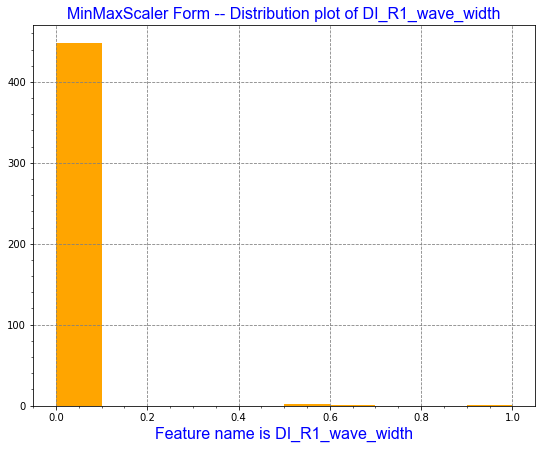

In [48]:
feature_scale_desc_stats(cad_df,'DI_R1_wave_width',[None,'ss','rs','mms'])

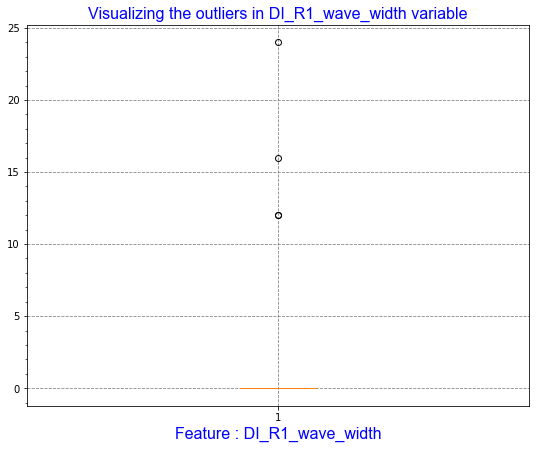

In [302]:
box_plot(cad_df,'DI_R1_wave_width')

### So, **DI_R1_wave_width** has **99% of values** are **0**.


Descriptive Statistics of Feature DI_R1_wave_width in Original Form.
count    452.000000
mean       0.141593
std        1.569483
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       24.000000
Name: DI_R1_wave_width, dtype: float64 



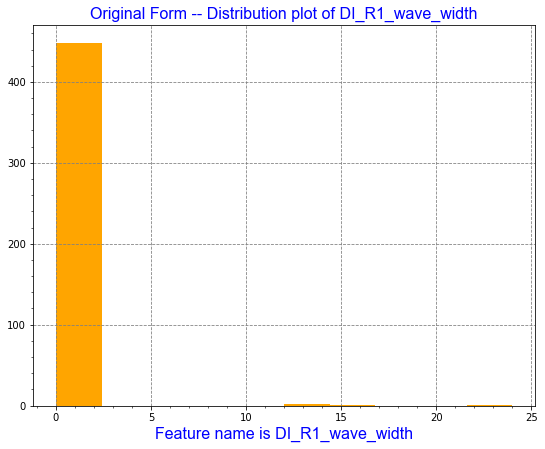

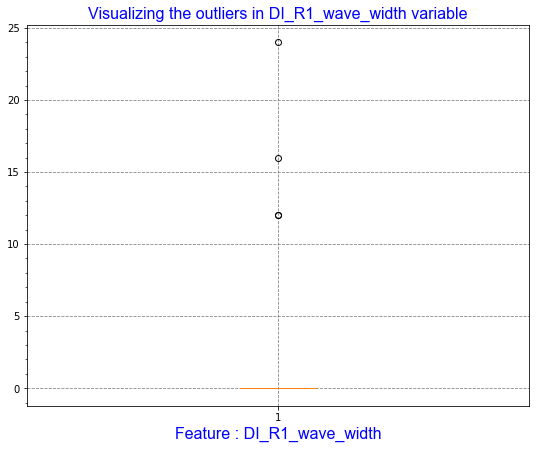



######## Applied Tuky IQR Method-I ########

0.0 0.0 0.0 0.0 0.0 0.0

Descriptive Statistics of Feature Fixed_Outliers_DI_R1_wave_width in Original Form.
count    452.000000
mean       0.035016
std        0.375071
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.898979
Name: Fixed_Outliers_DI_R1_wave_width, dtype: float64 



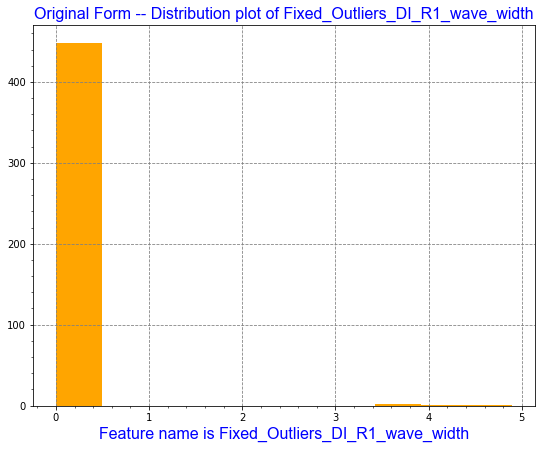

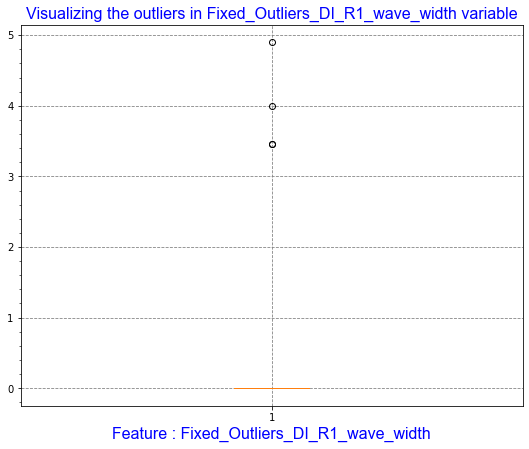



######## Applied Tuky IQR Method-II ########

0.0 0.0 0.0 0.0 0.0 0.0

Descriptive Statistics of Feature Fixed_Outliers_DI_R1_wave_width in Original Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fixed_Outliers_DI_R1_wave_width, dtype: float64 



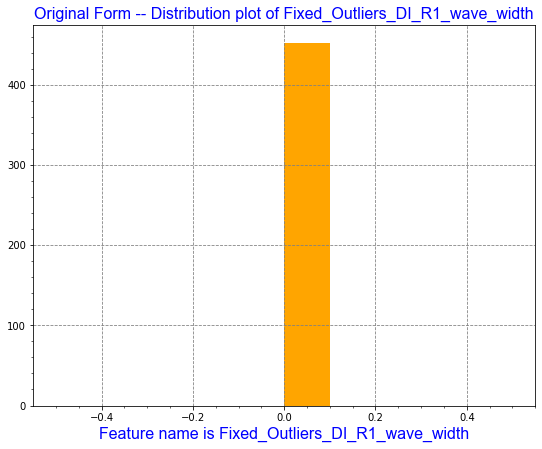

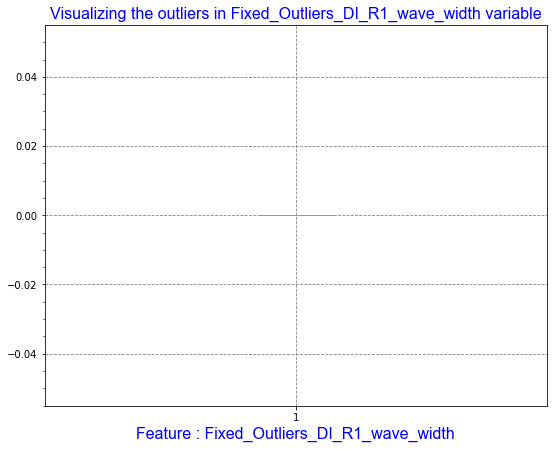



$$$$$$$$ Removed Outliers from DI_R1_wave_width and created its new variable Fixed_Outliers_DI_R1_wave_width $$$$$$$$



In [303]:
fix_outliers(cad_df,'DI_R1_wave_width')

## **Visualizing DI_S1_wave_width *(Measurement Unit :: Msec)***


Descriptive Statistics of Feature DI_S1_wave_width in Original Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DI_S1_wave_width, dtype: float64 



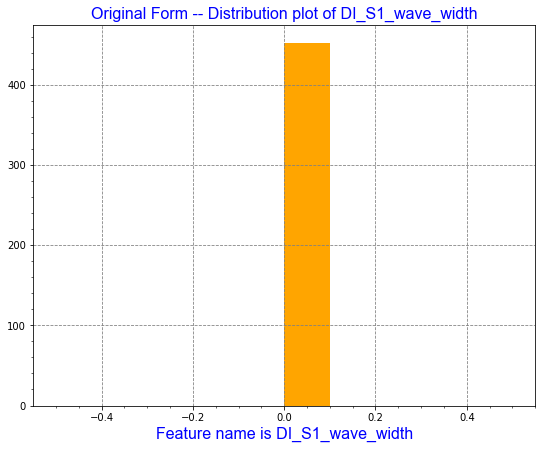


Descriptive Statistics of Feature DI_S1_wave_width in StandardScaler Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DI_S1_wave_width, dtype: float64 



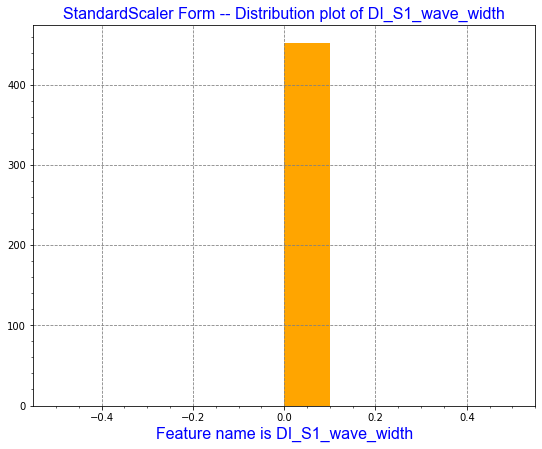


Descriptive Statistics of Feature DI_S1_wave_width in RobustScaler Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DI_S1_wave_width, dtype: float64 



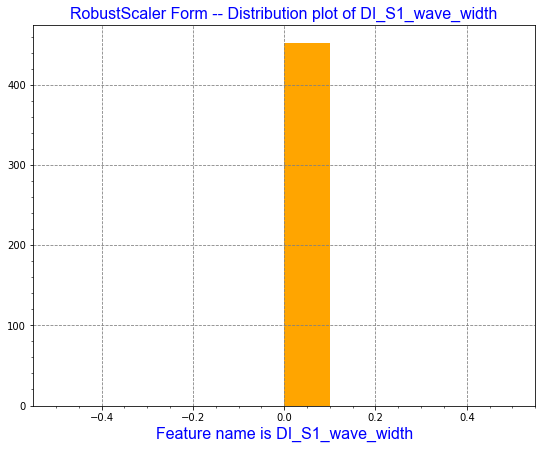


Descriptive Statistics of Feature DI_S1_wave_width in MinMaxScaler Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DI_S1_wave_width, dtype: float64 



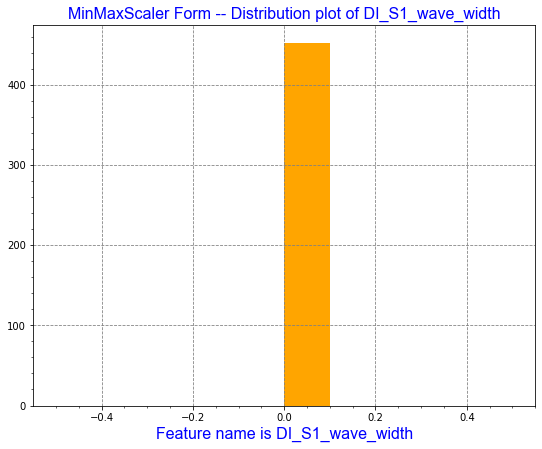

In [49]:
feature_scale_desc_stats(cad_df,'DI_S1_wave_width',[None,'ss','rs','mms'])

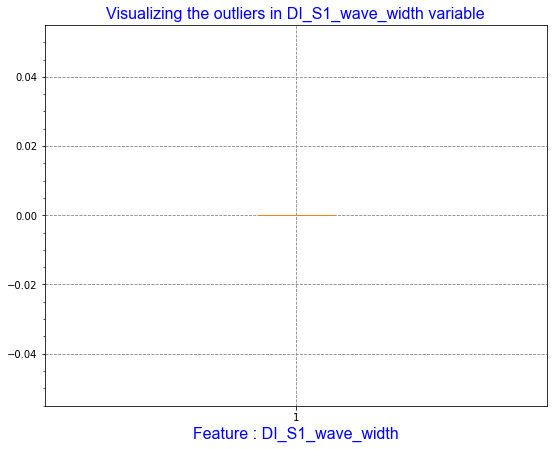

In [304]:
box_plot(cad_df,'DI_S1_wave_width')

### So, **DI_S1_wave_width** has all values as **0**.


Descriptive Statistics of Feature DI_S1_wave_width in Original Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DI_S1_wave_width, dtype: float64 



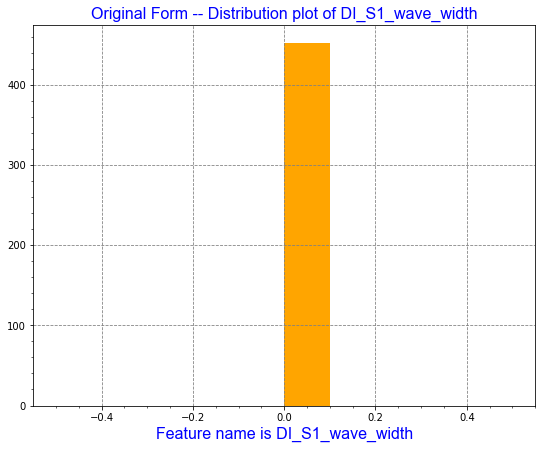

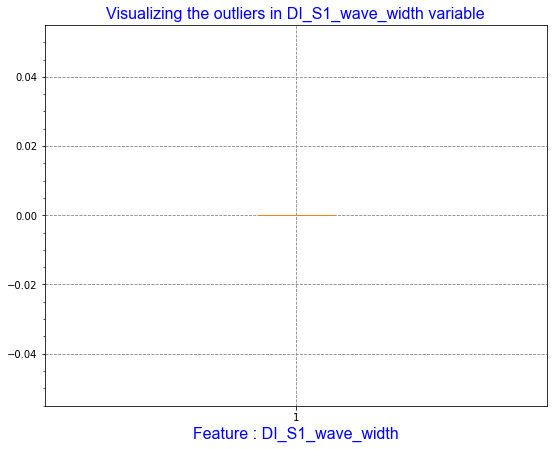



######## Applied Tuky IQR Method-I ########

0.0 0.0 0.0 0.0 0.0 0.0

Descriptive Statistics of Feature Fixed_Outliers_DI_S1_wave_width in Original Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fixed_Outliers_DI_S1_wave_width, dtype: float64 



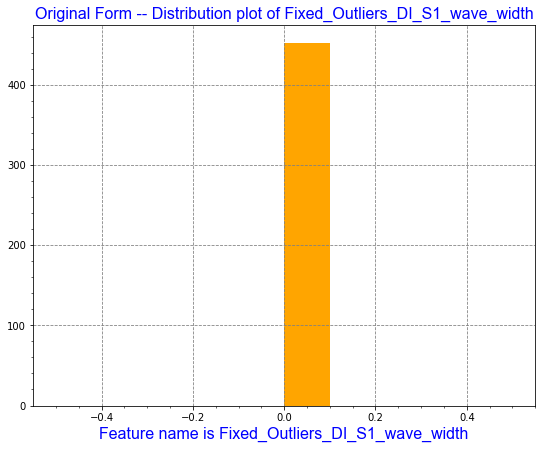

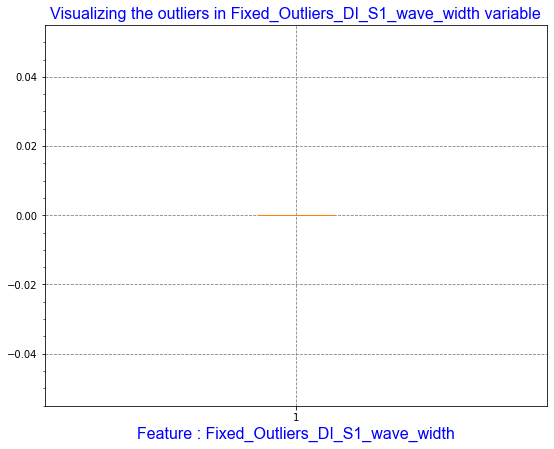



######## Applied Tuky IQR Method-II ########

0.0 0.0 0.0 0.0 0.0 0.0

Descriptive Statistics of Feature Fixed_Outliers_DI_S1_wave_width in Original Form.
count    452.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fixed_Outliers_DI_S1_wave_width, dtype: float64 



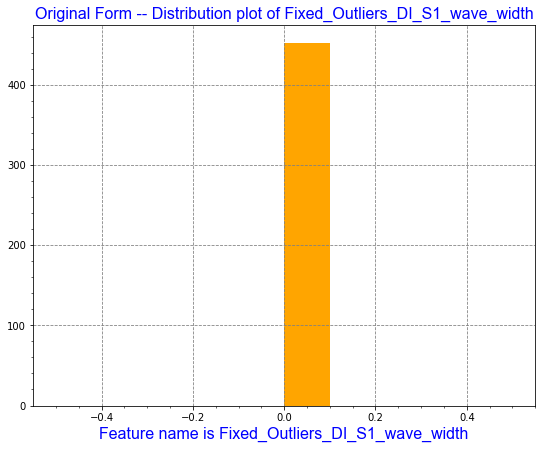

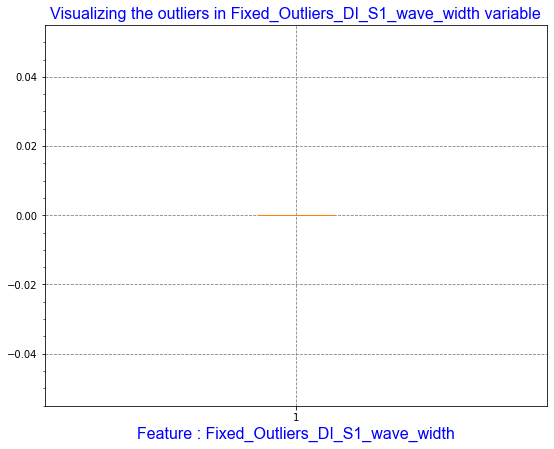



$$$$$$$$ Removed Outliers from DI_S1_wave_width and created its new variable Fixed_Outliers_DI_S1_wave_width $$$$$$$$



In [305]:
fix_outliers(cad_df,'DI_S1_wave_width')

## **Visualizing DI_Intrinsic_deflections *(Measurement Unit :: Msec)***

In [50]:
cad_df['DI_Intrinsic_deflections'].nunique()

18

In [51]:
cad_df['DI_Intrinsic_deflections'].unique()

array([ 32,  24,  48,  28,  20,  36,  40,  44,  16,   0, 100,  60,  56,
        12,  52,  68,   8,  84], dtype=int64)


Descriptive Statistics of Feature DI_Intrinsic_deflections in Original Form.
count    452.000000
mean      30.035398
std       10.046393
min        0.000000
25%       24.000000
50%       28.000000
75%       36.000000
max      100.000000
Name: DI_Intrinsic_deflections, dtype: float64 



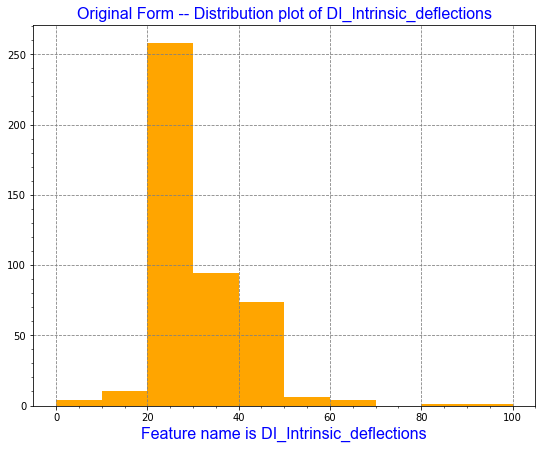


Descriptive Statistics of Feature DI_Intrinsic_deflections in StandardScaler Form.
count    4.520000e+02
mean    -9.824983e-17
std      1.001108e+00
min     -2.992983e+00
25%     -6.014184e-01
50%     -2.028244e-01
75%      5.943637e-01
max      6.971868e+00
Name: DI_Intrinsic_deflections, dtype: float64 



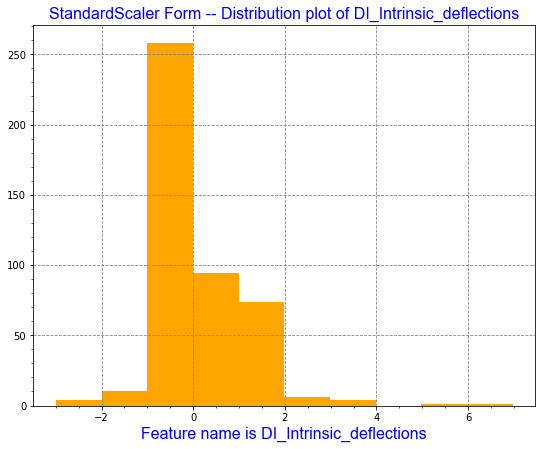


Descriptive Statistics of Feature DI_Intrinsic_deflections in RobustScaler Form.
count    452.000000
mean       0.169617
std        0.837199
min       -2.333333
25%       -0.333333
50%        0.000000
75%        0.666667
max        6.000000
Name: DI_Intrinsic_deflections, dtype: float64 



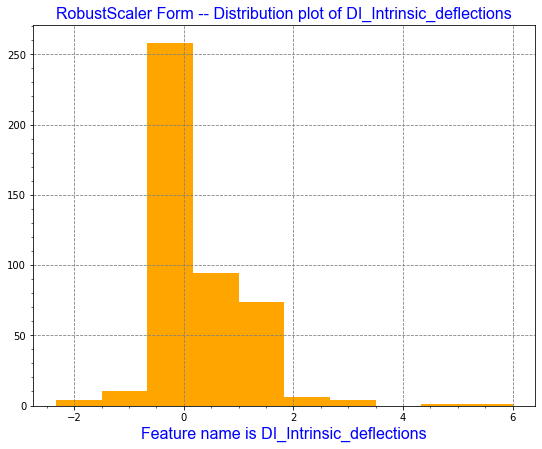


Descriptive Statistics of Feature DI_Intrinsic_deflections in MinMaxScaler Form.
count    452.000000
mean       0.300354
std        0.100464
min        0.000000
25%        0.240000
50%        0.280000
75%        0.360000
max        1.000000
Name: DI_Intrinsic_deflections, dtype: float64 



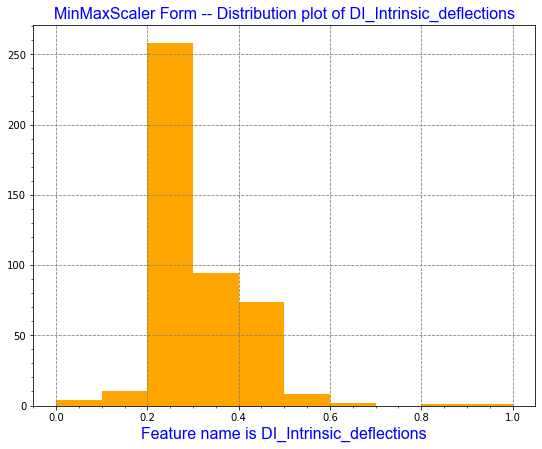

In [52]:
feature_scale_desc_stats(cad_df,'DI_Intrinsic_deflections',[None,'ss','rs','mms'])

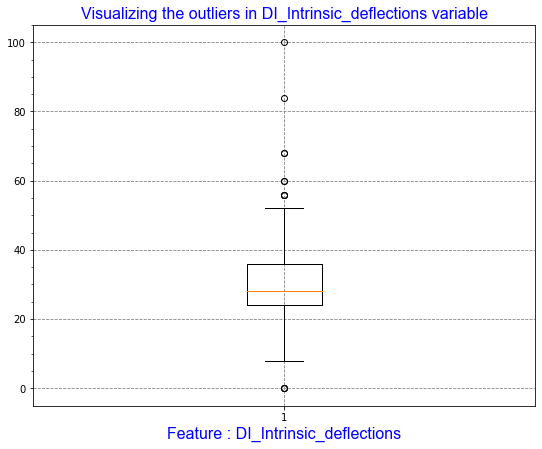

In [306]:
box_plot(cad_df,'DI_Intrinsic_deflections')

### So, its evident that **DI_Intrinsic_deflections** has some **outliers**.


Descriptive Statistics of Feature DI_Intrinsic_deflections in Original Form.
count    452.000000
mean      30.035398
std       10.046393
min        0.000000
25%       24.000000
50%       28.000000
75%       36.000000
max      100.000000
Name: DI_Intrinsic_deflections, dtype: float64 



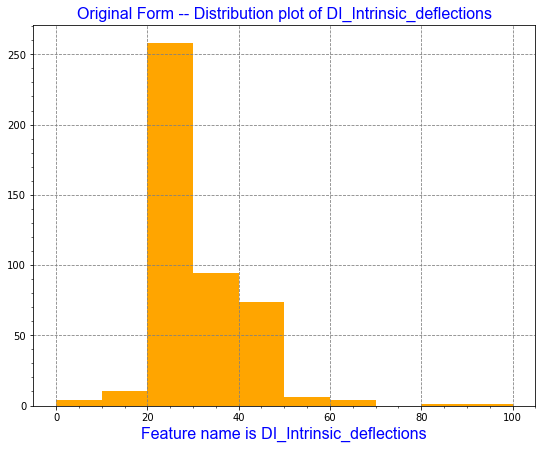

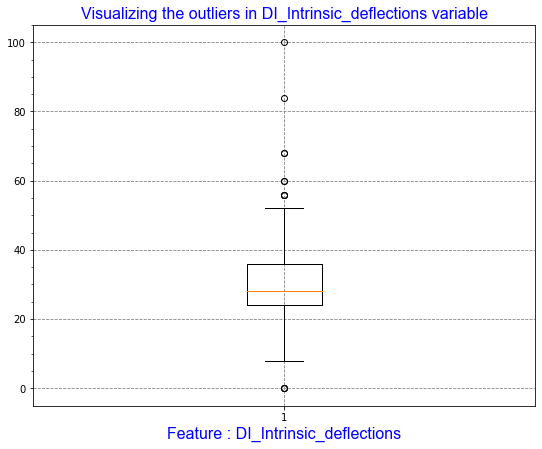



######## Applied Tuky IQR Method-I ########

28.0 24.0 36.0 12.0 6.0 54.0

Descriptive Statistics of Feature Fixed_Outliers_DI_Intrinsic_deflections in Original Form.
count    452.000000
mean      29.596459
std        7.959988
min        8.000000
25%       24.000000
50%       28.000000
75%       36.000000
max       52.000000
Name: Fixed_Outliers_DI_Intrinsic_deflections, dtype: float64 



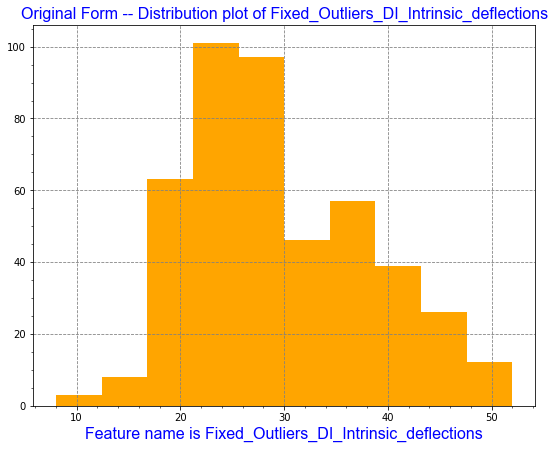

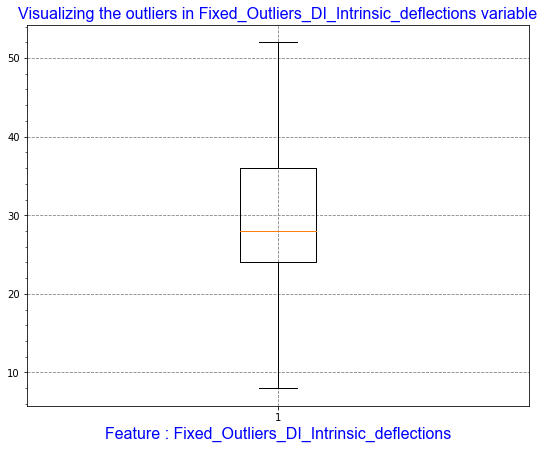



######## Applied Tuky IQR Method-II ########

28.0 24.0 36.0 12.0 6.0 54.0

Descriptive Statistics of Feature Fixed_Outliers_DI_Intrinsic_deflections in Original Form.
count    452.000000
mean      29.596459
std        7.959988
min        8.000000
25%       24.000000
50%       28.000000
75%       36.000000
max       52.000000
Name: Fixed_Outliers_DI_Intrinsic_deflections, dtype: float64 



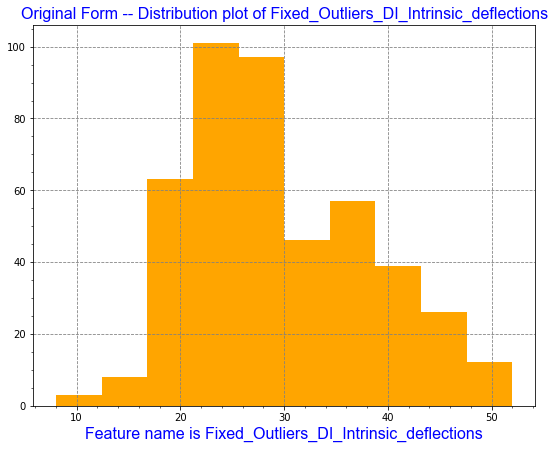

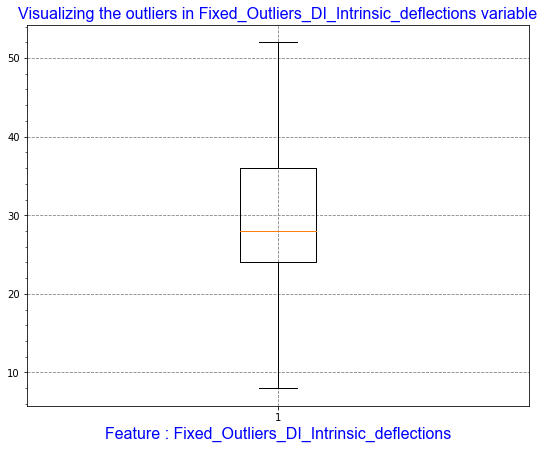



$$$$$$$$ Removed Outliers from DI_Intrinsic_deflections and created its new variable Fixed_Outliers_DI_Intrinsic_deflections $$$$$$$$



In [307]:
fix_outliers(cad_df,'DI_Intrinsic_deflections')

## **Visualizing DI_Ragged_R_wave *(NOMINAL variable)***

In [53]:
cad_df['DI_Ragged_R_wave'].unique()

array([0, 1], dtype=int64)

In [54]:
pd.DataFrame(cad_df['DI_Ragged_R_wave'].value_counts())

DI_Ragged_R_wave
0               451
1                 1

In [55]:
pd.DataFrame(cad_df.groupby(['DI_Ragged_R_wave','Arrhythmia_Class']).count()['Age'])

Age
DI_Ragged_R_wave Arrhythmia_Class     
0                1                 245
                 2                  43
                 3                  15
                 4                  15
                 5                  13
                 6                  25
                 7                   3
                 8                   2
                 9                   9
                 10                 50
                 14                  4
                 15                  5
                 16                 22
1                2                   1

In [308]:
ohe = ce.OneHotEncoder(cols='DI_Ragged_R_wave')
cad_df = ohe.fit_transform(cad_df)

## **Visualizing DI_R_wave_diphasic_derivation *(NOMINAL variable)***

In [56]:
cad_df['DI_R_wave_diphasic_derivation'].unique()

array([0, 1], dtype=int64)

In [57]:
pd.DataFrame(cad_df['DI_R_wave_diphasic_derivation'].value_counts())

DI_R_wave_diphasic_derivation
0                            447
1                              5

In [58]:
pd.DataFrame(cad_df.groupby(['DI_R_wave_diphasic_derivation','Arrhythmia_Class']).count()['Age'])

Age
DI_R_wave_diphasic_derivation Arrhythmia_Class     
0                             1                 242
                              2                  44
                              3                  15
                              4                  15
                              5                  13
                              6                  25
                              7                   3
                              8                   2
                              9                   7
                              10                 50
                              14                  4
                              15                  5
                              16                 22
1                             1                   3
                              9                   2

In [311]:
ohe = ce.OneHotEncoder(cols='DI_R_wave_diphasic_derivation')
cad_df = ohe.fit_transform(cad_df)

## **Visualizing DI_Ragged_P_wave *(NOMINAL variable)***

In [59]:
cad_df['DI_Ragged_P_wave'].unique()

array([0, 1], dtype=int64)

In [60]:
pd.DataFrame(cad_df['DI_Ragged_P_wave'].value_counts())

DI_Ragged_P_wave
0               447
1                 5

In [61]:
pd.DataFrame(cad_df.groupby(['DI_Ragged_P_wave','Arrhythmia_Class']).count()['Age'])

Age
DI_Ragged_P_wave Arrhythmia_Class     
0                1                 242
                 2                  44
                 3                  14
                 4                  15
                 5                  13
                 6                  24
                 7                   3
                 8                   2
                 9                   9
                 10                 50
                 14                  4
                 15                  5
                 16                 22
1                1                   3
                 3                   1
                 6                   1

In [312]:
ohe = ce.OneHotEncoder(cols='DI_Ragged_P_wave')
cad_df = ohe.fit_transform(cad_df)

## **Visualizing DI_P_Wave_diphasic derivation *(NOMINAL variable)***

In [62]:
cad_df['DI_P_Wave_diphasic_derivation'].unique()

array([0, 1], dtype=int64)

In [63]:
pd.DataFrame(cad_df['DI_P_Wave_diphasic_derivation'].value_counts())

DI_P_Wave_diphasic_derivation
0                            450
1                              2

In [64]:
pd.DataFrame(cad_df.groupby(['DI_P_Wave_diphasic_derivation','Arrhythmia_Class']).count()['Age'])

Age
DI_P_Wave_diphasic_derivation Arrhythmia_Class     
0                             1                 245
                              2                  43
                              3                  15
                              4                  15
                              5                  13
                              6                  25
                              7                   3
                              8                   2
                              9                   9
                              10                 49
                              14                  4
                              15                  5
                              16                 22
1                             2                   1
                              10                  1

In [313]:
ohe = ce.OneHotEncoder(cols='DI_P_Wave_diphasic_derivation')
cad_df = ohe.fit_transform(cad_df)

## **Visualizing DI_Ragged_T_wave *(NOMINAL variable)***

In [65]:
cad_df['DI_Ragged_T_wave'].unique()

array([0, 1], dtype=int64)

In [66]:
pd.DataFrame(cad_df['DI_Ragged_T_wave'].value_counts())

DI_Ragged_T_wave
0               450
1                 2

In [67]:
pd.DataFrame(cad_df.groupby(['DI_Ragged_T_wave','Arrhythmia_Class']).count()['Age'])

Age
DI_Ragged_T_wave Arrhythmia_Class     
0                1                 245
                 2                  44
                 3                  14
                 4                  15
                 5                  13
                 6                  25
                 7                   3
                 8                   2
                 9                   8
                 10                 50
                 14                  4
                 15                  5
                 16                 22
1                3                   1
                 9                   1

In [314]:
ohe = ce.OneHotEncoder(cols='DI_Ragged_T_wave')
cad_df = ohe.fit_transform(cad_df)

## **Visualizing DI_T_wave_diphasic derivation *(NOMINAL variable)***

In [68]:
cad_df['DI_T_wave_diphasic_derivation'].unique()

array([0, 1], dtype=int64)

In [69]:
pd.DataFrame(cad_df['DI_T_wave_diphasic_derivation'].value_counts())

DI_T_wave_diphasic_derivation
0                            448
1                              4

In [70]:
pd.DataFrame(cad_df.groupby(['DI_T_wave_diphasic_derivation','Arrhythmia_Class']).count()['Age'])

Age
DI_T_wave_diphasic_derivation Arrhythmia_Class     
0                             1                 245
                              2                  44
                              3                  14
                              4                  15
                              5                  13
                              6                  25
                              7                   3
                              8                   2
                              9                   7
                              10                 49
                              14                  4
                              15                  5
                              16                 22
1                             3                   1
                              9                   2
                              10                  1

In [315]:
ohe = ce.OneHotEncoder(cols='DI_T_wave_diphasic_derivation')
cad_df = ohe.fit_transform(cad_df)